<a href="https://colab.research.google.com/github/lizachi1/932003.vasileva.elizavet.lab1/blob/main/Vasileva_932003_DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import metrics
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **1. Бинарный классификатор**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DIABET/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
risk_dictionary_binary_class = {0:0,1:1,2:1}

df['Target Binary'] = df['Diabetes_012'].map(risk_dictionary_binary_class)
df[['Diabetes_012','Target Binary']].head(30)

,Diabetes_012,Target Binary
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,2.0,1
9,0.0,0


In [ ]:
X = df.drop(['Target Binary', 'Diabetes_012', 'CholCheck', 'Stroke', 'NoDocbcCost', 'MentHlth', 'Education', 'Income', ], axis=1)
columns_after_drop = X.columns
y = df['Target Binary']

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train_Validation : {X_train_val.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Validation : {X_val.shape}')

Train_Validation : (202944, 15), Test : (50736, 15)
Train : (162355, 15), Validation : (40589, 15)


In [ ]:
binary_classifier_1 = Sequential()
binary_classifier_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
binary_classifier_1.add(Dense(8, activation='tanh'))
binary_classifier_1.add(Dense(1, activation='sigmoid'))

binary_classifier_1.summary()

binary_classifier_1.compile(loss= 'binary_crossentropy',
                          optimizer= 'sgd',
                              metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                          )


early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/DLlabs/temp_binary_32_16_1/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

binary_classifier_history_1 = binary_classifier_1.fit(X_train, y_train, batch_size=256,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                256       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
634/635 [============================>.] - ETA: 0s - loss: 0.4360 - accuracy: 0.8423 - precision: 0.1176 - recall: 7.8186e-05 - auc: 0.6074
Epoch 1: val_accuracy improved from -inf to 0.84242, saving model to /content/gdrive/My Drive/DLlabs/temp_binary_32_16_1/diabetes_weight

In [ ]:
binary_classifier_2 = Sequential()
binary_classifier_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
binary_classifier_2.add(Dense(32, activation='softmax'))
binary_classifier_2.add(Dense(1, activation='sigmoid'))

binary_classifier_2.summary()

binary_classifier_2.compile(loss= 'binary_crossentropy',
                          optimizer= 'adam',
                              metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                          )


early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/DLlabs/temp_binary_32_16_1/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

binary_classifier_history_2 = binary_classifier_2.fit(X_train, y_train, batch_size=256,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1024      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
633/635 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.8305 - precision: 0.1547 - recall: 0.0169 - auc: 0.5014
Epoch 1: val_accuracy improved from -inf to 0.84242, saving model to /content/gdrive/My Drive/DLlabs/temp_binary_32_16_1/diabetes_weight

In [ ]:
binary_classifier_3 = Sequential()
binary_classifier_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
binary_classifier_3.add(Dense(16, activation='tanh'))
binary_classifier_3.add(Dense(1, activation='sigmoid'))

binary_classifier_3.summary()

binary_classifier_3.compile(loss= 'binary_crossentropy',
                          optimizer= 'sgd',
                              metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                          )


early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/neurolabs/temp_binary_128_64_32_1/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

binary_classifier_history_3 = binary_classifier_3.fit(X_train, y_train, batch_size=256,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                512       
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
618/635 [============================>.] - ETA: 0s - loss: 0.4235 - accuracy: 0.8384 - precision: 0.2208 - recall: 0.0103 - auc: 0.6573
Epoch 1: val_accuracy improved from -inf to 0.84215, saving model to /content/gdrive/My Drive/neurolabs/temp_binary_128_64_32_1/diabetes_

**ИТОГ**: лучше всех "обучился" **третий** классификатор.

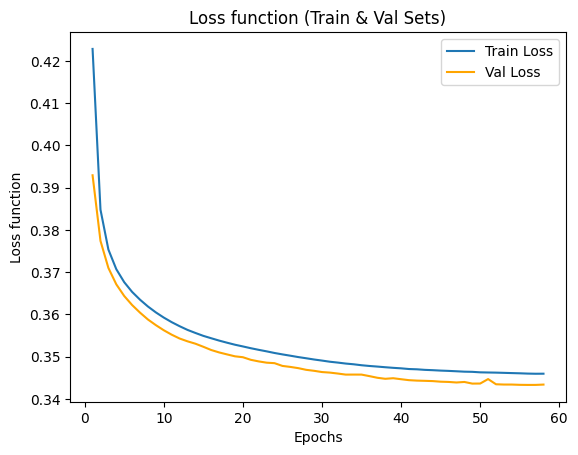

In [ ]:
loss_function = binary_classifier_history_3.history['loss']
val_loss_function = binary_classifier_history_3.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

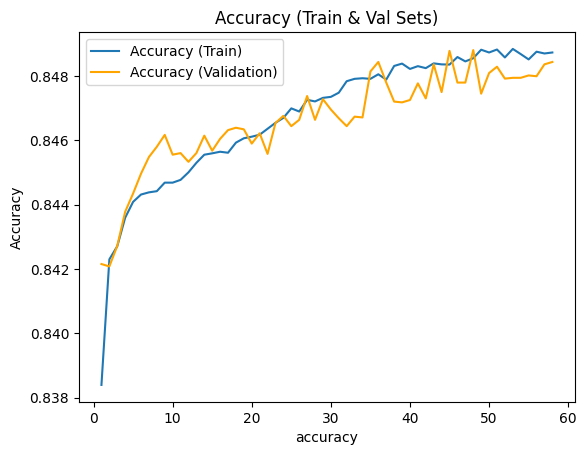

In [ ]:
acc = binary_classifier_history_3.history['accuracy']
val_acc = binary_classifier_history_3.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

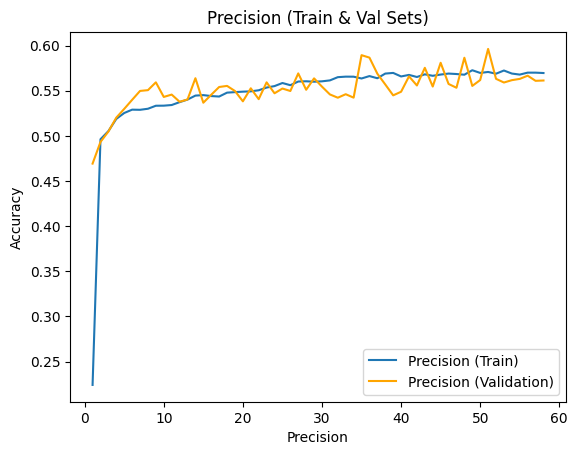

In [ ]:
prec = binary_classifier_history_3.history['precision']
val_prec = binary_classifier_history_3.history['val_precision']

epochs = range(1,len(prec)+1)

plt.title('Precision (Train & Val Sets)')
plt.plot(epochs,prec,label='Precision (Train)')
plt.plot(epochs,val_prec,color='orange',label='Precision (Validation)')
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

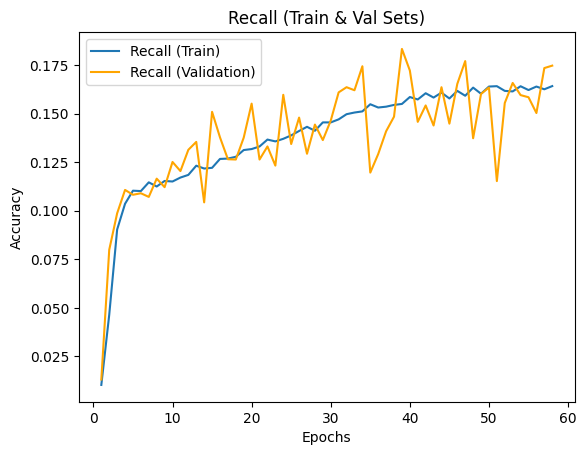

In [ ]:
recall = binary_classifier_history_3.history['recall']
val_recall = binary_classifier_history_3.history['val_recall']
epochs = range(1,len(acc)+1)

plt.title('Recall (Train & Val Sets)')
plt.plot(epochs,recall,label='Recall (Train)')
plt.plot(epochs,val_recall,color='orange',label='Recall (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

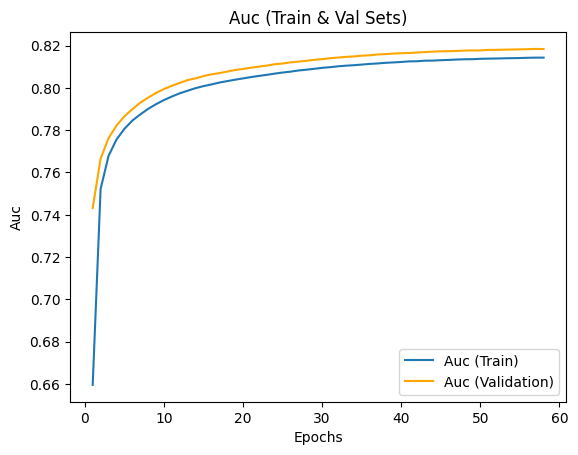

In [ ]:
auc = binary_classifier_history_3.history['auc']
val_auc = binary_classifier_history_3.history['val_auc']
epochs = range(1,len(acc)+1)

plt.title('Auc (Train & Val Sets)')
plt.plot(epochs,auc,label='Auc (Train)')
plt.plot(epochs,val_auc,color='orange',label='Auc (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Auc')
plt.legend()
plt.show()

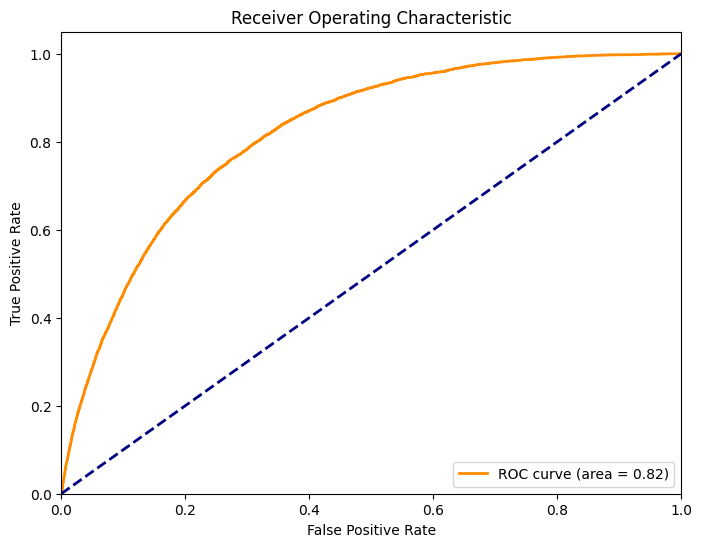

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
binary_classifier_3.fit(X_train, y_train)
y_pred_prob = binary_classifier_3.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")
print(f"AUC: {auc:.4f}")

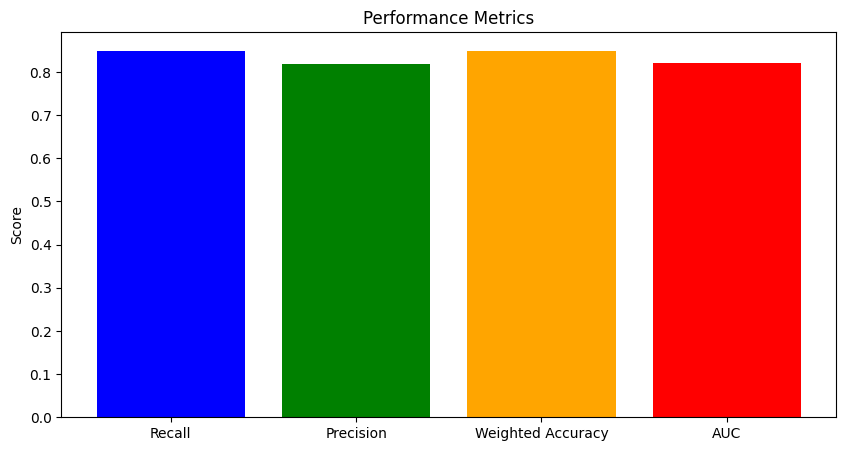

In [ ]:
labels = ['Recall', 'Precision', 'Weighted Accuracy', 'AUC']
values = [recall, precision, weighted_accuracy, auc]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()

In [ ]:
binary_classifier_3.load_weights('/content/gdrive/MyDrive/neurolabs/temp_binary_128_64_32_1/diabetes_weights-48-0.849.hdf5')
results = binary_classifier_3.evaluate(X_test,y_test)

1586/1586 [==============================] - 4s 3ms/step - loss: 0.3437 - accuracy: 0.8479 - precision: 0.5733 - recall: 0.1360 - auc: 0.8190


In [ ]:
x_test_pattern = X_test[7,:]
y_pred = binary_classifier_3.predict(x_test_pattern.reshape(1,-1))
print('Оценка вероятности риска диабета:', y_pred[0][0])

1/1 [==============================] - 0s 60ms/step
Оценка вероятности риска диабета: 0.5678967


In [ ]:
print(x_test_pattern)

[1.         1.         0.3255814  1.         0.         0.
 1.         1.         0.         1.         0.75       0.33333333
 1.         1.         0.66666667]


In [ ]:
original_features_array = min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
original_features_df = pd.DataFrame(original_features_array, columns=columns_after_drop)
print(original_features_df)

   HighBP  HighChol   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  \
0     1.0       1.0  40.0     1.0                   0.0           0.0     1.0   

   Veggies  HvyAlcoholConsump  AnyHealthcare  GenHlth  PhysHlth  DiffWalk  \
0      1.0                0.0            1.0      4.0      10.0       1.0   

   Sex  Age  
0  1.0  9.0  


# **2. Многоклассовый классификатор**

In [ ]:
df_multi = pd.read_csv('/content/gdrive/MyDrive/DLlabs/BODY/bodyPerformance.csv')
df_multi.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df_multi.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df_multi.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [ ]:
duplicate = df_multi[df_multi.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  1


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


In [ ]:
df_multi.drop_duplicates(inplace = True)

duplicate = df_multi[df_multi.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


In [ ]:
class_map = {'A':0,'B':1,'C':2,'D':3}
gender_map = {'F':0, 'M':1}

df_multi['Target Multi'] = df_multi['class'].map(class_map)
df_multi['gender_num'] = df_multi['gender'].map(gender_map)
df_multi[['class', 'Target Multi', 'gender', 'gender_num']].head(15)

,class,Target Multi,gender,gender_num
0,C,2,M,1
1,A,0,M,1
2,C,2,M,1
3,B,1,M,1
4,B,1,M,1
5,B,1,F,0
6,D,3,F,0
7,B,1,M,1
8,C,2,M,1
9,B,1,M,1


In [ ]:
X = df_multi.drop(['gender', 'class', 'Target Multi'], axis = 1)
y = df_multi[['Target Multi']]

X = min_max_scaler.fit_transform(X)

X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'All_Train : {X_all_train.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train,
                                                  stratify=y_all_train, test_size = 0.15,
                                                  random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

All_Train : (10713, 11), Test : (2679, 11)
Train : (9106, 11), Test : (1607, 11)


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
multi_classifier_1 = Sequential()
multi_classifier_1.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
multi_classifier_1.add(Dense(16,activation='relu'))
multi_classifier_1.add(Dense(8,activation='selu'))
multi_classifier_1.add(Dense(4,activation='softmax'))

multi_classifier_1.compile(loss='categorical_crossentropy',optimizer='adam',
                          metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                           )

early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/content/gdrive/MyDrive/DLlabs/Data/1.2/temp_multi_32_16_8_4/body_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

multi_classifier_1_history = multi_classifier_1.fit(X_train, y_train, batch_size=64,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=90)

Epoch 1/90
135/143 [===========================>..] - ETA: 0s - loss: 1.3462 - accuracy: 0.3493 - precision: 1.0000 - recall: 1.1574e-04 - auc: 0.6236    
Epoch 1: val_accuracy improved from -inf to 0.48538, saving model to /content/gdrive/My Drive/content/gdrive/MyDrive/DLlabs/Data/1.2/temp_multi_32_16_8_4/body_weights-01-0.485.hdf5
143/143 [==============================] - 2s 6ms/step - loss: 1.3416 - accuracy: 0.3552 - precision: 1.0000 - recall: 1.0982e-04 - auc: 0.6309 - val_loss: 1.2403 - val_accuracy: 0.4854 - val_precision: 1.0000 - val_recall: 0.0037 - val_auc: 0.7520
Epoch 2/90
 42/143 [=======>......................] - ETA: 0s - loss: 1.2136 - accuracy: 0.4647 - precision: 0.9853 - recall: 0.0249 - auc: 0.7574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/143 [==========================>...] - ETA: 0s - loss: 1.1345 - accuracy: 0.4967 - precision: 0.8445 - recall: 0.1335 - auc: 0.7844
Epoch 2: val_accuracy improved from 0.48538 to 0.55258, saving model to /content/gdrive/My Drive/content/gdrive/MyDrive/DLlabs/Data/1.2/temp_multi_32_16_8_4/body_weights-02-0.553.hdf5
143/143 [==============================] - 0s 3ms/step - loss: 1.1261 - accuracy: 0.5019 - precision: 0.8400 - recall: 0.1424 - auc: 0.7876 - val_loss: 0.9967 - val_accuracy: 0.5526 - val_precision: 0.8184 - val_recall: 0.2663 - val_auc: 0.8285
Epoch 3/90
141/143 [============================>.] - ETA: 0s - loss: 0.9938 - accuracy: 0.5503 - precision: 0.7451 - recall: 0.2922 - auc: 0.8238
Epoch 3: val_accuracy improved from 0.55258 to 0.58681, saving model to /content/gdrive/My Drive/content/gdrive/MyDrive/DLlabs/Data/1.2/temp_multi_32_16_8_4/body_weights-03-0.587.hdf5
143/143 [==============================] - 0s 3ms/step - loss: 0.9949 - accuracy: 0.5496 - precision: 0.

In [ ]:
multi_classifier_2 = Sequential()
multi_classifier_2.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
multi_classifier_2.add(Dense(64,activation='relu'))
multi_classifier_2.add(Dense(16,activation='relu'))
multi_classifier_2.add(Dense(4,activation='softmax'))

multi_classifier_2.compile(loss='categorical_crossentropy', optimizer='adam',
                          metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                           )

Early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/content/gdrive/MyDrive/DLlabs/Data/1.2/temp_multi_128_64_16_4/body_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

multi_classifier_history_2 = multi_classifier_2.fit(X_train, y_train, batch_size=64,
                      validation_data=(X_val,y_val), epochs=90)

Epoch 1/90
143/143 [==============================] - 4s 6ms/step - loss: 1.2690 - accuracy: 0.3907 - precision: 0.8814 - recall: 0.0490 - auc: 0.6844 - val_loss: 1.0297 - val_accuracy: 0.5619 - val_precision: 0.8898 - val_recall: 0.1960 - val_auc: 0.8213
Epoch 2/90
143/143 [==============================] - 0s 3ms/step - loss: 1.0016 - accuracy: 0.5411 - precision: 0.7396 - recall: 0.2807 - auc: 0.8169 - val_loss: 0.9279 - val_accuracy: 0.5787 - val_precision: 0.7769 - val_recall: 0.3143 - val_auc: 0.8441
Epoch 3/90
143/143 [==============================] - 1s 4ms/step - loss: 0.9546 - accuracy: 0.5665 - precision: 0.7296 - recall: 0.3164 - auc: 0.8337 - val_loss: 0.9175 - val_accuracy: 0.5986 - val_precision: 0.7387 - val_recall: 0.3466 - val_auc: 0.8479
Epoch 4/90
143/143 [==============================] - 1s 3ms/step - loss: 0.9312 - accuracy: 0.5760 - precision: 0.7169 - recall: 0.3498 - auc: 0.8419 - val_loss: 0.9078 - val_accuracy: 0.5793 - val_precision: 0.7390 - val_recall: 0

In [ ]:
multi_classifier_3 = Sequential()
multi_classifier_3.add(Dense(128,activation='selu',input_dim=X_train.shape[1]))
multi_classifier_3.add(Dense(64,activation='selu'))
multi_classifier_3.add(Dense(16,activation='selu'))
multi_classifier_3.add(Dense(4,activation='softmax'))

multi_classifier_3.compile(loss='categorical_crossentropy',optimizer='sgd',
                          metrics=[
                                'accuracy',
                                metrics.Precision(name='precision'),
                                metrics.Recall(name='recall'),
                                metrics.AUC(name='auc')
                                ]
                           )

multi_classifier_history_3 = multi_classifier_3.fit(X_train, y_train, batch_size=64,
                      validation_data=(X_val,y_val), epochs=90)

Epoch 1/90
143/143 [==============================] - 2s 6ms/step - loss: 1.3480 - accuracy: 0.3371 - precision: 1.0000 - recall: 3.2945e-04 - auc: 0.6064 - val_loss: 1.2750 - val_accuracy: 0.4350 - val_precision: 1.0000 - val_recall: 0.0062 - val_auc: 0.7152
Epoch 2/90
143/143 [==============================] - 0s 3ms/step - loss: 1.2483 - accuracy: 0.4432 - precision: 0.9669 - recall: 0.0289 - auc: 0.7185 - val_loss: 1.1770 - val_accuracy: 0.5159 - val_precision: 0.9775 - val_recall: 0.0541 - val_auc: 0.7752
Epoch 3/90
143/143 [==============================] - 0s 3ms/step - loss: 1.1551 - accuracy: 0.4987 - precision: 0.8947 - recall: 0.1139 - auc: 0.7756 - val_loss: 1.1125 - val_accuracy: 0.4798 - val_precision: 0.8418 - val_recall: 0.1755 - val_auc: 0.7811
Epoch 4/90
143/143 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.5198 - precision: 0.8209 - recall: 0.1938 - auc: 0.7994 - val_loss: 1.0289 - val_accuracy: 0.5389 - val_precision: 0.8016 - val_recal

**ИТОГ**: лучше всех "обучился" **второй** мульти-классификатор.

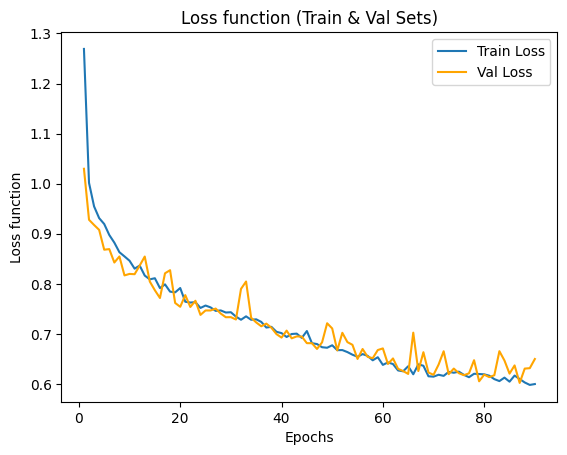

In [ ]:
loss_function = multi_classifier_history_2.history['loss']
val_loss_function = multi_classifier_history_2.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

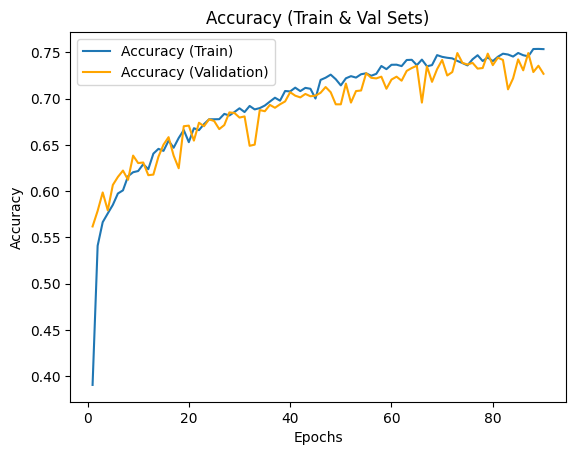

In [ ]:
acc = multi_classifier_history_2.history['accuracy']
val_acc = multi_classifier_history_2.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

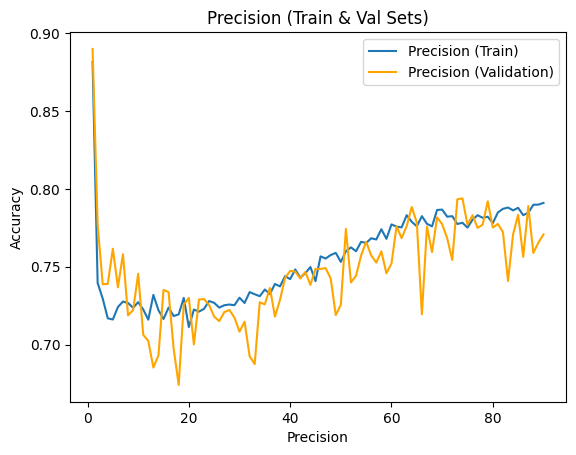

In [ ]:
prec = multi_classifier_history_2.history['precision']
val_prec = multi_classifier_history_2.history['val_precision']
epochs = range(1,len(prec)+1)

plt.title('Precision (Train & Val Sets)')
plt.plot(epochs,prec,label='Precision (Train)')
plt.plot(epochs,val_prec,color='orange',label='Precision (Validation)')
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

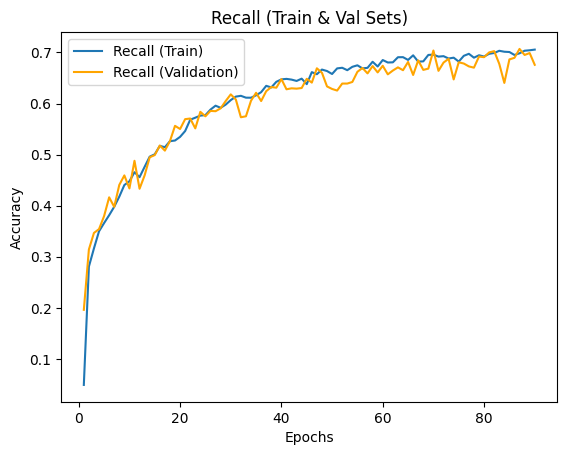

In [ ]:
recall = multi_classifier_history_2.history['recall']
val_recall = multi_classifier_history_2.history['val_recall']
epochs = range(1,len(acc)+1)

plt.title('Recall (Train & Val Sets)')
plt.plot(epochs,recall,label='Recall (Train)')
plt.plot(epochs,val_recall,color='orange',label='Recall (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

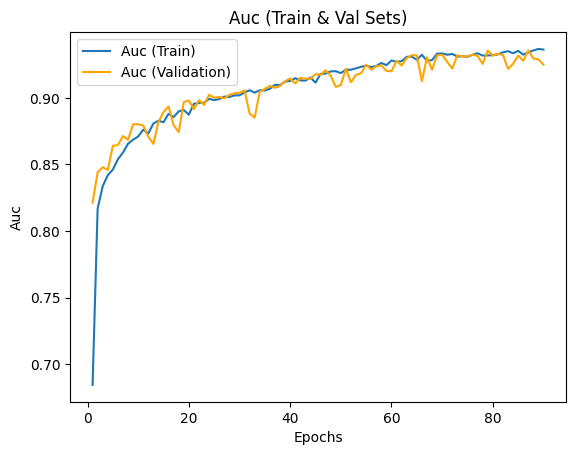

In [ ]:
auc = multi_classifier_history_2.history['auc']
val_auc = multi_classifier_history_2.history['val_auc']
epochs = range(1,len(acc)+1)

plt.title('Auc (Train & Val Sets)')
plt.plot(epochs,auc,label='Auc (Train)')
plt.plot(epochs,val_auc,color='orange',label='Auc (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Auc')
plt.legend()
plt.show()

84/84 [==============================] - 0s 3ms/step


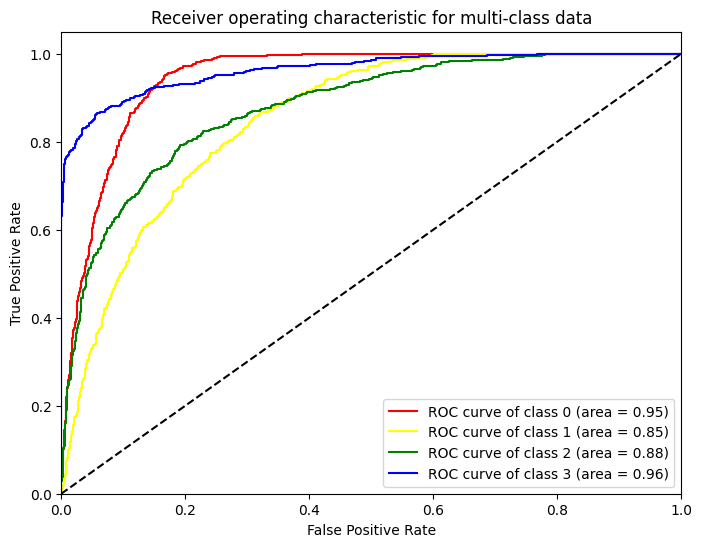

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = multi_classifier_2.predict(X_test)

n_classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['red', 'yellow', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(y_test[4])

[0. 1. 0. 0.]


In [ ]:
x_test_pattern = X_test[4,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)

y_pred = multi_classifier_1.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

[[ 23.  181.   93.2  21.3  72.  129.   56.8  25.5  52.  214.    1. ]]
1/1 [==============================] - 0s 25ms/step
[0.10984262 0.5215211  0.2154232  0.15321308]


# **3. Регрессор**

In [ ]:
df_reg = pd.read_csv('/content/gdrive/MyDrive/DLlabs/RECS/DS_2019_public.csv', encoding='ISO-8859-1')
df_reg.head()

<ipython-input-4-9a5ddad2592d>:1: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv('/content/gdrive/MyDrive/DLlabs/RECS/DS_2019_public.csv', encoding='ISO-8859-1')


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [ ]:
df_reg.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,...,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,...,14.406053,2.346643,13733.416871,2.775507,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-2.000000,-9.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,0.000000,...,62.000000,0.000000,7708.000000,2.000000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,0.000000,...,67.000000,0.000000,12761.000000,5.000000,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,1.000000,...,70.000000,2.000000,21169.500000,5.000000,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,1.000000,...,90.000000,40.000000,284130.000000,8.000000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [ ]:
df_reg.info

<bound method DataFrame.info of        Climate_Region_Pub  DIVISION  REPORTABLE_DOMAIN DOLELCOL  TOTALDOLCOL  \
0                       5        10                 26   16.793           17   
1                       1         1                  1   48.901           49   
2                       1         3                  7  101.048          101   
3                       1         1                  1        0            0   
4                       1         4                 10   45.132           45   
...                   ...       ...                ...      ...          ...   
10870                   4         5                 13    345.8          346   
10871                   1         3                  9   13.005           13   
10872                   1         4                 10    97.67           98   
10873                   1         8                 23   12.834           13   
10874                   5        10                 26        0            0   

       

In [ ]:
df_reg.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [ ]:
df_reg.dtypes

Climate_Region_Pub      int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
DOLELCOL               object
TOTALDOLCOL             int64
                       ...   
HEATROOM                int64
WDWATER                 int64
UGWARM                  int64
DRYRFUEL                int64
KWHRFG                float64
Length: 121, dtype: object

In [ ]:
duplicate = df_reg[df_reg.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  0


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG


In [ ]:
df_reg = df_reg.select_dtypes(exclude=['object'])
df_reg = df_reg.astype(float)
df_reg.dtypes

Climate_Region_Pub    float64
DIVISION              float64
REPORTABLE_DOMAIN     float64
TOTALDOLCOL           float64
KWHCOL                float64
                       ...   
HEATROOM              float64
WDWATER               float64
UGWARM                float64
DRYRFUEL              float64
KWHRFG                float64
Length: 113, dtype: object

In [ ]:
target_reg = "TOTALDOLSPH"

X = df_reg.drop(columns=[target_reg])
y = df_reg[[target_reg]]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(f'Train_Validation : {X_train_val.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Validation : {X_val.shape}')

Train_Validation : (8156, 112), Test : (2719, 112)
Train : (6524, 112), Validation : (1632, 112)


In [ ]:
regressor_1 = Sequential()
regressor_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
regressor_1.add(Dense(32, activation='relu'))
regressor_1.add(Dense(16, activation='relu'))
regressor_1.add(Dense(1, activation='linear'))

regressor_1.summary()

regressor_1.compile(loss='mse',optimizer='adam',metrics='mae')

early_stop = EarlyStopping(monitor='val_mse',patience=20,mode='min',verbose=1,restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor='val_loss',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

regressor_history_1 = regressor_1.fit(X_train, y_train, batch_size=128,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=300)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                7232      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
47/51 [==========================>...] - ETA: 0s - loss: 563158.6875 - mae: 554.7228


Epoch 1: val_loss improved from inf to 563148.43750, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-01-563148.438.hdf5
51/51 [==============================] - 2s 9ms/step - loss: 567233.3750 - mae: 556.9360 - val_loss: 563148.4375 - val_mae: 553.7125
Epoch 2/300
49/51 [===========================>..] - ETA: 0s - loss: 494206.1562 - mae: 494.5253

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 563148.43750 to 398155.68750, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-02-398155.688.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 491267.4062 - mae: 492.5975 - val_loss: 398155.6875 - val_mae: 412.9370
Epoch 3/300
51/51 [==============================] - ETA: 0s - loss: 283545.1250 - mae: 349.0370


Epoch 3: val_loss improved from 398155.68750 to 230124.93750, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-03-230124.938.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 283545.1250 - mae: 349.0370 - val_loss: 230124.9375 - val_mae: 329.5024
Epoch 4/300
51/51 [==============================] - ETA: 0s - loss: 215549.2656 - mae: 326.5279


Epoch 4: val_loss improved from 230124.93750 to 208260.37500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-04-208260.375.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 215549.2656 - mae: 326.5279 - val_loss: 208260.3750 - val_mae: 306.8568
Epoch 5/300
26/51 [==============>...............] - ETA: 0s - loss: 193732.5781 - mae: 307.8411


Epoch 5: val_loss improved from 208260.37500 to 179936.87500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-05-179936.875.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 191140.0156 - mae: 302.4613 - val_loss: 179936.8750 - val_mae: 279.1716
Epoch 6/300
47/51 [==========================>...] - ETA: 0s - loss: 157733.3438 - mae: 267.0479


Epoch 6: val_loss improved from 179936.87500 to 145065.82812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-06-145065.828.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 159127.8906 - mae: 266.9022 - val_loss: 145065.8281 - val_mae: 242.7068
Epoch 7/300
46/51 [==========================>...] - ETA: 0s - loss: 127768.1094 - mae: 226.8119


Epoch 7: val_loss improved from 145065.82812 to 112438.73438, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-07-112438.734.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 123330.3750 - mae: 224.5853 - val_loss: 112438.7344 - val_mae: 206.8360
Epoch 8/300
49/51 [===========================>..] - ETA: 0s - loss: 98653.0234 - mae: 194.3379 


Epoch 8: val_loss improved from 112438.73438 to 94456.07812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-08-94456.078.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 98208.6250 - mae: 194.1003 - val_loss: 94456.0781 - val_mae: 182.3132
Epoch 9/300
48/51 [===========================>..] - ETA: 0s - loss: 86093.4141 - mae: 178.8038


Epoch 9: val_loss improved from 94456.07812 to 87111.14062, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-09-87111.141.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 85069.3672 - mae: 178.8409 - val_loss: 87111.1406 - val_mae: 178.9599
Epoch 10/300
45/51 [=========================>....] - ETA: 0s - loss: 77343.0781 - mae: 167.4133


Epoch 10: val_loss improved from 87111.14062 to 75127.07031, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-10-75127.070.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 75824.7344 - mae: 166.7213 - val_loss: 75127.0703 - val_mae: 155.6678
Epoch 11/300
48/51 [===========================>..] - ETA: 0s - loss: 66568.6875 - mae: 153.9329


Epoch 11: val_loss improved from 75127.07031 to 67548.87500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-11-67548.875.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 66572.3984 - mae: 153.6895 - val_loss: 67548.8750 - val_mae: 148.0377
Epoch 12/300
47/51 [==========================>...] - ETA: 0s - loss: 58598.1602 - mae: 144.7293


Epoch 12: val_loss improved from 67548.87500 to 60004.00000, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-12-60004.000.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 58945.0117 - mae: 144.4997 - val_loss: 60004.0000 - val_mae: 137.2429
Epoch 13/300
41/51 [=======================>......] - ETA: 0s - loss: 51701.8906 - mae: 135.2594


Epoch 13: val_loss improved from 60004.00000 to 54825.32812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-13-54825.328.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 51771.6797 - mae: 135.6395 - val_loss: 54825.3281 - val_mae: 137.2615
Epoch 14/300
50/51 [============================>.] - ETA: 0s - loss: 45164.6289 - mae: 127.6328


Epoch 14: val_loss improved from 54825.32812 to 47033.98828, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-14-47033.988.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 45115.0312 - mae: 127.5775 - val_loss: 47033.9883 - val_mae: 123.4626
Epoch 15/300
48/51 [===========================>..] - ETA: 0s - loss: 36994.2070 - mae: 118.3647


Epoch 15: val_loss improved from 47033.98828 to 41335.29297, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-15-41335.293.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 38653.7617 - mae: 118.6206 - val_loss: 41335.2930 - val_mae: 116.3281
Epoch 16/300
45/51 [=========================>....] - ETA: 0s - loss: 33162.1484 - mae: 111.4778


Epoch 16: val_loss improved from 41335.29297 to 35693.24219, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-16-35693.242.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 33328.7891 - mae: 111.4238 - val_loss: 35693.2422 - val_mae: 109.4200
Epoch 17/300
27/51 [==============>...............] - ETA: 0s - loss: 31898.1289 - mae: 109.0772


Epoch 17: val_loss improved from 35693.24219 to 31053.84766, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-17-31053.848.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 28300.4375 - mae: 102.9589 - val_loss: 31053.8477 - val_mae: 101.2310
Epoch 18/300
49/51 [===========================>..] - ETA: 0s - loss: 24415.9238 - mae: 96.1456


Epoch 18: val_loss improved from 31053.84766 to 27067.18945, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-18-27067.189.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 24314.0156 - mae: 96.1017 - val_loss: 27067.1895 - val_mae: 96.0683
Epoch 19/300
48/51 [===========================>..] - ETA: 0s - loss: 21084.7676 - mae: 89.8696


Epoch 19: val_loss improved from 27067.18945 to 23859.93359, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-19-23859.934.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 20974.0879 - mae: 89.7564 - val_loss: 23859.9336 - val_mae: 90.1485
Epoch 20/300
47/51 [==========================>...] - ETA: 0s - loss: 18093.2773 - mae: 82.9402


Epoch 20: val_loss improved from 23859.93359 to 21186.41211, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-20-21186.412.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 18128.8750 - mae: 83.3247 - val_loss: 21186.4121 - val_mae: 85.7686
Epoch 21/300
50/51 [============================>.] - ETA: 0s - loss: 16011.3926 - mae: 78.3465


Epoch 21: val_loss improved from 21186.41211 to 19524.36719, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-21-19524.367.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 16042.3223 - mae: 78.3710 - val_loss: 19524.3672 - val_mae: 84.9734
Epoch 22/300
40/51 [======================>.......] - ETA: 0s - loss: 14184.3418 - mae: 74.3606


Epoch 22: val_loss improved from 19524.36719 to 17134.18359, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-22-17134.184.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 14148.5088 - mae: 73.8217 - val_loss: 17134.1836 - val_mae: 77.5640
Epoch 23/300
41/51 [=======================>......] - ETA: 0s - loss: 12827.1143 - mae: 69.3928


Epoch 23: val_loss improved from 17134.18359 to 15625.63867, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-23-15625.639.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 12692.6387 - mae: 69.7512 - val_loss: 15625.6387 - val_mae: 74.5820
Epoch 24/300
26/51 [==============>...............] - ETA: 0s - loss: 11735.7148 - mae: 67.6706


Epoch 24: val_loss improved from 15625.63867 to 14299.55859, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-24-14299.559.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 11474.0527 - mae: 66.1439 - val_loss: 14299.5586 - val_mae: 70.8011
Epoch 25/300
49/51 [===========================>..] - ETA: 0s - loss: 10823.6621 - mae: 64.2742


Epoch 25: val_loss improved from 14299.55859 to 13231.70117, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-25-13231.701.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 10702.1191 - mae: 63.9418 - val_loss: 13231.7012 - val_mae: 68.5084
Epoch 26/300
50/51 [============================>.] - ETA: 0s - loss: 9734.7305 - mae: 61.4590 


Epoch 26: val_loss improved from 13231.70117 to 12609.84668, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-26-12609.847.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 9841.6572 - mae: 61.3749 - val_loss: 12609.8467 - val_mae: 68.0796
Epoch 27/300
49/51 [===========================>..] - ETA: 0s - loss: 9185.9463 - mae: 59.2874


Epoch 27: val_loss improved from 12609.84668 to 11597.55371, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-27-11597.554.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 9234.0303 - mae: 59.3133 - val_loss: 11597.5537 - val_mae: 64.1498
Epoch 28/300
51/51 [==============================] - ETA: 0s - loss: 8676.6084 - mae: 57.2383


Epoch 28: val_loss improved from 11597.55371 to 11259.19336, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-28-11259.193.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 8676.6084 - mae: 57.2383 - val_loss: 11259.1934 - val_mae: 64.6866
Epoch 29/300
49/51 [===========================>..] - ETA: 0s - loss: 8283.4404 - mae: 55.6785


Epoch 29: val_loss improved from 11259.19336 to 10381.84473, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-29-10381.845.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 8175.8921 - mae: 55.4669 - val_loss: 10381.8447 - val_mae: 61.2087
Epoch 30/300
44/51 [========================>.....] - ETA: 0s - loss: 7919.6904 - mae: 54.2903


Epoch 30: val_loss improved from 10381.84473 to 10146.46289, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-30-10146.463.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 7781.3022 - mae: 54.0709 - val_loss: 10146.4629 - val_mae: 61.6062
Epoch 31/300
27/51 [==============>...............] - ETA: 0s - loss: 7806.5508 - mae: 53.7761


Epoch 31: val_loss improved from 10146.46289 to 9392.45605, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-31-9392.456.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 7529.2637 - mae: 53.6871 - val_loss: 9392.4561 - val_mae: 58.3606
Epoch 32/300
50/51 [============================>.] - ETA: 0s - loss: 7251.2095 - mae: 52.2160


Epoch 32: val_loss improved from 9392.45605 to 8962.94922, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-32-8962.949.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 7190.9014 - mae: 52.1092 - val_loss: 8962.9492 - val_mae: 56.6515
Epoch 33/300
49/51 [===========================>..] - ETA: 0s - loss: 6967.8184 - mae: 51.3106


Epoch 33: val_loss improved from 8962.94922 to 8537.43359, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-33-8537.434.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 6903.6401 - mae: 51.0340 - val_loss: 8537.4336 - val_mae: 55.0525
Epoch 34/300
41/51 [=======================>......] - ETA: 0s - loss: 6944.6226 - mae: 51.3632


Epoch 34: val_loss improved from 8537.43359 to 8234.83594, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-34-8234.836.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 6751.2837 - mae: 50.7337 - val_loss: 8234.8359 - val_mae: 53.8770
Epoch 35/300
44/51 [========================>.....] - ETA: 0s - loss: 6409.7363 - mae: 49.1209


Epoch 35: val_loss improved from 8234.83594 to 8215.85645, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-35-8215.856.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 6382.3760 - mae: 49.1174 - val_loss: 8215.8564 - val_mae: 55.2253
Epoch 36/300
48/51 [===========================>..] - ETA: 0s - loss: 6099.8066 - mae: 47.3482


Epoch 36: val_loss did not improve from 8215.85645
51/51 [==============================] - 0s 3ms/step - loss: 6092.4175 - mae: 47.3689 - val_loss: 8359.7529 - val_mae: 56.8006
Epoch 37/300
47/51 [==========================>...] - ETA: 0s - loss: 5976.0181 - mae: 47.3230


Epoch 37: val_loss improved from 8215.85645 to 7770.42969, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-37-7770.430.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5984.5088 - mae: 47.3531 - val_loss: 7770.4297 - val_mae: 54.1328
Epoch 38/300
51/51 [==============================] - ETA: 0s - loss: 5809.5483 - mae: 46.2901


Epoch 38: val_loss improved from 7770.42969 to 7335.05859, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-38-7335.059.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5809.5483 - mae: 46.2901 - val_loss: 7335.0586 - val_mae: 50.6868
Epoch 39/300
51/51 [==============================] - ETA: 0s - loss: 5610.8364 - mae: 45.0916


Epoch 39: val_loss improved from 7335.05859 to 7229.97363, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-39-7229.974.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5610.8364 - mae: 45.0916 - val_loss: 7229.9736 - val_mae: 51.2043
Epoch 40/300
43/51 [========================>.....] - ETA: 0s - loss: 5349.8589 - mae: 45.1509


Epoch 40: val_loss improved from 7229.97363 to 6850.72266, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-40-6850.723.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5529.9443 - mae: 45.2134 - val_loss: 6850.7227 - val_mae: 48.4839
Epoch 41/300
48/51 [===========================>..] - ETA: 0s - loss: 5452.4619 - mae: 44.5406


Epoch 41: val_loss did not improve from 6850.72266
51/51 [==============================] - 0s 3ms/step - loss: 5368.7261 - mae: 44.3309 - val_loss: 7008.1953 - val_mae: 50.4704
Epoch 42/300
46/51 [==========================>...] - ETA: 0s - loss: 5133.9751 - mae: 43.0573


Epoch 42: val_loss improved from 6850.72266 to 6612.56104, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-42-6612.561.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 5230.8721 - mae: 43.2952 - val_loss: 6612.5610 - val_mae: 47.6105
Epoch 43/300
49/51 [===========================>..] - ETA: 0s - loss: 5068.3965 - mae: 42.7239


Epoch 43: val_loss improved from 6612.56104 to 6402.60156, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-43-6402.602.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5087.2466 - mae: 42.6598 - val_loss: 6402.6016 - val_mae: 46.5098
Epoch 44/300
49/51 [===========================>..] - ETA: 0s - loss: 4949.2148 - mae: 42.3319


Epoch 44: val_loss improved from 6402.60156 to 6288.50977, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-44-6288.510.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 5024.2656 - mae: 42.4943 - val_loss: 6288.5098 - val_mae: 46.3013
Epoch 45/300
48/51 [===========================>..] - ETA: 0s - loss: 5005.1265 - mae: 42.3805


Epoch 45: val_loss improved from 6288.50977 to 6170.36084, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-45-6170.361.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 4978.0796 - mae: 42.3017 - val_loss: 6170.3608 - val_mae: 45.3612
Epoch 46/300
49/51 [===========================>..] - ETA: 0s - loss: 4872.5869 - mae: 41.3510


Epoch 46: val_loss improved from 6170.36084 to 6077.37646, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-46-6077.376.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 4865.9443 - mae: 41.4350 - val_loss: 6077.3765 - val_mae: 44.6978
Epoch 47/300
51/51 [==============================] - ETA: 0s - loss: 4824.8926 - mae: 41.4865


Epoch 47: val_loss improved from 6077.37646 to 5977.55957, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-47-5977.560.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4824.8926 - mae: 41.4865 - val_loss: 5977.5596 - val_mae: 44.3182
Epoch 48/300
42/51 [=======================>......] - ETA: 0s - loss: 4645.4243 - mae: 40.3154


Epoch 48: val_loss improved from 5977.55957 to 5967.40771, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-48-5967.408.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4698.5269 - mae: 40.4397 - val_loss: 5967.4077 - val_mae: 45.0224
Epoch 49/300
49/51 [===========================>..] - ETA: 0s - loss: 4664.2148 - mae: 40.5732


Epoch 49: val_loss improved from 5967.40771 to 5918.19434, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-49-5918.194.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4612.0898 - mae: 40.4272 - val_loss: 5918.1943 - val_mae: 44.4493
Epoch 50/300
50/51 [============================>.] - ETA: 0s - loss: 4497.0420 - mae: 39.2920


Epoch 50: val_loss did not improve from 5918.19434
51/51 [==============================] - 0s 5ms/step - loss: 4520.9297 - mae: 39.3530 - val_loss: 6239.4331 - val_mae: 48.5883
Epoch 51/300
50/51 [============================>.] - ETA: 0s - loss: 4538.0957 - mae: 40.7675


Epoch 51: val_loss improved from 5918.19434 to 5632.96875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-51-5632.969.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4567.1987 - mae: 40.7881 - val_loss: 5632.9688 - val_mae: 42.6589
Epoch 52/300
47/51 [==========================>...] - ETA: 0s - loss: 4546.9951 - mae: 41.4078


Epoch 52: val_loss did not improve from 5632.96875
51/51 [==============================] - 0s 5ms/step - loss: 4615.4756 - mae: 41.5997 - val_loss: 6856.4995 - val_mae: 54.5646
Epoch 53/300
46/51 [==========================>...] - ETA: 0s - loss: 4534.4814 - mae: 40.6119


Epoch 53: val_loss improved from 5632.96875 to 5598.48975, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-53-5598.490.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4527.6455 - mae: 40.5221 - val_loss: 5598.4897 - val_mae: 43.0160
Epoch 54/300
37/51 [====================>.........] - ETA: 0s - loss: 4382.4043 - mae: 39.4689


Epoch 54: val_loss improved from 5598.48975 to 5596.61523, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-54-5596.615.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4396.0762 - mae: 39.2854 - val_loss: 5596.6152 - val_mae: 43.0426
Epoch 55/300
50/51 [============================>.] - ETA: 0s - loss: 4351.1084 - mae: 39.0245


Epoch 55: val_loss did not improve from 5596.61523
51/51 [==============================] - 0s 5ms/step - loss: 4326.4209 - mae: 38.9727 - val_loss: 5697.6265 - val_mae: 45.0675
Epoch 56/300
42/51 [=======================>......] - ETA: 0s - loss: 4369.3428 - mae: 38.2973


Epoch 56: val_loss improved from 5596.61523 to 5361.20166, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-56-5361.202.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4236.9727 - mae: 38.1828 - val_loss: 5361.2017 - val_mae: 40.9780
Epoch 57/300
45/51 [=========================>....] - ETA: 0s - loss: 4283.7397 - mae: 38.5799


Epoch 57: val_loss did not improve from 5361.20166
51/51 [==============================] - 0s 6ms/step - loss: 4282.5449 - mae: 38.7265 - val_loss: 5992.8584 - val_mae: 48.1348
Epoch 58/300
49/51 [===========================>..] - ETA: 0s - loss: 4207.5669 - mae: 38.0913


Epoch 58: val_loss improved from 5361.20166 to 5280.96191, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-58-5280.962.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4184.5986 - mae: 38.0194 - val_loss: 5280.9619 - val_mae: 41.5666
Epoch 59/300
50/51 [============================>.] - ETA: 0s - loss: 4149.3628 - mae: 37.6112


Epoch 59: val_loss improved from 5280.96191 to 5152.77637, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-59-5152.776.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4133.3076 - mae: 37.5933 - val_loss: 5152.7764 - val_mae: 39.7945
Epoch 60/300
50/51 [============================>.] - ETA: 0s - loss: 4175.4004 - mae: 38.8347


Epoch 60: val_loss did not improve from 5152.77637
51/51 [==============================] - 0s 5ms/step - loss: 4175.3564 - mae: 38.8527 - val_loss: 5451.0234 - val_mae: 43.8722
Epoch 61/300
38/51 [=====================>........] - ETA: 0s - loss: 4128.0947 - mae: 37.2607


Epoch 61: val_loss improved from 5152.77637 to 5105.59766, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-61-5105.598.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4037.4639 - mae: 37.3637 - val_loss: 5105.5977 - val_mae: 39.6025
Epoch 62/300
50/51 [============================>.] - ETA: 0s - loss: 3909.7363 - mae: 36.2470


Epoch 62: val_loss did not improve from 5105.59766
51/51 [==============================] - 0s 5ms/step - loss: 3940.7854 - mae: 36.4309 - val_loss: 5242.3945 - val_mae: 42.7031
Epoch 63/300
38/51 [=====================>........] - ETA: 0s - loss: 3956.6204 - mae: 36.0248


Epoch 63: val_loss did not improve from 5105.59766
51/51 [==============================] - 0s 5ms/step - loss: 3940.2095 - mae: 36.6354 - val_loss: 5404.1016 - val_mae: 43.8510
Epoch 64/300
34/51 [===================>..........] - ETA: 0s - loss: 3850.2561 - mae: 36.5668


Epoch 64: val_loss improved from 5105.59766 to 4921.22754, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-64-4921.228.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3995.6860 - mae: 37.7298 - val_loss: 4921.2275 - val_mae: 38.6196
Epoch 65/300
49/51 [===========================>..] - ETA: 0s - loss: 3914.6729 - mae: 36.3487


Epoch 65: val_loss improved from 4921.22754 to 4863.65186, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-65-4863.652.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3850.6824 - mae: 36.0972 - val_loss: 4863.6519 - val_mae: 38.4336
Epoch 66/300
49/51 [===========================>..] - ETA: 0s - loss: 3696.5981 - mae: 35.0633


Epoch 66: val_loss did not improve from 4863.65186
51/51 [==============================] - 0s 5ms/step - loss: 3757.9648 - mae: 35.3299 - val_loss: 4870.5151 - val_mae: 38.6257
Epoch 67/300
49/51 [===========================>..] - ETA: 0s - loss: 3758.3572 - mae: 35.5053


Epoch 67: val_loss did not improve from 4863.65186
51/51 [==============================] - 0s 5ms/step - loss: 3751.1934 - mae: 35.6062 - val_loss: 4945.8228 - val_mae: 40.1299
Epoch 68/300
43/51 [========================>.....] - ETA: 0s - loss: 3699.9805 - mae: 34.9702


Epoch 68: val_loss did not improve from 4863.65186
51/51 [==============================] - 0s 6ms/step - loss: 3697.1633 - mae: 35.0637 - val_loss: 5013.5952 - val_mae: 41.2804
Epoch 69/300
38/51 [=====================>........] - ETA: 0s - loss: 3730.1130 - mae: 36.0074


Epoch 69: val_loss improved from 4863.65186 to 4683.02490, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-69-4683.025.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 3743.8540 - mae: 35.8220 - val_loss: 4683.0249 - val_mae: 37.5826
Epoch 70/300
42/51 [=======================>......] - ETA: 0s - loss: 3704.4263 - mae: 35.0585


Epoch 70: val_loss did not improve from 4683.02490
51/51 [==============================] - 0s 6ms/step - loss: 3654.5500 - mae: 35.0030 - val_loss: 4685.3057 - val_mae: 37.4758
Epoch 71/300
43/51 [========================>.....] - ETA: 0s - loss: 3549.9861 - mae: 34.4653


Epoch 71: val_loss improved from 4683.02490 to 4624.83057, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-71-4624.831.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3591.9519 - mae: 34.6923 - val_loss: 4624.8306 - val_mae: 37.6246
Epoch 72/300
44/51 [========================>.....] - ETA: 0s - loss: 3683.5078 - mae: 35.1380


Epoch 72: val_loss improved from 4624.83057 to 4602.12891, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-72-4602.129.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3582.1719 - mae: 34.6860 - val_loss: 4602.1289 - val_mae: 37.3776
Epoch 73/300
46/51 [==========================>...] - ETA: 0s - loss: 3577.9829 - mae: 34.1731


Epoch 73: val_loss improved from 4602.12891 to 4574.35400, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-73-4574.354.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3524.5183 - mae: 34.0728 - val_loss: 4574.3540 - val_mae: 36.8887
Epoch 74/300
45/51 [=========================>....] - ETA: 0s - loss: 3425.6499 - mae: 33.6095


Epoch 74: val_loss improved from 4574.35400 to 4502.97510, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-74-4502.975.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3490.4128 - mae: 34.1507 - val_loss: 4502.9751 - val_mae: 36.5157
Epoch 75/300
48/51 [===========================>..] - ETA: 0s - loss: 3525.6785 - mae: 34.0723


Epoch 75: val_loss improved from 4502.97510 to 4447.41406, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-75-4447.414.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3483.1665 - mae: 33.9771 - val_loss: 4447.4141 - val_mae: 36.7386
Epoch 76/300
44/51 [========================>.....] - ETA: 0s - loss: 3441.2593 - mae: 34.3927


Epoch 76: val_loss did not improve from 4447.41406
51/51 [==============================] - 0s 3ms/step - loss: 3456.0466 - mae: 34.6121 - val_loss: 4482.5332 - val_mae: 37.2690
Epoch 77/300
50/51 [============================>.] - ETA: 0s - loss: 3420.4287 - mae: 33.6931


Epoch 77: val_loss improved from 4447.41406 to 4358.68701, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-77-4358.687.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3401.9785 - mae: 33.6167 - val_loss: 4358.6870 - val_mae: 35.8378
Epoch 78/300
49/51 [===========================>..] - ETA: 0s - loss: 3396.9875 - mae: 33.5183


Epoch 78: val_loss did not improve from 4358.68701
51/51 [==============================] - 0s 4ms/step - loss: 3367.3921 - mae: 33.4280 - val_loss: 4595.7734 - val_mae: 39.0952
Epoch 79/300
51/51 [==============================] - ETA: 0s - loss: 3412.3848 - mae: 34.6416


Epoch 79: val_loss improved from 4358.68701 to 4321.62939, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-79-4321.629.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3412.3848 - mae: 34.6416 - val_loss: 4321.6294 - val_mae: 35.8325
Epoch 80/300
45/51 [=========================>....] - ETA: 0s - loss: 3369.2080 - mae: 33.0469


Epoch 80: val_loss improved from 4321.62939 to 4262.88428, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-80-4262.884.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3260.1526 - mae: 32.7109 - val_loss: 4262.8843 - val_mae: 35.4324
Epoch 81/300
45/51 [=========================>....] - ETA: 0s - loss: 3366.9524 - mae: 34.0886


Epoch 81: val_loss improved from 4262.88428 to 4261.65332, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-81-4261.653.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3294.2600 - mae: 33.6177 - val_loss: 4261.6533 - val_mae: 35.4610
Epoch 82/300
51/51 [==============================] - ETA: 0s - loss: 3207.2090 - mae: 32.6806


Epoch 82: val_loss did not improve from 4261.65332
51/51 [==============================] - 0s 3ms/step - loss: 3207.2090 - mae: 32.6806 - val_loss: 4275.2070 - val_mae: 36.5924
Epoch 83/300
49/51 [===========================>..] - ETA: 0s - loss: 3197.1777 - mae: 32.6739


Epoch 83: val_loss improved from 4261.65332 to 4185.36719, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-83-4185.367.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3184.4688 - mae: 32.6228 - val_loss: 4185.3672 - val_mae: 35.3650
Epoch 84/300
50/51 [============================>.] - ETA: 0s - loss: 3139.9763 - mae: 31.8978


Epoch 84: val_loss improved from 4185.36719 to 4131.87012, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-84-4131.870.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3133.8982 - mae: 31.8874 - val_loss: 4131.8701 - val_mae: 34.6543
Epoch 85/300
27/51 [==============>...............] - ETA: 0s - loss: 3108.2131 - mae: 31.8433


Epoch 85: val_loss improved from 4131.87012 to 4105.89697, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-85-4105.897.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3103.9812 - mae: 32.0232 - val_loss: 4105.8970 - val_mae: 34.6191
Epoch 86/300
46/51 [==========================>...] - ETA: 0s - loss: 3040.3135 - mae: 31.6295


Epoch 86: val_loss improved from 4105.89697 to 4092.81958, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-86-4092.820.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3045.3257 - mae: 31.7313 - val_loss: 4092.8196 - val_mae: 35.2237
Epoch 87/300
48/51 [===========================>..] - ETA: 0s - loss: 3061.7041 - mae: 31.4923


Epoch 87: val_loss improved from 4092.81958 to 3984.23560, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-87-3984.236.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3025.6321 - mae: 31.4799 - val_loss: 3984.2356 - val_mae: 34.1380
Epoch 88/300
50/51 [============================>.] - ETA: 0s - loss: 2974.6506 - mae: 31.4853


Epoch 88: val_loss improved from 3984.23560 to 3978.12354, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-88-3978.124.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 3002.1548 - mae: 31.5527 - val_loss: 3978.1235 - val_mae: 34.1887
Epoch 89/300
44/51 [========================>.....] - ETA: 0s - loss: 2933.5430 - mae: 31.1154


Epoch 89: val_loss improved from 3978.12354 to 3958.50806, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-89-3958.508.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2931.2820 - mae: 30.9474 - val_loss: 3958.5081 - val_mae: 34.0005
Epoch 90/300
49/51 [===========================>..] - ETA: 0s - loss: 2988.9128 - mae: 31.5712


Epoch 90: val_loss did not improve from 3958.50806
51/51 [==============================] - 0s 3ms/step - loss: 2935.9182 - mae: 31.3222 - val_loss: 4108.3560 - val_mae: 34.9770
Epoch 91/300
45/51 [=========================>....] - ETA: 0s - loss: 2938.9307 - mae: 30.7918


Epoch 91: val_loss did not improve from 3958.50806
51/51 [==============================] - 0s 3ms/step - loss: 2880.2390 - mae: 30.6344 - val_loss: 4072.2522 - val_mae: 35.6945
Epoch 92/300
49/51 [===========================>..] - ETA: 0s - loss: 2882.2278 - mae: 31.6003


Epoch 92: val_loss improved from 3958.50806 to 3890.53101, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-92-3890.531.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2890.5525 - mae: 31.6695 - val_loss: 3890.5310 - val_mae: 34.4318
Epoch 93/300
44/51 [========================>.....] - ETA: 0s - loss: 2709.5664 - mae: 29.6835


Epoch 93: val_loss improved from 3890.53101 to 3761.45068, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-93-3761.451.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2782.3091 - mae: 29.9270 - val_loss: 3761.4507 - val_mae: 32.8580
Epoch 94/300
38/51 [=====================>........] - ETA: 0s - loss: 2833.7969 - mae: 30.7329


Epoch 94: val_loss did not improve from 3761.45068
51/51 [==============================] - 0s 4ms/step - loss: 2851.6833 - mae: 31.3493 - val_loss: 3800.9846 - val_mae: 34.1305
Epoch 95/300
41/51 [=======================>......] - ETA: 0s - loss: 2679.8835 - mae: 30.0575


Epoch 95: val_loss did not improve from 3761.45068
51/51 [==============================] - 0s 4ms/step - loss: 2759.0073 - mae: 30.2448 - val_loss: 3800.0767 - val_mae: 33.9624
Epoch 96/300
43/51 [========================>.....] - ETA: 0s - loss: 2720.2192 - mae: 30.3201


Epoch 96: val_loss improved from 3761.45068 to 3663.50952, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-96-3663.510.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2713.4004 - mae: 30.0824 - val_loss: 3663.5095 - val_mae: 32.3662
Epoch 97/300
47/51 [==========================>...] - ETA: 0s - loss: 2711.7219 - mae: 29.5910


Epoch 97: val_loss improved from 3663.50952 to 3639.55762, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-97-3639.558.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2677.4402 - mae: 29.5756 - val_loss: 3639.5576 - val_mae: 32.7698
Epoch 98/300
47/51 [==========================>...] - ETA: 0s - loss: 2774.7957 - mae: 30.7392


Epoch 98: val_loss did not improve from 3639.55762
51/51 [==============================] - 0s 3ms/step - loss: 2709.4116 - mae: 30.4133 - val_loss: 3736.8909 - val_mae: 34.0019
Epoch 99/300
44/51 [========================>.....] - ETA: 0s - loss: 2643.3135 - mae: 29.2266


Epoch 99: val_loss did not improve from 3639.55762
51/51 [==============================] - 0s 4ms/step - loss: 2640.1584 - mae: 29.6076 - val_loss: 3760.0857 - val_mae: 36.3989
Epoch 100/300
49/51 [===========================>..] - ETA: 0s - loss: 2575.1299 - mae: 29.4495


Epoch 100: val_loss improved from 3639.55762 to 3509.29785, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-100-3509.298.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2600.5745 - mae: 29.5356 - val_loss: 3509.2979 - val_mae: 31.8823
Epoch 101/300
46/51 [==========================>...] - ETA: 0s - loss: 2607.4233 - mae: 29.5850


Epoch 101: val_loss improved from 3509.29785 to 3501.17700, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-101-3501.177.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2612.1729 - mae: 29.6740 - val_loss: 3501.1770 - val_mae: 31.8536
Epoch 102/300
50/51 [============================>.] - ETA: 0s - loss: 2574.6643 - mae: 29.6322


Epoch 102: val_loss did not improve from 3501.17700
51/51 [==============================] - 0s 3ms/step - loss: 2575.6379 - mae: 29.5752 - val_loss: 3521.6636 - val_mae: 32.4900
Epoch 103/300
48/51 [===========================>..] - ETA: 0s - loss: 2513.7234 - mae: 28.6218


Epoch 103: val_loss improved from 3501.17700 to 3424.96948, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-103-3424.969.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2497.0322 - mae: 28.5033 - val_loss: 3424.9695 - val_mae: 32.0651
Epoch 104/300
50/51 [============================>.] - ETA: 0s - loss: 2528.9243 - mae: 29.4328


Epoch 104: val_loss did not improve from 3424.96948
51/51 [==============================] - 0s 4ms/step - loss: 2513.4851 - mae: 29.3594 - val_loss: 3471.6504 - val_mae: 33.2633
Epoch 105/300
47/51 [==========================>...] - ETA: 0s - loss: 2468.2593 - mae: 28.9081


Epoch 105: val_loss did not improve from 3424.96948
51/51 [==============================] - 0s 3ms/step - loss: 2461.0083 - mae: 28.9368 - val_loss: 3686.5735 - val_mae: 35.8888
Epoch 106/300
46/51 [==========================>...] - ETA: 0s - loss: 2532.1418 - mae: 29.5523


Epoch 106: val_loss improved from 3424.96948 to 3342.98242, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-106-3342.982.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2474.4675 - mae: 29.3178 - val_loss: 3342.9824 - val_mae: 31.9990
Epoch 107/300
46/51 [==========================>...] - ETA: 0s - loss: 2428.2761 - mae: 28.4819


Epoch 107: val_loss improved from 3342.98242 to 3336.65259, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-107-3336.653.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2394.6558 - mae: 28.2473 - val_loss: 3336.6526 - val_mae: 31.3953
Epoch 108/300
48/51 [===========================>..] - ETA: 0s - loss: 2345.6995 - mae: 27.7041


Epoch 108: val_loss improved from 3336.65259 to 3291.16968, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-108-3291.170.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2360.3059 - mae: 27.6631 - val_loss: 3291.1697 - val_mae: 31.1598
Epoch 109/300
43/51 [========================>.....] - ETA: 0s - loss: 2211.1858 - mae: 27.6425


Epoch 109: val_loss did not improve from 3291.16968
51/51 [==============================] - 0s 3ms/step - loss: 2331.8413 - mae: 27.7846 - val_loss: 3725.6311 - val_mae: 38.0065
Epoch 110/300
39/51 [=====================>........] - ETA: 0s - loss: 2466.3638 - mae: 29.0806


Epoch 110: val_loss improved from 3291.16968 to 3191.39746, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-110-3191.397.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2368.3662 - mae: 28.5132 - val_loss: 3191.3975 - val_mae: 30.5588
Epoch 111/300
47/51 [==========================>...] - ETA: 0s - loss: 2320.5378 - mae: 27.7951


Epoch 111: val_loss improved from 3191.39746 to 3165.32788, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-111-3165.328.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2283.7681 - mae: 27.6479 - val_loss: 3165.3279 - val_mae: 30.5196
Epoch 112/300
39/51 [=====================>........] - ETA: 0s - loss: 2278.4641 - mae: 27.3772


Epoch 112: val_loss did not improve from 3165.32788
51/51 [==============================] - 0s 3ms/step - loss: 2293.2896 - mae: 27.9662 - val_loss: 3240.3081 - val_mae: 31.6197
Epoch 113/300
45/51 [=========================>....] - ETA: 0s - loss: 2268.0713 - mae: 28.3105


Epoch 113: val_loss did not improve from 3165.32788
51/51 [==============================] - 0s 7ms/step - loss: 2302.3826 - mae: 28.2531 - val_loss: 3189.2163 - val_mae: 30.9425
Epoch 114/300
51/51 [==============================] - ETA: 0s - loss: 2210.1086 - mae: 27.1865


Epoch 114: val_loss improved from 3165.32788 to 3116.57056, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-114-3116.571.hdf5
51/51 [==============================] - 1s 13ms/step - loss: 2210.1086 - mae: 27.1865 - val_loss: 3116.5706 - val_mae: 30.4251
Epoch 115/300
50/51 [============================>.] - ETA: 0s - loss: 2148.2107 - mae: 26.8810


Epoch 115: val_loss improved from 3116.57056 to 3064.61865, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-115-3064.619.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 2197.2019 - mae: 26.9279 - val_loss: 3064.6187 - val_mae: 30.0343
Epoch 116/300
40/51 [======================>.......] - ETA: 0s - loss: 2214.2493 - mae: 27.0988


Epoch 116: val_loss improved from 3064.61865 to 3030.51758, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-116-3030.518.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2157.2625 - mae: 26.8923 - val_loss: 3030.5176 - val_mae: 29.8825
Epoch 117/300
36/51 [====================>.........] - ETA: 0s - loss: 2105.5010 - mae: 27.2467


Epoch 117: val_loss improved from 3030.51758 to 3010.62402, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-117-3010.624.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2166.4175 - mae: 27.1848 - val_loss: 3010.6240 - val_mae: 29.4974
Epoch 118/300
47/51 [==========================>...] - ETA: 0s - loss: 2054.2883 - mae: 26.0953


Epoch 118: val_loss did not improve from 3010.62402
51/51 [==============================] - 0s 5ms/step - loss: 2088.5781 - mae: 26.1828 - val_loss: 3081.1506 - val_mae: 31.1912
Epoch 119/300
40/51 [======================>.......] - ETA: 0s - loss: 2059.5964 - mae: 26.2829


Epoch 119: val_loss did not improve from 3010.62402
51/51 [==============================] - 0s 6ms/step - loss: 2092.5242 - mae: 26.2499 - val_loss: 3019.4836 - val_mae: 31.1781
Epoch 120/300
41/51 [=======================>......] - ETA: 0s - loss: 2146.2937 - mae: 26.7009


Epoch 120: val_loss improved from 3010.62402 to 2968.13062, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-120-2968.131.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2085.1855 - mae: 26.7748 - val_loss: 2968.1306 - val_mae: 29.4803
Epoch 121/300
46/51 [==========================>...] - ETA: 0s - loss: 2031.6685 - mae: 26.0122


Epoch 121: val_loss improved from 2968.13062 to 2958.20923, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-121-2958.209.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2052.9351 - mae: 26.1772 - val_loss: 2958.2092 - val_mae: 29.9630
Epoch 122/300
39/51 [=====================>........] - ETA: 0s - loss: 2002.1475 - mae: 26.5922


Epoch 122: val_loss improved from 2958.20923 to 2887.67944, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-122-2887.679.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2056.0747 - mae: 26.7424 - val_loss: 2887.6794 - val_mae: 29.6777
Epoch 123/300
44/51 [========================>.....] - ETA: 0s - loss: 2055.8608 - mae: 26.5917


Epoch 123: val_loss did not improve from 2887.67944
51/51 [==============================] - 0s 5ms/step - loss: 2043.6476 - mae: 26.6031 - val_loss: 2890.2319 - val_mae: 29.3004
Epoch 124/300
45/51 [=========================>....] - ETA: 0s - loss: 1999.3514 - mae: 26.0410


Epoch 124: val_loss did not improve from 2887.67944
51/51 [==============================] - 0s 5ms/step - loss: 1999.8533 - mae: 26.2727 - val_loss: 2944.0293 - val_mae: 30.5019
Epoch 125/300
49/51 [===========================>..] - ETA: 0s - loss: 1991.8563 - mae: 26.1852


Epoch 125: val_loss did not improve from 2887.67944
51/51 [==============================] - 0s 5ms/step - loss: 1976.8706 - mae: 26.2273 - val_loss: 2981.5540 - val_mae: 31.9638
Epoch 126/300
43/51 [========================>.....] - ETA: 0s - loss: 1993.3713 - mae: 26.5080


Epoch 126: val_loss improved from 2887.67944 to 2792.70337, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-126-2792.703.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1977.2358 - mae: 26.2585 - val_loss: 2792.7034 - val_mae: 28.4011
Epoch 127/300
44/51 [========================>.....] - ETA: 0s - loss: 1868.6685 - mae: 24.9673


Epoch 127: val_loss did not improve from 2792.70337
51/51 [==============================] - 0s 5ms/step - loss: 1885.9089 - mae: 25.0301 - val_loss: 2830.9348 - val_mae: 28.9304
Epoch 128/300
48/51 [===========================>..] - ETA: 0s - loss: 1875.4805 - mae: 24.8134


Epoch 128: val_loss improved from 2792.70337 to 2786.67554, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-128-2786.676.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1864.4398 - mae: 24.8797 - val_loss: 2786.6755 - val_mae: 28.3840
Epoch 129/300
44/51 [========================>.....] - ETA: 0s - loss: 2020.6932 - mae: 27.1196


Epoch 129: val_loss improved from 2786.67554 to 2733.73926, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-129-2733.739.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1948.3988 - mae: 26.7877 - val_loss: 2733.7393 - val_mae: 28.5160
Epoch 130/300
43/51 [========================>.....] - ETA: 0s - loss: 1928.4771 - mae: 25.9829


Epoch 130: val_loss improved from 2733.73926 to 2716.57202, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-130-2716.572.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1896.0018 - mae: 25.7198 - val_loss: 2716.5720 - val_mae: 28.1381
Epoch 131/300
46/51 [==========================>...] - ETA: 0s - loss: 1844.7339 - mae: 25.2734


Epoch 131: val_loss improved from 2716.57202 to 2691.23633, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-131-2691.236.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1852.7542 - mae: 25.3222 - val_loss: 2691.2363 - val_mae: 28.0424
Epoch 132/300
40/51 [======================>.......] - ETA: 0s - loss: 1836.9626 - mae: 24.4915


Epoch 132: val_loss did not improve from 2691.23633
51/51 [==============================] - 0s 5ms/step - loss: 1825.9573 - mae: 25.0437 - val_loss: 2787.9749 - val_mae: 31.1054
Epoch 133/300
50/51 [============================>.] - ETA: 0s - loss: 1787.0699 - mae: 24.9543


Epoch 133: val_loss improved from 2691.23633 to 2645.32495, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-133-2645.325.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1807.8868 - mae: 24.9226 - val_loss: 2645.3250 - val_mae: 27.4870
Epoch 134/300
39/51 [=====================>........] - ETA: 0s - loss: 1825.3359 - mae: 24.7665


Epoch 134: val_loss did not improve from 2645.32495
51/51 [==============================] - 0s 5ms/step - loss: 1802.1583 - mae: 24.9306 - val_loss: 2661.1455 - val_mae: 29.0619
Epoch 135/300
44/51 [========================>.....] - ETA: 0s - loss: 1866.3484 - mae: 26.1457


Epoch 135: val_loss improved from 2645.32495 to 2635.32812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-135-2635.328.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1823.6703 - mae: 25.7571 - val_loss: 2635.3281 - val_mae: 27.5617
Epoch 136/300
51/51 [==============================] - ETA: 0s - loss: 1751.6057 - mae: 24.2455


Epoch 136: val_loss improved from 2635.32812 to 2587.08887, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-136-2587.089.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1751.6057 - mae: 24.2455 - val_loss: 2587.0889 - val_mae: 27.2069
Epoch 137/300
38/51 [=====================>........] - ETA: 0s - loss: 1676.4346 - mae: 23.7052


Epoch 137: val_loss improved from 2587.08887 to 2541.28149, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-137-2541.281.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1704.0016 - mae: 23.9218 - val_loss: 2541.2815 - val_mae: 27.5291
Epoch 138/300
43/51 [========================>.....] - ETA: 0s - loss: 1809.4193 - mae: 26.6392


Epoch 138: val_loss did not improve from 2541.28149
51/51 [==============================] - 0s 6ms/step - loss: 1824.5389 - mae: 26.3309 - val_loss: 2588.4580 - val_mae: 27.7717
Epoch 139/300
38/51 [=====================>........] - ETA: 0s - loss: 1803.5662 - mae: 25.0533


Epoch 139: val_loss did not improve from 2541.28149
51/51 [==============================] - 0s 5ms/step - loss: 1763.5311 - mae: 25.4203 - val_loss: 2563.5828 - val_mae: 27.4807
Epoch 140/300
39/51 [=====================>........] - ETA: 0s - loss: 1544.4982 - mae: 24.0110


Epoch 140: val_loss did not improve from 2541.28149
51/51 [==============================] - 0s 4ms/step - loss: 1703.4471 - mae: 24.3549 - val_loss: 2611.7512 - val_mae: 27.5538
Epoch 141/300
43/51 [========================>.....] - ETA: 0s - loss: 1663.1641 - mae: 24.0092


Epoch 141: val_loss improved from 2541.28149 to 2479.43848, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-141-2479.438.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1674.4135 - mae: 23.9369 - val_loss: 2479.4385 - val_mae: 26.7587
Epoch 142/300
38/51 [=====================>........] - ETA: 0s - loss: 1640.9606 - mae: 24.3645


Epoch 142: val_loss improved from 2479.43848 to 2475.26050, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-142-2475.260.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1687.3710 - mae: 24.6443 - val_loss: 2475.2605 - val_mae: 27.1816
Epoch 143/300
38/51 [=====================>........] - ETA: 0s - loss: 1714.7781 - mae: 25.3536


Epoch 143: val_loss did not improve from 2475.26050
51/51 [==============================] - 0s 4ms/step - loss: 1765.9109 - mae: 26.1286 - val_loss: 2493.9065 - val_mae: 27.7462
Epoch 144/300
43/51 [========================>.....] - ETA: 0s - loss: 1643.3274 - mae: 23.8093


Epoch 144: val_loss improved from 2475.26050 to 2399.82959, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-144-2399.830.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1645.6833 - mae: 23.9682 - val_loss: 2399.8296 - val_mae: 26.1393
Epoch 145/300
49/51 [===========================>..] - ETA: 0s - loss: 1575.6215 - mae: 24.0952


Epoch 145: val_loss did not improve from 2399.82959
51/51 [==============================] - 0s 4ms/step - loss: 1611.1425 - mae: 24.2107 - val_loss: 2951.5520 - val_mae: 34.9253
Epoch 146/300
42/51 [=======================>......] - ETA: 0s - loss: 1611.8942 - mae: 24.3974


Epoch 146: val_loss improved from 2399.82959 to 2380.97437, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-146-2380.974.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1636.0258 - mae: 24.3732 - val_loss: 2380.9744 - val_mae: 26.2779
Epoch 147/300
45/51 [=========================>....] - ETA: 0s - loss: 1605.2035 - mae: 23.5285


Epoch 147: val_loss did not improve from 2380.97437
51/51 [==============================] - 0s 3ms/step - loss: 1575.4137 - mae: 23.4814 - val_loss: 2404.0134 - val_mae: 26.3910
Epoch 148/300
46/51 [==========================>...] - ETA: 0s - loss: 1544.1384 - mae: 22.8295


Epoch 148: val_loss improved from 2380.97437 to 2359.71680, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-148-2359.717.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1546.6533 - mae: 22.9783 - val_loss: 2359.7168 - val_mae: 26.6848
Epoch 149/300
42/51 [=======================>......] - ETA: 0s - loss: 1517.4791 - mae: 22.7487


Epoch 149: val_loss improved from 2359.71680 to 2350.46118, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-149-2350.461.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1547.2648 - mae: 23.2161 - val_loss: 2350.4612 - val_mae: 25.9343
Epoch 150/300
41/51 [=======================>......] - ETA: 0s - loss: 1512.3921 - mae: 23.1977


Epoch 150: val_loss improved from 2350.46118 to 2288.51587, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-150-2288.516.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1538.8909 - mae: 23.1815 - val_loss: 2288.5159 - val_mae: 25.6599
Epoch 151/300
44/51 [========================>.....] - ETA: 0s - loss: 1466.1599 - mae: 22.5387


Epoch 151: val_loss did not improve from 2288.51587
51/51 [==============================] - 0s 3ms/step - loss: 1535.1007 - mae: 23.2559 - val_loss: 2365.9902 - val_mae: 26.6120
Epoch 152/300
48/51 [===========================>..] - ETA: 0s - loss: 1556.5952 - mae: 23.6562


Epoch 152: val_loss did not improve from 2288.51587
51/51 [==============================] - 0s 3ms/step - loss: 1534.3260 - mae: 23.5476 - val_loss: 2318.2339 - val_mae: 26.0196
Epoch 153/300
48/51 [===========================>..] - ETA: 0s - loss: 1476.2968 - mae: 22.4071


Epoch 153: val_loss did not improve from 2288.51587
51/51 [==============================] - 0s 3ms/step - loss: 1478.4651 - mae: 22.4784 - val_loss: 2327.1934 - val_mae: 27.2105
Epoch 154/300
46/51 [==========================>...] - ETA: 0s - loss: 1463.6787 - mae: 22.8175


Epoch 154: val_loss improved from 2288.51587 to 2239.58716, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-154-2239.587.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1485.2290 - mae: 22.9528 - val_loss: 2239.5872 - val_mae: 25.0729
Epoch 155/300
40/51 [======================>.......] - ETA: 0s - loss: 1524.5582 - mae: 23.4030


Epoch 155: val_loss improved from 2239.58716 to 2222.34839, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-155-2222.348.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1488.6200 - mae: 23.2558 - val_loss: 2222.3484 - val_mae: 25.1278
Epoch 156/300
50/51 [============================>.] - ETA: 0s - loss: 1455.9374 - mae: 22.5575


Epoch 156: val_loss did not improve from 2222.34839
51/51 [==============================] - 0s 3ms/step - loss: 1452.0320 - mae: 22.6423 - val_loss: 2365.5215 - val_mae: 27.6523
Epoch 157/300
46/51 [==========================>...] - ETA: 0s - loss: 1392.9174 - mae: 22.3055


Epoch 157: val_loss improved from 2222.34839 to 2192.46069, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-157-2192.461.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1442.5499 - mae: 22.4974 - val_loss: 2192.4607 - val_mae: 24.7354
Epoch 158/300
48/51 [===========================>..] - ETA: 0s - loss: 1446.9542 - mae: 22.4852


Epoch 158: val_loss did not improve from 2192.46069
51/51 [==============================] - 0s 3ms/step - loss: 1423.7025 - mae: 22.3404 - val_loss: 2218.7778 - val_mae: 24.9688
Epoch 159/300
44/51 [========================>.....] - ETA: 0s - loss: 1479.3540 - mae: 23.1038


Epoch 159: val_loss did not improve from 2192.46069
51/51 [==============================] - 0s 4ms/step - loss: 1441.8903 - mae: 22.8865 - val_loss: 2223.8733 - val_mae: 25.2452
Epoch 160/300
43/51 [========================>.....] - ETA: 0s - loss: 1388.8345 - mae: 22.0068


Epoch 160: val_loss did not improve from 2192.46069
51/51 [==============================] - 0s 4ms/step - loss: 1389.2357 - mae: 22.1009 - val_loss: 2211.3284 - val_mae: 26.1345
Epoch 161/300
51/51 [==============================] - ETA: 0s - loss: 1375.1259 - mae: 21.9082


Epoch 161: val_loss did not improve from 2192.46069
51/51 [==============================] - 0s 3ms/step - loss: 1375.1259 - mae: 21.9082 - val_loss: 2238.8235 - val_mae: 25.7985
Epoch 162/300
48/51 [===========================>..] - ETA: 0s - loss: 1404.4088 - mae: 22.5090


Epoch 162: val_loss did not improve from 2192.46069
51/51 [==============================] - 0s 3ms/step - loss: 1385.6565 - mae: 22.4875 - val_loss: 2335.0591 - val_mae: 29.4845
Epoch 163/300
40/51 [======================>.......] - ETA: 0s - loss: 1360.0559 - mae: 22.1617


Epoch 163: val_loss improved from 2192.46069 to 2109.82422, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-163-2109.824.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1389.1805 - mae: 22.5371 - val_loss: 2109.8242 - val_mae: 24.7109
Epoch 164/300
38/51 [=====================>........] - ETA: 0s - loss: 1337.1035 - mae: 21.1969


Epoch 164: val_loss did not improve from 2109.82422
51/51 [==============================] - 0s 4ms/step - loss: 1349.7511 - mae: 21.9118 - val_loss: 2275.8169 - val_mae: 29.3930
Epoch 165/300
42/51 [=======================>......] - ETA: 0s - loss: 1364.5400 - mae: 22.2407


Epoch 165: val_loss did not improve from 2109.82422
51/51 [==============================] - 0s 3ms/step - loss: 1349.2175 - mae: 22.0119 - val_loss: 2116.6733 - val_mae: 24.7667
Epoch 166/300
43/51 [========================>.....] - ETA: 0s - loss: 1374.2147 - mae: 21.7094


Epoch 166: val_loss improved from 2109.82422 to 2085.47803, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-166-2085.478.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1327.0586 - mae: 21.5336 - val_loss: 2085.4780 - val_mae: 24.7677
Epoch 167/300
43/51 [========================>.....] - ETA: 0s - loss: 1244.4077 - mae: 20.9429


Epoch 167: val_loss did not improve from 2085.47803
51/51 [==============================] - 0s 4ms/step - loss: 1310.3597 - mae: 21.3744 - val_loss: 2231.5298 - val_mae: 28.5269
Epoch 168/300
45/51 [=========================>....] - ETA: 0s - loss: 1319.7832 - mae: 21.6408


Epoch 168: val_loss improved from 2085.47803 to 2055.62720, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-168-2055.627.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1311.2225 - mae: 21.5458 - val_loss: 2055.6272 - val_mae: 23.9013
Epoch 169/300
43/51 [========================>.....] - ETA: 0s - loss: 1273.1707 - mae: 20.8228


Epoch 169: val_loss improved from 2055.62720 to 2034.39526, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-169-2034.395.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1286.9034 - mae: 21.0555 - val_loss: 2034.3953 - val_mae: 23.8535
Epoch 170/300
45/51 [=========================>....] - ETA: 0s - loss: 1235.0503 - mae: 20.9964


Epoch 170: val_loss improved from 2034.39526 to 2002.30994, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-170-2002.310.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1266.6426 - mae: 21.0060 - val_loss: 2002.3099 - val_mae: 23.6644
Epoch 171/300
44/51 [========================>.....] - ETA: 0s - loss: 1341.2257 - mae: 22.7935


Epoch 171: val_loss did not improve from 2002.30994
51/51 [==============================] - 0s 3ms/step - loss: 1326.2543 - mae: 22.4339 - val_loss: 2044.5056 - val_mae: 24.0240
Epoch 172/300
42/51 [=======================>......] - ETA: 0s - loss: 1253.0771 - mae: 21.4943


Epoch 172: val_loss did not improve from 2002.30994
51/51 [==============================] - 0s 4ms/step - loss: 1298.0364 - mae: 21.8150 - val_loss: 2014.7727 - val_mae: 24.1542
Epoch 173/300
45/51 [=========================>....] - ETA: 0s - loss: 1269.4622 - mae: 21.1513


Epoch 173: val_loss did not improve from 2002.30994
51/51 [==============================] - 0s 3ms/step - loss: 1258.8136 - mae: 21.1729 - val_loss: 2003.2316 - val_mae: 23.8056
Epoch 174/300
48/51 [===========================>..] - ETA: 0s - loss: 1385.5079 - mae: 23.9954


Epoch 174: val_loss did not improve from 2002.30994
51/51 [==============================] - 0s 4ms/step - loss: 1409.6858 - mae: 24.2546 - val_loss: 2469.1731 - val_mae: 33.4627
Epoch 175/300
44/51 [========================>.....] - ETA: 0s - loss: 1330.9183 - mae: 23.2456


Epoch 175: val_loss did not improve from 2002.30994
51/51 [==============================] - 0s 4ms/step - loss: 1334.4690 - mae: 23.1374 - val_loss: 2360.4995 - val_mae: 30.6200
Epoch 176/300
44/51 [========================>.....] - ETA: 0s - loss: 1251.5474 - mae: 21.4560


Epoch 176: val_loss improved from 2002.30994 to 1992.07874, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-176-1992.079.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1248.5541 - mae: 21.3404 - val_loss: 1992.0787 - val_mae: 24.1877
Epoch 177/300
44/51 [========================>.....] - ETA: 0s - loss: 1201.0989 - mae: 20.9534


Epoch 177: val_loss improved from 1992.07874 to 1960.22876, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-177-1960.229.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1233.4393 - mae: 21.0020 - val_loss: 1960.2288 - val_mae: 23.2125
Epoch 178/300
35/51 [===================>..........] - ETA: 0s - loss: 1238.9708 - mae: 20.9458


Epoch 178: val_loss did not improve from 1960.22876
51/51 [==============================] - 0s 4ms/step - loss: 1209.6450 - mae: 20.6793 - val_loss: 1973.7540 - val_mae: 23.4282
Epoch 179/300
42/51 [=======================>......] - ETA: 0s - loss: 1204.2092 - mae: 20.2178


Epoch 179: val_loss improved from 1960.22876 to 1942.69543, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-179-1942.695.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1188.9980 - mae: 20.0442 - val_loss: 1942.6954 - val_mae: 23.6694
Epoch 180/300
41/51 [=======================>......] - ETA: 0s - loss: 1206.3215 - mae: 21.8539


Epoch 180: val_loss did not improve from 1942.69543
51/51 [==============================] - 0s 3ms/step - loss: 1242.6160 - mae: 21.9500 - val_loss: 2014.5632 - val_mae: 25.3573
Epoch 181/300
45/51 [=========================>....] - ETA: 0s - loss: 1203.3367 - mae: 20.7718


Epoch 181: val_loss did not improve from 1942.69543
51/51 [==============================] - 0s 4ms/step - loss: 1176.9735 - mae: 20.5786 - val_loss: 2050.0273 - val_mae: 25.9084
Epoch 182/300
46/51 [==========================>...] - ETA: 0s - loss: 1230.2090 - mae: 21.4069


Epoch 182: val_loss did not improve from 1942.69543
51/51 [==============================] - 0s 4ms/step - loss: 1204.3103 - mae: 21.2791 - val_loss: 1965.5294 - val_mae: 23.4238
Epoch 183/300
45/51 [=========================>....] - ETA: 0s - loss: 1222.0662 - mae: 21.3200


Epoch 183: val_loss did not improve from 1942.69543
51/51 [==============================] - 0s 4ms/step - loss: 1202.5577 - mae: 21.1579 - val_loss: 1958.0511 - val_mae: 24.2992
Epoch 184/300
37/51 [====================>.........] - ETA: 0s - loss: 1140.4274 - mae: 20.1046


Epoch 184: val_loss improved from 1942.69543 to 1932.61877, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-184-1932.619.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1146.9980 - mae: 20.2685 - val_loss: 1932.6188 - val_mae: 22.8509
Epoch 185/300
46/51 [==========================>...] - ETA: 0s - loss: 1155.3643 - mae: 20.1944


Epoch 185: val_loss did not improve from 1932.61877
51/51 [==============================] - 0s 3ms/step - loss: 1159.5073 - mae: 20.3485 - val_loss: 2039.7687 - val_mae: 25.4002
Epoch 186/300
45/51 [=========================>....] - ETA: 0s - loss: 1163.2744 - mae: 21.3878


Epoch 186: val_loss did not improve from 1932.61877
51/51 [==============================] - 0s 6ms/step - loss: 1175.4884 - mae: 21.2657 - val_loss: 2004.0504 - val_mae: 25.9339
Epoch 187/300
35/51 [===================>..........] - ETA: 0s - loss: 1102.6353 - mae: 20.2282


Epoch 187: val_loss improved from 1932.61877 to 1888.82153, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-187-1888.822.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1124.8002 - mae: 20.1891 - val_loss: 1888.8215 - val_mae: 22.7267
Epoch 188/300
48/51 [===========================>..] - ETA: 0s - loss: 1180.9264 - mae: 21.5633


Epoch 188: val_loss did not improve from 1888.82153
51/51 [==============================] - 0s 8ms/step - loss: 1169.3524 - mae: 21.4031 - val_loss: 2011.7855 - val_mae: 25.4497
Epoch 189/300
51/51 [==============================] - ETA: 0s - loss: 1111.2203 - mae: 19.9889


Epoch 189: val_loss did not improve from 1888.82153
51/51 [==============================] - 0s 6ms/step - loss: 1111.2203 - mae: 19.9889 - val_loss: 2021.6477 - val_mae: 25.8600
Epoch 190/300
41/51 [=======================>......] - ETA: 0s - loss: 1086.7150 - mae: 19.8421


Epoch 190: val_loss did not improve from 1888.82153
51/51 [==============================] - 0s 6ms/step - loss: 1101.5469 - mae: 19.9888 - val_loss: 1909.5083 - val_mae: 23.0515
Epoch 191/300
40/51 [======================>.......] - ETA: 0s - loss: 1099.3671 - mae: 20.1449


Epoch 191: val_loss improved from 1888.82153 to 1886.38354, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-191-1886.384.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1125.7020 - mae: 20.4831 - val_loss: 1886.3835 - val_mae: 23.2372
Epoch 192/300
51/51 [==============================] - ETA: 0s - loss: 1093.2058 - mae: 20.0621


Epoch 192: val_loss improved from 1886.38354 to 1865.03345, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-192-1865.033.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1093.2058 - mae: 20.0621 - val_loss: 1865.0334 - val_mae: 22.5062
Epoch 193/300
49/51 [===========================>..] - ETA: 0s - loss: 1087.8816 - mae: 20.1430


Epoch 193: val_loss did not improve from 1865.03345
51/51 [==============================] - 0s 6ms/step - loss: 1102.4556 - mae: 20.2547 - val_loss: 1873.1226 - val_mae: 22.2457
Epoch 194/300
50/51 [============================>.] - ETA: 0s - loss: 1107.4669 - mae: 20.5544


Epoch 194: val_loss did not improve from 1865.03345
51/51 [==============================] - 0s 6ms/step - loss: 1106.0922 - mae: 20.5144 - val_loss: 2110.1897 - val_mae: 27.8476
Epoch 195/300
49/51 [===========================>..] - ETA: 0s - loss: 1097.4257 - mae: 20.3470


Epoch 195: val_loss improved from 1865.03345 to 1852.78809, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-195-1852.788.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1088.6763 - mae: 20.2855 - val_loss: 1852.7881 - val_mae: 21.9710
Epoch 196/300
47/51 [==========================>...] - ETA: 0s - loss: 1074.2206 - mae: 19.8105


Epoch 196: val_loss did not improve from 1852.78809
51/51 [==============================] - 0s 5ms/step - loss: 1068.0233 - mae: 19.7688 - val_loss: 1857.5452 - val_mae: 22.7771
Epoch 197/300
44/51 [========================>.....] - ETA: 0s - loss: 1085.3823 - mae: 19.6983


Epoch 197: val_loss improved from 1852.78809 to 1849.17090, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-197-1849.171.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1061.4451 - mae: 19.6883 - val_loss: 1849.1709 - val_mae: 22.3765
Epoch 198/300
43/51 [========================>.....] - ETA: 0s - loss: 1043.4473 - mae: 19.4173


Epoch 198: val_loss did not improve from 1849.17090
51/51 [==============================] - 0s 5ms/step - loss: 1046.4586 - mae: 19.5453 - val_loss: 1887.4750 - val_mae: 23.6774
Epoch 199/300
49/51 [===========================>..] - ETA: 0s - loss: 1057.6541 - mae: 19.8055


Epoch 199: val_loss improved from 1849.17090 to 1806.09119, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-199-1806.091.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1059.4396 - mae: 19.8181 - val_loss: 1806.0912 - val_mae: 21.9832
Epoch 200/300
40/51 [======================>.......] - ETA: 0s - loss: 986.7162 - mae: 19.0978 


Epoch 200: val_loss did not improve from 1806.09119
51/51 [==============================] - 0s 5ms/step - loss: 1020.5355 - mae: 19.1657 - val_loss: 1857.8287 - val_mae: 22.5636
Epoch 201/300
46/51 [==========================>...] - ETA: 0s - loss: 1025.3204 - mae: 19.1891


Epoch 201: val_loss did not improve from 1806.09119
51/51 [==============================] - 0s 6ms/step - loss: 1030.9703 - mae: 19.2669 - val_loss: 1873.5582 - val_mae: 23.4325
Epoch 202/300
45/51 [=========================>....] - ETA: 0s - loss: 952.9883 - mae: 19.0345


Epoch 202: val_loss did not improve from 1806.09119
51/51 [==============================] - 0s 5ms/step - loss: 1021.0282 - mae: 19.4155 - val_loss: 1810.0305 - val_mae: 21.6283
Epoch 203/300
35/51 [===================>..........] - ETA: 0s - loss: 1003.4789 - mae: 18.7168


Epoch 203: val_loss improved from 1806.09119 to 1792.84863, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-203-1792.849.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1001.7284 - mae: 18.8341 - val_loss: 1792.8486 - val_mae: 22.3592
Epoch 204/300
45/51 [=========================>....] - ETA: 0s - loss: 1005.1918 - mae: 19.4344


Epoch 204: val_loss did not improve from 1792.84863
51/51 [==============================] - 0s 6ms/step - loss: 1011.8457 - mae: 19.4642 - val_loss: 1914.8641 - val_mae: 24.3090
Epoch 205/300
51/51 [==============================] - ETA: 0s - loss: 1076.2747 - mae: 20.7206


Epoch 205: val_loss did not improve from 1792.84863
51/51 [==============================] - 0s 6ms/step - loss: 1076.2747 - mae: 20.7206 - val_loss: 2142.5142 - val_mae: 29.9058
Epoch 206/300
43/51 [========================>.....] - ETA: 0s - loss: 1012.8926 - mae: 19.8778


Epoch 206: val_loss did not improve from 1792.84863
51/51 [==============================] - 0s 6ms/step - loss: 1030.5740 - mae: 20.0984 - val_loss: 1792.9785 - val_mae: 21.8884
Epoch 207/300
41/51 [=======================>......] - ETA: 0s - loss: 1021.2955 - mae: 19.2767


Epoch 207: val_loss did not improve from 1792.84863
51/51 [==============================] - 0s 6ms/step - loss: 1004.8463 - mae: 19.2093 - val_loss: 1824.3719 - val_mae: 22.7795
Epoch 208/300
46/51 [==========================>...] - ETA: 0s - loss: 992.2991 - mae: 19.3129


Epoch 208: val_loss improved from 1792.84863 to 1770.69238, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-208-1770.692.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1006.7594 - mae: 19.3329 - val_loss: 1770.6924 - val_mae: 21.4545
Epoch 209/300
45/51 [=========================>....] - ETA: 0s - loss: 970.3484 - mae: 19.0388


Epoch 209: val_loss did not improve from 1770.69238
51/51 [==============================] - 0s 5ms/step - loss: 991.8690 - mae: 19.0243 - val_loss: 1787.9274 - val_mae: 21.6905
Epoch 210/300
50/51 [============================>.] - ETA: 0s - loss: 961.6172 - mae: 18.7942


Epoch 210: val_loss did not improve from 1770.69238
51/51 [==============================] - 0s 5ms/step - loss: 976.2689 - mae: 18.8487 - val_loss: 1845.3821 - val_mae: 23.1216
Epoch 211/300
44/51 [========================>.....] - ETA: 0s - loss: 972.9553 - mae: 18.6467 


Epoch 211: val_loss did not improve from 1770.69238
51/51 [==============================] - 0s 4ms/step - loss: 958.0957 - mae: 18.6321 - val_loss: 1979.5217 - val_mae: 25.0664
Epoch 212/300
38/51 [=====================>........] - ETA: 0s - loss: 1106.3459 - mae: 22.6244


Epoch 212: val_loss improved from 1770.69238 to 1760.91724, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-212-1760.917.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1094.5721 - mae: 21.6241 - val_loss: 1760.9172 - val_mae: 21.1328
Epoch 213/300
38/51 [=====================>........] - ETA: 0s - loss: 1003.5219 - mae: 19.7844


Epoch 213: val_loss did not improve from 1760.91724
51/51 [==============================] - 0s 4ms/step - loss: 983.2155 - mae: 19.4540 - val_loss: 1767.4944 - val_mae: 21.5453
Epoch 214/300
44/51 [========================>.....] - ETA: 0s - loss: 949.3123 - mae: 18.4618


Epoch 214: val_loss did not improve from 1760.91724
51/51 [==============================] - 0s 4ms/step - loss: 945.8812 - mae: 18.5420 - val_loss: 1780.7378 - val_mae: 22.0284
Epoch 215/300
42/51 [=======================>......] - ETA: 0s - loss: 942.8317 - mae: 18.4189


Epoch 215: val_loss did not improve from 1760.91724
51/51 [==============================] - 0s 4ms/step - loss: 950.6846 - mae: 18.4673 - val_loss: 1817.6348 - val_mae: 22.1085
Epoch 216/300
44/51 [========================>.....] - ETA: 0s - loss: 958.6080 - mae: 19.6318


Epoch 216: val_loss improved from 1760.91724 to 1746.54199, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-216-1746.542.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 970.7455 - mae: 19.5109 - val_loss: 1746.5420 - val_mae: 20.7939
Epoch 217/300
37/51 [====================>.........] - ETA: 0s - loss: 948.5913 - mae: 18.6674


Epoch 217: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 5ms/step - loss: 952.3461 - mae: 18.9710 - val_loss: 1806.3685 - val_mae: 22.1409
Epoch 218/300
41/51 [=======================>......] - ETA: 0s - loss: 976.8278 - mae: 19.3326


Epoch 218: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 3ms/step - loss: 968.3376 - mae: 19.3931 - val_loss: 1780.3816 - val_mae: 21.3523
Epoch 219/300
43/51 [========================>.....] - ETA: 0s - loss: 937.6404 - mae: 18.7274


Epoch 219: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 4ms/step - loss: 938.3265 - mae: 18.7877 - val_loss: 1912.3540 - val_mae: 23.6700
Epoch 220/300
41/51 [=======================>......] - ETA: 0s - loss: 924.0233 - mae: 18.6878


Epoch 220: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 4ms/step - loss: 942.5254 - mae: 19.0918 - val_loss: 1808.0245 - val_mae: 22.0984
Epoch 221/300
44/51 [========================>.....] - ETA: 0s - loss: 987.0021 - mae: 19.6629 


Epoch 221: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 4ms/step - loss: 956.3312 - mae: 19.2894 - val_loss: 1790.6625 - val_mae: 21.7270
Epoch 222/300
31/51 [=================>............] - ETA: 0s - loss: 916.6893 - mae: 18.6874


Epoch 222: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 4ms/step - loss: 909.3735 - mae: 18.4372 - val_loss: 1776.1372 - val_mae: 22.6097
Epoch 223/300
43/51 [========================>.....] - ETA: 0s - loss: 892.9647 - mae: 18.7100


Epoch 223: val_loss did not improve from 1746.54199
51/51 [==============================] - 0s 3ms/step - loss: 925.7801 - mae: 18.8244 - val_loss: 1784.7018 - val_mae: 22.1058
Epoch 224/300
43/51 [========================>.....] - ETA: 0s - loss: 921.9282 - mae: 19.0214


Epoch 224: val_loss improved from 1746.54199 to 1715.69788, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-224-1715.698.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 917.3843 - mae: 18.8593 - val_loss: 1715.6979 - val_mae: 20.5398
Epoch 225/300
39/51 [=====================>........] - ETA: 0s - loss: 826.2828 - mae: 17.7189


Epoch 225: val_loss did not improve from 1715.69788
51/51 [==============================] - 0s 5ms/step - loss: 882.2200 - mae: 17.8996 - val_loss: 1735.4043 - val_mae: 20.4032
Epoch 226/300
37/51 [====================>.........] - ETA: 0s - loss: 856.0724 - mae: 18.0330


Epoch 226: val_loss did not improve from 1715.69788
51/51 [==============================] - 0s 4ms/step - loss: 883.4131 - mae: 18.0740 - val_loss: 1752.3984 - val_mae: 20.8864
Epoch 227/300
37/51 [====================>.........] - ETA: 0s - loss: 944.4705 - mae: 19.3067


Epoch 227: val_loss did not improve from 1715.69788
51/51 [==============================] - 0s 4ms/step - loss: 922.4137 - mae: 19.0702 - val_loss: 1832.9922 - val_mae: 22.3397
Epoch 228/300
43/51 [========================>.....] - ETA: 0s - loss: 994.4887 - mae: 20.7691


Epoch 228: val_loss did not improve from 1715.69788
51/51 [==============================] - 0s 4ms/step - loss: 984.3965 - mae: 20.3689 - val_loss: 1745.6847 - val_mae: 20.2048
Epoch 229/300
42/51 [=======================>......] - ETA: 0s - loss: 876.2167 - mae: 18.1961


Epoch 229: val_loss did not improve from 1715.69788
51/51 [==============================] - 0s 4ms/step - loss: 888.3979 - mae: 18.3260 - val_loss: 1772.5657 - val_mae: 21.0536
Epoch 230/300
38/51 [=====================>........] - ETA: 0s - loss: 812.4783 - mae: 17.6233


Epoch 230: val_loss improved from 1715.69788 to 1697.48401, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-230-1697.484.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 870.2003 - mae: 17.8914 - val_loss: 1697.4840 - val_mae: 20.0735
Epoch 231/300
42/51 [=======================>......] - ETA: 0s - loss: 884.5067 - mae: 18.0725


Epoch 231: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 862.6166 - mae: 17.8396 - val_loss: 1808.0034 - val_mae: 22.4463
Epoch 232/300
42/51 [=======================>......] - ETA: 0s - loss: 826.9667 - mae: 17.5393


Epoch 232: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 848.3918 - mae: 17.6033 - val_loss: 1743.6160 - val_mae: 19.9250
Epoch 233/300
39/51 [=====================>........] - ETA: 0s - loss: 809.1859 - mae: 17.0447


Epoch 233: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 846.2819 - mae: 17.5697 - val_loss: 1736.9750 - val_mae: 20.4500
Epoch 234/300
40/51 [======================>.......] - ETA: 0s - loss: 884.0695 - mae: 18.4721


Epoch 234: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 862.9890 - mae: 18.0605 - val_loss: 1749.5804 - val_mae: 20.5513
Epoch 235/300
34/51 [===================>..........] - ETA: 0s - loss: 871.2915 - mae: 18.1954


Epoch 235: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 869.5831 - mae: 18.2375 - val_loss: 1735.1984 - val_mae: 20.5700
Epoch 236/300
40/51 [======================>.......] - ETA: 0s - loss: 869.8752 - mae: 18.2675


Epoch 236: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 863.4532 - mae: 18.2712 - val_loss: 1758.5626 - val_mae: 21.0367
Epoch 237/300
43/51 [========================>.....] - ETA: 0s - loss: 873.4083 - mae: 18.3470


Epoch 237: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 853.6421 - mae: 18.2313 - val_loss: 1718.0094 - val_mae: 19.6824
Epoch 238/300
39/51 [=====================>........] - ETA: 0s - loss: 836.3060 - mae: 17.7425


Epoch 238: val_loss did not improve from 1697.48401
51/51 [==============================] - 0s 4ms/step - loss: 837.6777 - mae: 17.8523 - val_loss: 1854.4622 - val_mae: 24.3066
Epoch 239/300
33/51 [==================>...........] - ETA: 0s - loss: 926.0591 - mae: 19.8411


Epoch 239: val_loss improved from 1697.48401 to 1691.50354, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-239-1691.504.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 909.3207 - mae: 19.3260 - val_loss: 1691.5035 - val_mae: 19.7624
Epoch 240/300
45/51 [=========================>....] - ETA: 0s - loss: 837.1425 - mae: 17.5282


Epoch 240: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 3ms/step - loss: 824.0876 - mae: 17.5466 - val_loss: 1761.1929 - val_mae: 21.3410
Epoch 241/300
41/51 [=======================>......] - ETA: 0s - loss: 825.8806 - mae: 17.2543


Epoch 241: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 4ms/step - loss: 819.9166 - mae: 17.2630 - val_loss: 1739.1953 - val_mae: 20.2542
Epoch 242/300
41/51 [=======================>......] - ETA: 0s - loss: 859.9280 - mae: 18.2745


Epoch 242: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 4ms/step - loss: 852.1226 - mae: 18.2816 - val_loss: 1734.1112 - val_mae: 20.1108
Epoch 243/300
45/51 [=========================>....] - ETA: 0s - loss: 792.9296 - mae: 16.9909


Epoch 243: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 3ms/step - loss: 793.9274 - mae: 16.9970 - val_loss: 1785.3264 - val_mae: 20.9477
Epoch 244/300
43/51 [========================>.....] - ETA: 0s - loss: 836.1119 - mae: 17.8615


Epoch 244: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 4ms/step - loss: 846.5530 - mae: 18.1682 - val_loss: 1787.2655 - val_mae: 22.1676
Epoch 245/300
43/51 [========================>.....] - ETA: 0s - loss: 833.2964 - mae: 17.8444


Epoch 245: val_loss did not improve from 1691.50354
51/51 [==============================] - 0s 4ms/step - loss: 830.1364 - mae: 17.9043 - val_loss: 1982.3566 - val_mae: 27.1411
Epoch 246/300
39/51 [=====================>........] - ETA: 0s - loss: 883.4102 - mae: 18.6951


Epoch 246: val_loss improved from 1691.50354 to 1689.28162, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-246-1689.282.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 828.8508 - mae: 17.9839 - val_loss: 1689.2816 - val_mae: 19.8713
Epoch 247/300
40/51 [======================>.......] - ETA: 0s - loss: 828.9881 - mae: 17.6841


Epoch 247: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 828.7571 - mae: 17.8857 - val_loss: 1738.9999 - val_mae: 20.9829
Epoch 248/300
46/51 [==========================>...] - ETA: 0s - loss: 818.0913 - mae: 17.5607


Epoch 248: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 3ms/step - loss: 802.6057 - mae: 17.4246 - val_loss: 1744.7212 - val_mae: 20.6443
Epoch 249/300
36/51 [====================>.........] - ETA: 0s - loss: 806.4773 - mae: 17.7394


Epoch 249: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 811.4025 - mae: 17.8001 - val_loss: 1787.3496 - val_mae: 21.6062
Epoch 250/300
41/51 [=======================>......] - ETA: 0s - loss: 823.1061 - mae: 17.4340


Epoch 250: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 802.0018 - mae: 17.3812 - val_loss: 1726.8844 - val_mae: 21.1166
Epoch 251/300
38/51 [=====================>........] - ETA: 0s - loss: 817.1036 - mae: 18.0575


Epoch 251: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 814.7838 - mae: 17.9485 - val_loss: 1835.8124 - val_mae: 22.8907
Epoch 252/300
41/51 [=======================>......] - ETA: 0s - loss: 810.4942 - mae: 18.5991


Epoch 252: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 839.4520 - mae: 18.5901 - val_loss: 1794.0034 - val_mae: 22.7553
Epoch 253/300
38/51 [=====================>........] - ETA: 0s - loss: 768.1778 - mae: 16.9908


Epoch 253: val_loss did not improve from 1689.28162
51/51 [==============================] - 0s 4ms/step - loss: 766.9796 - mae: 17.0518 - val_loss: 1780.7567 - val_mae: 22.0943
Epoch 254/300
39/51 [=====================>........] - ETA: 0s - loss: 789.9673 - mae: 17.0406


Epoch 254: val_loss improved from 1689.28162 to 1680.49219, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-254-1680.492.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 771.5756 - mae: 16.8653 - val_loss: 1680.4922 - val_mae: 19.2482
Epoch 255/300
45/51 [=========================>....] - ETA: 0s - loss: 773.0424 - mae: 17.0417


Epoch 255: val_loss did not improve from 1680.49219
51/51 [==============================] - 0s 3ms/step - loss: 779.3584 - mae: 17.2457 - val_loss: 1704.6450 - val_mae: 20.1597
Epoch 256/300
40/51 [======================>.......] - ETA: 0s - loss: 753.2192 - mae: 16.9797


Epoch 256: val_loss improved from 1680.49219 to 1668.58875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-256-1668.589.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 770.0501 - mae: 17.0393 - val_loss: 1668.5887 - val_mae: 19.8653
Epoch 257/300
38/51 [=====================>........] - ETA: 0s - loss: 743.2903 - mae: 16.5593


Epoch 257: val_loss improved from 1668.58875 to 1666.48315, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-257-1666.483.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 754.4606 - mae: 16.5707 - val_loss: 1666.4832 - val_mae: 19.3686
Epoch 258/300
43/51 [========================>.....] - ETA: 0s - loss: 742.5687 - mae: 16.7919


Epoch 258: val_loss did not improve from 1666.48315
51/51 [==============================] - 0s 4ms/step - loss: 744.9740 - mae: 16.7957 - val_loss: 1712.4904 - val_mae: 20.1019
Epoch 259/300
44/51 [========================>.....] - ETA: 0s - loss: 784.8666 - mae: 17.4572


Epoch 259: val_loss did not improve from 1666.48315
51/51 [==============================] - 0s 6ms/step - loss: 770.9977 - mae: 17.2808 - val_loss: 1688.9388 - val_mae: 19.4648
Epoch 260/300
43/51 [========================>.....] - ETA: 0s - loss: 730.0655 - mae: 16.2433


Epoch 260: val_loss did not improve from 1666.48315
51/51 [==============================] - 0s 6ms/step - loss: 738.0668 - mae: 16.4000 - val_loss: 1674.9491 - val_mae: 19.4237
Epoch 261/300
43/51 [========================>.....] - ETA: 0s - loss: 740.0262 - mae: 16.3179


Epoch 261: val_loss did not improve from 1666.48315
51/51 [==============================] - 0s 6ms/step - loss: 738.5010 - mae: 16.4142 - val_loss: 1706.6918 - val_mae: 21.2461
Epoch 262/300
48/51 [===========================>..] - ETA: 0s - loss: 773.2444 - mae: 17.3505


Epoch 262: val_loss did not improve from 1666.48315
51/51 [==============================] - 0s 5ms/step - loss: 775.8544 - mae: 17.4505 - val_loss: 1680.9692 - val_mae: 21.0105
Epoch 263/300
43/51 [========================>.....] - ETA: 0s - loss: 802.9633 - mae: 17.8083


Epoch 263: val_loss improved from 1666.48315 to 1601.15869, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-263-1601.159.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 789.4620 - mae: 17.8319 - val_loss: 1601.1587 - val_mae: 19.7839
Epoch 264/300
35/51 [===================>..........] - ETA: 0s - loss: 722.3920 - mae: 16.5388


Epoch 264: val_loss did not improve from 1601.15869
51/51 [==============================] - 0s 5ms/step - loss: 732.6790 - mae: 16.4751 - val_loss: 1606.0283 - val_mae: 18.7379
Epoch 265/300
38/51 [=====================>........] - ETA: 0s - loss: 740.6617 - mae: 17.1023


Epoch 265: val_loss did not improve from 1601.15869
51/51 [==============================] - 0s 5ms/step - loss: 753.4346 - mae: 17.0624 - val_loss: 1620.5507 - val_mae: 19.5195
Epoch 266/300
50/51 [============================>.] - ETA: 0s - loss: 787.3026 - mae: 18.4742


Epoch 266: val_loss did not improve from 1601.15869
51/51 [==============================] - 0s 5ms/step - loss: 797.4022 - mae: 18.6176 - val_loss: 1639.3545 - val_mae: 19.6374
Epoch 267/300
46/51 [==========================>...] - ETA: 0s - loss: 738.8709 - mae: 16.9125


Epoch 267: val_loss did not improve from 1601.15869
51/51 [==============================] - 0s 5ms/step - loss: 746.6660 - mae: 16.9855 - val_loss: 1649.3564 - val_mae: 20.1289
Epoch 268/300
34/51 [===================>..........] - ETA: 0s - loss: 746.0857 - mae: 16.6515


Epoch 268: val_loss did not improve from 1601.15869
51/51 [==============================] - 0s 5ms/step - loss: 728.6056 - mae: 16.4390 - val_loss: 1721.9814 - val_mae: 20.8384
Epoch 269/300
41/51 [=======================>......] - ETA: 0s - loss: 740.5579 - mae: 16.5586


Epoch 269: val_loss improved from 1601.15869 to 1565.42749, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-269-1565.427.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 716.9848 - mae: 16.4431 - val_loss: 1565.4275 - val_mae: 18.8642
Epoch 270/300
50/51 [============================>.] - ETA: 0s - loss: 697.9064 - mae: 15.9583


Epoch 270: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 703.0563 - mae: 16.0015 - val_loss: 1657.6035 - val_mae: 18.8909
Epoch 271/300
38/51 [=====================>........] - ETA: 0s - loss: 694.6316 - mae: 15.7446


Epoch 271: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 4ms/step - loss: 696.1754 - mae: 15.8532 - val_loss: 1801.8156 - val_mae: 24.8464
Epoch 272/300
35/51 [===================>..........] - ETA: 0s - loss: 762.7943 - mae: 17.7669


Epoch 272: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 748.2349 - mae: 17.2218 - val_loss: 1629.2634 - val_mae: 18.7438
Epoch 273/300
49/51 [===========================>..] - ETA: 0s - loss: 713.2418 - mae: 16.2746


Epoch 273: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 710.6365 - mae: 16.2558 - val_loss: 1628.9271 - val_mae: 20.0310
Epoch 274/300
44/51 [========================>.....] - ETA: 0s - loss: 697.7200 - mae: 16.0326


Epoch 274: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 696.4559 - mae: 16.0339 - val_loss: 1647.6919 - val_mae: 20.9639
Epoch 275/300
49/51 [===========================>..] - ETA: 0s - loss: 690.3851 - mae: 16.0212


Epoch 275: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 696.9280 - mae: 16.0588 - val_loss: 1569.1204 - val_mae: 18.7350
Epoch 276/300
49/51 [===========================>..] - ETA: 0s - loss: 716.7025 - mae: 16.5100


Epoch 276: val_loss did not improve from 1565.42749
51/51 [==============================] - 0s 5ms/step - loss: 703.1501 - mae: 16.4174 - val_loss: 1617.8425 - val_mae: 20.0834
Epoch 277/300
33/51 [==================>...........] - ETA: 0s - loss: 716.4955 - mae: 17.0587


Epoch 277: val_loss improved from 1565.42749 to 1542.04016, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-277-1542.040.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 715.7957 - mae: 17.0431 - val_loss: 1542.0402 - val_mae: 18.3885
Epoch 278/300
50/51 [============================>.] - ETA: 0s - loss: 656.2503 - mae: 15.8336


Epoch 278: val_loss did not improve from 1542.04016
51/51 [==============================] - 0s 5ms/step - loss: 681.0084 - mae: 15.9832 - val_loss: 1581.1868 - val_mae: 18.5948
Epoch 279/300
45/51 [=========================>....] - ETA: 0s - loss: 741.4013 - mae: 16.9590


Epoch 279: val_loss did not improve from 1542.04016
51/51 [==============================] - 0s 5ms/step - loss: 719.8558 - mae: 16.7342 - val_loss: 1603.1700 - val_mae: 20.0933
Epoch 280/300
40/51 [======================>.......] - ETA: 0s - loss: 679.7612 - mae: 15.9622


Epoch 280: val_loss did not improve from 1542.04016
51/51 [==============================] - 0s 6ms/step - loss: 709.7931 - mae: 16.5989 - val_loss: 1570.7384 - val_mae: 19.3705
Epoch 281/300
50/51 [============================>.] - ETA: 0s - loss: 673.6677 - mae: 15.6961


Epoch 281: val_loss improved from 1542.04016 to 1508.59094, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-281-1508.591.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 675.9113 - mae: 15.7144 - val_loss: 1508.5909 - val_mae: 18.1024
Epoch 282/300
49/51 [===========================>..] - ETA: 0s - loss: 688.8550 - mae: 16.3410


Epoch 282: val_loss did not improve from 1508.59094
51/51 [==============================] - 0s 5ms/step - loss: 703.9578 - mae: 16.4058 - val_loss: 1668.0398 - val_mae: 21.3628
Epoch 283/300
45/51 [=========================>....] - ETA: 0s - loss: 667.4095 - mae: 15.5441


Epoch 283: val_loss did not improve from 1508.59094
51/51 [==============================] - 0s 5ms/step - loss: 663.3809 - mae: 15.6364 - val_loss: 1528.1558 - val_mae: 18.5031
Epoch 284/300
47/51 [==========================>...] - ETA: 0s - loss: 687.5363 - mae: 16.0001


Epoch 284: val_loss did not improve from 1508.59094
51/51 [==============================] - 0s 5ms/step - loss: 682.3182 - mae: 15.9768 - val_loss: 1593.7620 - val_mae: 18.5726
Epoch 285/300
49/51 [===========================>..] - ETA: 0s - loss: 692.4365 - mae: 16.2822


Epoch 285: val_loss did not improve from 1508.59094
51/51 [==============================] - 0s 5ms/step - loss: 692.2965 - mae: 16.2597 - val_loss: 1633.8928 - val_mae: 19.2548
Epoch 286/300
51/51 [==============================] - ETA: 0s - loss: 670.8172 - mae: 15.8547


Epoch 286: val_loss did not improve from 1508.59094
51/51 [==============================] - 0s 5ms/step - loss: 670.8172 - mae: 15.8547 - val_loss: 1521.3130 - val_mae: 18.5035
Epoch 287/300
45/51 [=========================>....] - ETA: 0s - loss: 671.5626 - mae: 15.7229


Epoch 287: val_loss improved from 1508.59094 to 1491.28308, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-287-1491.283.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 672.5429 - mae: 15.7313 - val_loss: 1491.2831 - val_mae: 18.0047
Epoch 288/300
46/51 [==========================>...] - ETA: 0s - loss: 668.2363 - mae: 16.0139


Epoch 288: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 5ms/step - loss: 671.9901 - mae: 15.9692 - val_loss: 1511.2889 - val_mae: 18.3424
Epoch 289/300
32/51 [=================>............] - ETA: 0s - loss: 652.9907 - mae: 15.3172


Epoch 289: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 664.3999 - mae: 15.6512 - val_loss: 1521.8221 - val_mae: 18.4004
Epoch 290/300
33/51 [==================>...........] - ETA: 0s - loss: 684.5336 - mae: 16.6339


Epoch 290: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 692.3524 - mae: 16.5144 - val_loss: 1691.8173 - val_mae: 22.7287
Epoch 291/300
45/51 [=========================>....] - ETA: 0s - loss: 708.3587 - mae: 16.7096


Epoch 291: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 3ms/step - loss: 679.8224 - mae: 16.3764 - val_loss: 1537.6003 - val_mae: 18.5518
Epoch 292/300
42/51 [=======================>......] - ETA: 0s - loss: 671.0445 - mae: 16.0554


Epoch 292: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 669.1325 - mae: 16.1103 - val_loss: 1590.3145 - val_mae: 20.3815
Epoch 293/300
42/51 [=======================>......] - ETA: 0s - loss: 682.4307 - mae: 16.0840


Epoch 293: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 681.6336 - mae: 16.2518 - val_loss: 1567.4531 - val_mae: 20.0018
Epoch 294/300
39/51 [=====================>........] - ETA: 0s - loss: 671.8825 - mae: 15.7029


Epoch 294: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 651.3189 - mae: 15.3717 - val_loss: 1508.6593 - val_mae: 18.8207
Epoch 295/300
36/51 [====================>.........] - ETA: 0s - loss: 636.3391 - mae: 15.8701


Epoch 295: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 674.5488 - mae: 16.2692 - val_loss: 1499.6210 - val_mae: 18.5799
Epoch 296/300
38/51 [=====================>........] - ETA: 0s - loss: 722.2970 - mae: 17.3342


Epoch 296: val_loss did not improve from 1491.28308
51/51 [==============================] - 0s 4ms/step - loss: 706.9357 - mae: 17.2560 - val_loss: 1530.0919 - val_mae: 19.6029
Epoch 297/300
44/51 [========================>.....] - ETA: 0s - loss: 693.3174 - mae: 17.1074


Epoch 297: val_loss improved from 1491.28308 to 1484.52881, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-297-1484.529.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 695.4319 - mae: 17.0095 - val_loss: 1484.5288 - val_mae: 17.9069
Epoch 298/300
44/51 [========================>.....] - ETA: 0s - loss: 638.2050 - mae: 15.6831


Epoch 298: val_loss improved from 1484.52881 to 1449.90967, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_64_32_16_1/concrete_weights-298-1449.910.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 651.9062 - mae: 15.7763 - val_loss: 1449.9097 - val_mae: 18.5260
Epoch 299/300
43/51 [========================>.....] - ETA: 0s - loss: 672.3099 - mae: 15.8383


Epoch 299: val_loss did not improve from 1449.90967
51/51 [==============================] - 0s 3ms/step - loss: 653.0876 - mae: 15.5832 - val_loss: 1458.0428 - val_mae: 18.0024
Epoch 300/300
42/51 [=======================>......] - ETA: 0s - loss: 643.7407 - mae: 15.3052


Epoch 300: val_loss did not improve from 1449.90967
51/51 [==============================] - 0s 4ms/step - loss: 635.8937 - mae: 15.2619 - val_loss: 1482.6791 - val_mae: 17.7431


In [ ]:
regressor_2 = Sequential()
regressor_2.add(Dense(128, activation='selu', input_dim=X_train.shape[1]))
regressor_2.add(Dense(64, activation='selu'))
regressor_2.add(Dense(16, activation='selu'))
regressor_2.add(Dense(1, activation='linear'))

regressor_2.summary()

regressor_2.compile(loss='mse',optimizer='adam',metrics='mae')

early_stop = EarlyStopping(monitor='val_mse',patience=20,mode='min',verbose=1,restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor='val_loss',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

regressor_history_2 = regressor_2.fit(X_train, y_train, batch_size=128,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=300)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               14464     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 16)                1040      
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23777 (92.88 KB)
Trainable params: 23777 (92.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
48/51 [===========================>..] - ETA: 0s - loss: 533645.5625 - mae: 527.3956


Epoch 1: val_loss improved from inf to 450296.09375, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-01-450296.094.hdf5
51/51 [==============================] - 1s 8ms/step - loss: 527818.3750 - mae: 523.5054 - val_loss: 450296.0938 - val_mae: 456.2224
Epoch 2/300
35/51 [===================>..........] - ETA: 0s - loss: 339144.3125 - mae: 374.7689

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/51 [============================>.] - ETA: 0s - loss: 305431.0938 - mae: 366.9030


Epoch 2: val_loss improved from 450296.09375 to 234441.90625, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-02-234441.906.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 302751.0625 - mae: 365.8583 - val_loss: 234441.9062 - val_mae: 344.2557
Epoch 3/300
49/51 [===========================>..] - ETA: 0s - loss: 220546.2812 - mae: 331.6552


Epoch 3: val_loss improved from 234441.90625 to 205571.01562, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-03-205571.016.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 218771.5625 - mae: 330.4252 - val_loss: 205571.0156 - val_mae: 308.9347
Epoch 4/300
43/51 [========================>.....] - ETA: 0s - loss: 189987.7031 - mae: 293.8021


Epoch 4: val_loss improved from 205571.01562 to 152785.59375, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-04-152785.594.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 179946.0781 - mae: 287.8951 - val_loss: 152785.5938 - val_mae: 243.8173
Epoch 5/300
50/51 [============================>.] - ETA: 0s - loss: 121756.5234 - mae: 220.0278


Epoch 5: val_loss improved from 152785.59375 to 100892.28125, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-05-100892.281.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 120906.8594 - mae: 219.1042 - val_loss: 100892.2812 - val_mae: 190.1734
Epoch 6/300
46/51 [==========================>...] - ETA: 0s - loss: 87286.0859 - mae: 179.0280


Epoch 6: val_loss improved from 100892.28125 to 81157.70312, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-06-81157.703.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 85811.7500 - mae: 178.4739 - val_loss: 81157.7031 - val_mae: 163.3302
Epoch 7/300
51/51 [==============================] - ETA: 0s - loss: 67367.4453 - mae: 152.3704


Epoch 7: val_loss improved from 81157.70312 to 63656.20703, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-07-63656.207.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 67367.4453 - mae: 152.3704 - val_loss: 63656.2070 - val_mae: 137.4363
Epoch 8/300
42/51 [=======================>......] - ETA: 0s - loss: 52545.5352 - mae: 132.9629


Epoch 8: val_loss improved from 63656.20703 to 49693.53125, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-08-49693.531.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 50929.3008 - mae: 131.4295 - val_loss: 49693.5312 - val_mae: 120.9940
Epoch 9/300
42/51 [=======================>......] - ETA: 0s - loss: 38761.3594 - mae: 114.5492


Epoch 9: val_loss improved from 49693.53125 to 39462.14844, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-09-39462.148.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 37398.9609 - mae: 113.5193 - val_loss: 39462.1484 - val_mae: 114.7914
Epoch 10/300
48/51 [===========================>..] - ETA: 0s - loss: 27707.4277 - mae: 99.4745 


Epoch 10: val_loss improved from 39462.14844 to 29319.38086, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-10-29319.381.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 27355.8262 - mae: 99.1963 - val_loss: 29319.3809 - val_mae: 95.1750
Epoch 11/300
51/51 [==============================] - ETA: 0s - loss: 20126.3691 - mae: 85.9659


Epoch 11: val_loss improved from 29319.38086 to 23488.77539, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-11-23488.775.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 20126.3691 - mae: 85.9659 - val_loss: 23488.7754 - val_mae: 85.7289
Epoch 12/300
44/51 [========================>.....] - ETA: 0s - loss: 16189.8428 - mae: 76.1701


Epoch 12: val_loss improved from 23488.77539 to 19232.32422, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-12-19232.324.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 15476.3340 - mae: 75.1151 - val_loss: 19232.3242 - val_mae: 76.8839
Epoch 13/300
47/51 [==========================>...] - ETA: 0s - loss: 12803.5146 - mae: 67.3731


Epoch 13: val_loss improved from 19232.32422 to 16334.17188, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-13-16334.172.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 12484.7920 - mae: 67.2185 - val_loss: 16334.1719 - val_mae: 71.5346
Epoch 14/300
44/51 [========================>.....] - ETA: 0s - loss: 11137.9180 - mae: 64.1064


Epoch 14: val_loss improved from 16334.17188 to 14762.59570, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-14-14762.596.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 10852.5527 - mae: 63.5154 - val_loss: 14762.5957 - val_mae: 68.7906
Epoch 15/300
42/51 [=======================>......] - ETA: 0s - loss: 9369.8506 - mae: 58.3432


Epoch 15: val_loss improved from 14762.59570 to 13340.28418, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-15-13340.284.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 9221.7578 - mae: 58.2837 - val_loss: 13340.2842 - val_mae: 66.6402
Epoch 16/300
47/51 [==========================>...] - ETA: 0s - loss: 8417.4102 - mae: 56.3605


Epoch 16: val_loss improved from 13340.28418 to 11773.94824, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-16-11773.948.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 8339.2197 - mae: 56.2823 - val_loss: 11773.9482 - val_mae: 61.0449
Epoch 17/300
49/51 [===========================>..] - ETA: 0s - loss: 7809.4771 - mae: 54.9048


Epoch 17: val_loss improved from 11773.94824 to 10805.93848, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-17-10805.938.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 7731.8633 - mae: 54.6563 - val_loss: 10805.9385 - val_mae: 57.3054
Epoch 18/300
44/51 [========================>.....] - ETA: 0s - loss: 6971.8589 - mae: 50.1604


Epoch 18: val_loss improved from 10805.93848 to 10221.19141, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-18-10221.191.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 7010.6616 - mae: 50.8681 - val_loss: 10221.1914 - val_mae: 55.9419
Epoch 19/300
41/51 [=======================>......] - ETA: 0s - loss: 6196.1479 - mae: 49.2515


Epoch 19: val_loss improved from 10221.19141 to 9578.49219, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-19-9578.492.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 6501.3857 - mae: 49.1363 - val_loss: 9578.4922 - val_mae: 53.4454
Epoch 20/300
51/51 [==============================] - ETA: 0s - loss: 6099.8770 - mae: 47.5488


Epoch 20: val_loss improved from 9578.49219 to 9231.97656, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-20-9231.977.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 6099.8770 - mae: 47.5488 - val_loss: 9231.9766 - val_mae: 52.3550
Epoch 21/300
41/51 [=======================>......] - ETA: 0s - loss: 5666.4194 - mae: 46.7824


Epoch 21: val_loss improved from 9231.97656 to 8645.65820, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-21-8645.658.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 5909.8203 - mae: 47.0637 - val_loss: 8645.6582 - val_mae: 50.0279
Epoch 22/300
47/51 [==========================>...] - ETA: 0s - loss: 5521.4189 - mae: 44.7295


Epoch 22: val_loss improved from 8645.65820 to 8460.02539, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-22-8460.025.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 5517.5591 - mae: 44.8120 - val_loss: 8460.0254 - val_mae: 50.8222
Epoch 23/300
49/51 [===========================>..] - ETA: 0s - loss: 5388.4556 - mae: 44.5114


Epoch 23: val_loss improved from 8460.02539 to 8333.31152, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-23-8333.312.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5358.5298 - mae: 44.3678 - val_loss: 8333.3115 - val_mae: 50.9460
Epoch 24/300
47/51 [==========================>...] - ETA: 0s - loss: 5272.8110 - mae: 43.9505


Epoch 24: val_loss improved from 8333.31152 to 7937.49756, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-24-7937.498.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5173.1587 - mae: 43.6016 - val_loss: 7937.4976 - val_mae: 47.2389
Epoch 25/300
42/51 [=======================>......] - ETA: 0s - loss: 5207.1416 - mae: 43.5295


Epoch 25: val_loss improved from 7937.49756 to 7661.48047, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-25-7661.480.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5062.6826 - mae: 42.8324 - val_loss: 7661.4805 - val_mae: 46.0011
Epoch 26/300
43/51 [========================>.....] - ETA: 0s - loss: 4814.8633 - mae: 42.0720


Epoch 26: val_loss did not improve from 7661.48047
51/51 [==============================] - 0s 5ms/step - loss: 4818.0781 - mae: 41.9468 - val_loss: 7735.2642 - val_mae: 48.0570
Epoch 27/300
35/51 [===================>..........] - ETA: 0s - loss: 4585.8271 - mae: 41.6555


Epoch 27: val_loss improved from 7661.48047 to 7398.20605, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-27-7398.206.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4739.0332 - mae: 41.6403 - val_loss: 7398.2061 - val_mae: 45.8487
Epoch 28/300
47/51 [==========================>...] - ETA: 0s - loss: 4370.4253 - mae: 39.1213


Epoch 28: val_loss did not improve from 7398.20605
51/51 [==============================] - 0s 5ms/step - loss: 4457.0698 - mae: 39.2943 - val_loss: 7878.5078 - val_mae: 50.8973
Epoch 29/300
35/51 [===================>..........] - ETA: 0s - loss: 4345.5093 - mae: 40.4777


Epoch 29: val_loss improved from 7398.20605 to 6904.46436, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-29-6904.464.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4518.7026 - mae: 40.6936 - val_loss: 6904.4644 - val_mae: 42.1378
Epoch 30/300
49/51 [===========================>..] - ETA: 0s - loss: 4365.1816 - mae: 38.6110


Epoch 30: val_loss improved from 6904.46436 to 6805.10791, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-30-6805.108.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4306.9478 - mae: 38.4770 - val_loss: 6805.1079 - val_mae: 42.0078
Epoch 31/300
49/51 [===========================>..] - ETA: 0s - loss: 4280.6069 - mae: 39.0437


Epoch 31: val_loss did not improve from 6805.10791
51/51 [==============================] - 0s 5ms/step - loss: 4282.7378 - mae: 39.0424 - val_loss: 7001.8291 - val_mae: 45.6146
Epoch 32/300
50/51 [============================>.] - ETA: 0s - loss: 4136.6167 - mae: 37.7028


Epoch 32: val_loss improved from 6805.10791 to 6727.46338, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-32-6727.463.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4138.4229 - mae: 37.6828 - val_loss: 6727.4634 - val_mae: 41.9345
Epoch 33/300
34/51 [===================>..........] - ETA: 0s - loss: 3954.2009 - mae: 36.4672


Epoch 33: val_loss improved from 6727.46338 to 6466.63623, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-33-6466.636.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4069.1597 - mae: 37.0865 - val_loss: 6466.6362 - val_mae: 40.4351
Epoch 34/300
47/51 [==========================>...] - ETA: 0s - loss: 3930.0144 - mae: 36.8526


Epoch 34: val_loss improved from 6466.63623 to 6371.86133, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-34-6371.861.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4002.7507 - mae: 37.0710 - val_loss: 6371.8613 - val_mae: 40.0164
Epoch 35/300
36/51 [====================>.........] - ETA: 0s - loss: 4061.4197 - mae: 37.0648


Epoch 35: val_loss improved from 6371.86133 to 6297.60303, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-35-6297.603.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3904.2354 - mae: 36.5744 - val_loss: 6297.6030 - val_mae: 39.8683
Epoch 36/300
49/51 [===========================>..] - ETA: 0s - loss: 3916.6873 - mae: 36.9819


Epoch 36: val_loss improved from 6297.60303 to 6208.18213, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-36-6208.182.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3898.2925 - mae: 36.9215 - val_loss: 6208.1821 - val_mae: 39.6042
Epoch 37/300
46/51 [==========================>...] - ETA: 0s - loss: 3853.5459 - mae: 36.9464


Epoch 37: val_loss did not improve from 6208.18213
51/51 [==============================] - 0s 4ms/step - loss: 3841.3914 - mae: 37.0540 - val_loss: 6337.4800 - val_mae: 41.7402
Epoch 38/300
46/51 [==========================>...] - ETA: 0s - loss: 3746.9343 - mae: 35.2842


Epoch 38: val_loss improved from 6208.18213 to 6087.13867, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-38-6087.139.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3688.6028 - mae: 35.2936 - val_loss: 6087.1387 - val_mae: 39.4070
Epoch 39/300
51/51 [==============================] - ETA: 0s - loss: 3697.2639 - mae: 36.1184


Epoch 39: val_loss improved from 6087.13867 to 6001.84570, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-39-6001.846.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3697.2639 - mae: 36.1184 - val_loss: 6001.8457 - val_mae: 39.6537
Epoch 40/300
49/51 [===========================>..] - ETA: 0s - loss: 3528.6660 - mae: 34.5572


Epoch 40: val_loss improved from 6001.84570 to 5826.50146, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-40-5826.501.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3567.9700 - mae: 34.6509 - val_loss: 5826.5015 - val_mae: 37.4753
Epoch 41/300
45/51 [=========================>....] - ETA: 0s - loss: 3587.8774 - mae: 36.2985


Epoch 41: val_loss improved from 5826.50146 to 5795.03564, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-41-5795.036.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3625.8098 - mae: 36.0637 - val_loss: 5795.0356 - val_mae: 37.9676
Epoch 42/300
48/51 [===========================>..] - ETA: 0s - loss: 3484.9287 - mae: 34.5647


Epoch 42: val_loss improved from 5795.03564 to 5766.72070, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-42-5766.721.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3534.9702 - mae: 34.6745 - val_loss: 5766.7207 - val_mae: 37.2524
Epoch 43/300
34/51 [===================>..........] - ETA: 0s - loss: 3250.2810 - mae: 33.4749


Epoch 43: val_loss did not improve from 5766.72070
51/51 [==============================] - 0s 4ms/step - loss: 3408.8149 - mae: 33.8321 - val_loss: 5846.2769 - val_mae: 38.5824
Epoch 44/300
36/51 [====================>.........] - ETA: 0s - loss: 3273.7710 - mae: 32.7054


Epoch 44: val_loss did not improve from 5766.72070
51/51 [==============================] - 0s 5ms/step - loss: 3388.2256 - mae: 33.6246 - val_loss: 5983.3398 - val_mae: 43.0521
Epoch 45/300
50/51 [============================>.] - ETA: 0s - loss: 3460.4663 - mae: 35.0542


Epoch 45: val_loss improved from 5766.72070 to 5547.63379, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-45-5547.634.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3430.4492 - mae: 34.9158 - val_loss: 5547.6338 - val_mae: 35.8675
Epoch 46/300
48/51 [===========================>..] - ETA: 0s - loss: 3352.6133 - mae: 33.9918


Epoch 46: val_loss improved from 5547.63379 to 5442.01367, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-46-5442.014.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3333.1863 - mae: 34.0085 - val_loss: 5442.0137 - val_mae: 35.8106
Epoch 47/300
36/51 [====================>.........] - ETA: 0s - loss: 3257.7258 - mae: 33.5193


Epoch 47: val_loss improved from 5442.01367 to 5301.49121, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-47-5301.491.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3218.8623 - mae: 33.1547 - val_loss: 5301.4912 - val_mae: 34.9210
Epoch 48/300
46/51 [==========================>...] - ETA: 0s - loss: 3179.1624 - mae: 32.3481


Epoch 48: val_loss did not improve from 5301.49121
51/51 [==============================] - 0s 5ms/step - loss: 3168.1646 - mae: 32.4695 - val_loss: 5308.3179 - val_mae: 35.0493
Epoch 49/300
49/51 [===========================>..] - ETA: 0s - loss: 3176.6396 - mae: 33.1672


Epoch 49: val_loss improved from 5301.49121 to 5252.13232, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-49-5252.132.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3170.3779 - mae: 33.1814 - val_loss: 5252.1323 - val_mae: 34.6528
Epoch 50/300
34/51 [===================>..........] - ETA: 0s - loss: 3015.5850 - mae: 31.6646


Epoch 50: val_loss improved from 5252.13232 to 5229.50635, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-50-5229.506.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3076.7573 - mae: 32.2886 - val_loss: 5229.5063 - val_mae: 34.9108
Epoch 51/300
50/51 [============================>.] - ETA: 0s - loss: 2993.5205 - mae: 31.0365


Epoch 51: val_loss improved from 5229.50635 to 5176.08984, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-51-5176.090.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2977.4194 - mae: 30.9622 - val_loss: 5176.0898 - val_mae: 36.1955
Epoch 52/300
35/51 [===================>..........] - ETA: 0s - loss: 2906.6218 - mae: 30.8935


Epoch 52: val_loss did not improve from 5176.08984
51/51 [==============================] - 0s 4ms/step - loss: 2953.6907 - mae: 30.8970 - val_loss: 5232.4624 - val_mae: 35.7054
Epoch 53/300
51/51 [==============================] - ETA: 0s - loss: 2910.7146 - mae: 30.9642


Epoch 53: val_loss improved from 5176.08984 to 4972.82178, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-53-4972.822.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2910.7146 - mae: 30.9642 - val_loss: 4972.8218 - val_mae: 33.7504
Epoch 54/300
47/51 [==========================>...] - ETA: 0s - loss: 2999.0532 - mae: 32.4576


Epoch 54: val_loss did not improve from 4972.82178
51/51 [==============================] - 0s 5ms/step - loss: 2964.3582 - mae: 32.3841 - val_loss: 5159.6953 - val_mae: 37.8726
Epoch 55/300
49/51 [===========================>..] - ETA: 0s - loss: 2856.5090 - mae: 31.6290


Epoch 55: val_loss did not improve from 4972.82178
51/51 [==============================] - 0s 5ms/step - loss: 2876.8474 - mae: 31.4993 - val_loss: 5571.5000 - val_mae: 43.1714
Epoch 56/300
44/51 [========================>.....] - ETA: 0s - loss: 2885.2673 - mae: 32.4223


Epoch 56: val_loss did not improve from 4972.82178
51/51 [==============================] - 0s 5ms/step - loss: 2893.1199 - mae: 32.8627 - val_loss: 5023.0015 - val_mae: 37.8200
Epoch 57/300
36/51 [====================>.........] - ETA: 0s - loss: 2827.7129 - mae: 31.7102


Epoch 57: val_loss improved from 4972.82178 to 4804.90869, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-57-4804.909.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2814.7805 - mae: 31.0775 - val_loss: 4804.9087 - val_mae: 34.1433
Epoch 58/300
34/51 [===================>..........] - ETA: 0s - loss: 2698.6768 - mae: 30.2975


Epoch 58: val_loss improved from 4804.90869 to 4774.16748, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-58-4774.167.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2736.5674 - mae: 30.2724 - val_loss: 4774.1675 - val_mae: 32.4440
Epoch 59/300
47/51 [==========================>...] - ETA: 0s - loss: 2641.3865 - mae: 29.7294


Epoch 59: val_loss did not improve from 4774.16748
51/51 [==============================] - 0s 6ms/step - loss: 2676.3354 - mae: 29.7054 - val_loss: 4775.6899 - val_mae: 33.1873
Epoch 60/300
51/51 [==============================] - ETA: 0s - loss: 2599.5249 - mae: 28.9367


Epoch 60: val_loss did not improve from 4774.16748
51/51 [==============================] - 0s 7ms/step - loss: 2599.5249 - mae: 28.9367 - val_loss: 4878.7109 - val_mae: 36.8687
Epoch 61/300
44/51 [========================>.....] - ETA: 0s - loss: 2472.6501 - mae: 29.3057


Epoch 61: val_loss improved from 4774.16748 to 4648.00830, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-61-4648.008.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2587.7808 - mae: 29.5982 - val_loss: 4648.0083 - val_mae: 32.8705
Epoch 62/300
44/51 [========================>.....] - ETA: 0s - loss: 2550.8101 - mae: 29.7216


Epoch 62: val_loss improved from 4648.00830 to 4487.59766, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-62-4487.598.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2557.9824 - mae: 29.6658 - val_loss: 4487.5977 - val_mae: 31.7594
Epoch 63/300
41/51 [=======================>......] - ETA: 0s - loss: 2437.3706 - mae: 28.5372


Epoch 63: val_loss did not improve from 4487.59766
51/51 [==============================] - 0s 7ms/step - loss: 2498.7192 - mae: 28.7804 - val_loss: 4521.6738 - val_mae: 32.0428
Epoch 64/300
42/51 [=======================>......] - ETA: 0s - loss: 2381.0483 - mae: 28.7314


Epoch 64: val_loss improved from 4487.59766 to 4432.76514, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-64-4432.765.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2482.2610 - mae: 29.1934 - val_loss: 4432.7651 - val_mae: 31.6546
Epoch 65/300
51/51 [==============================] - ETA: 0s - loss: 2437.2534 - mae: 28.6029


Epoch 65: val_loss did not improve from 4432.76514
51/51 [==============================] - 0s 7ms/step - loss: 2437.2534 - mae: 28.6029 - val_loss: 4446.1089 - val_mae: 32.8616
Epoch 66/300
43/51 [========================>.....] - ETA: 0s - loss: 2294.6445 - mae: 27.9320


Epoch 66: val_loss improved from 4432.76514 to 4253.00049, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-66-4253.000.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2409.5598 - mae: 28.3836 - val_loss: 4253.0005 - val_mae: 30.7224
Epoch 67/300
42/51 [=======================>......] - ETA: 0s - loss: 2256.8154 - mae: 27.3041


Epoch 67: val_loss did not improve from 4253.00049
51/51 [==============================] - 0s 7ms/step - loss: 2306.0315 - mae: 27.2633 - val_loss: 4363.5171 - val_mae: 31.9626
Epoch 68/300
49/51 [===========================>..] - ETA: 0s - loss: 2377.9543 - mae: 28.8724


Epoch 68: val_loss did not improve from 4253.00049
51/51 [==============================] - 0s 8ms/step - loss: 2372.4680 - mae: 28.9671 - val_loss: 4390.2231 - val_mae: 33.7570
Epoch 69/300
43/51 [========================>.....] - ETA: 0s - loss: 2367.7878 - mae: 29.4128


Epoch 69: val_loss improved from 4253.00049 to 4198.38916, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-69-4198.389.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2379.4219 - mae: 29.4708 - val_loss: 4198.3892 - val_mae: 30.9238
Epoch 70/300
51/51 [==============================] - ETA: 0s - loss: 2280.4294 - mae: 28.0309


Epoch 70: val_loss improved from 4198.38916 to 4113.35352, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-70-4113.354.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2280.4294 - mae: 28.0309 - val_loss: 4113.3535 - val_mae: 29.9224
Epoch 71/300
45/51 [=========================>....] - ETA: 0s - loss: 2178.2461 - mae: 27.2436


Epoch 71: val_loss improved from 4113.35352 to 4090.24805, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-71-4090.248.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2226.6357 - mae: 27.3523 - val_loss: 4090.2480 - val_mae: 30.8777
Epoch 72/300
46/51 [==========================>...] - ETA: 0s - loss: 2186.2993 - mae: 27.8376


Epoch 72: val_loss improved from 4090.24805 to 4071.70654, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-72-4071.707.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2198.7568 - mae: 27.6499 - val_loss: 4071.7065 - val_mae: 30.5845
Epoch 73/300
43/51 [========================>.....] - ETA: 0s - loss: 2008.9839 - mae: 26.1084


Epoch 73: val_loss improved from 4071.70654 to 4038.04590, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-73-4038.046.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2110.1670 - mae: 26.4045 - val_loss: 4038.0459 - val_mae: 30.2186
Epoch 74/300
45/51 [=========================>....] - ETA: 0s - loss: 2163.3555 - mae: 27.6432


Epoch 74: val_loss improved from 4038.04590 to 3965.42456, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-74-3965.425.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2146.6321 - mae: 27.5896 - val_loss: 3965.4246 - val_mae: 29.8491
Epoch 75/300
43/51 [========================>.....] - ETA: 0s - loss: 2074.1829 - mae: 25.9240


Epoch 75: val_loss improved from 3965.42456 to 3897.53882, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-75-3897.539.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2041.6976 - mae: 25.6789 - val_loss: 3897.5388 - val_mae: 28.8507
Epoch 76/300
44/51 [========================>.....] - ETA: 0s - loss: 2034.7628 - mae: 26.2598


Epoch 76: val_loss improved from 3897.53882 to 3862.42529, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-76-3862.425.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2029.7382 - mae: 26.0925 - val_loss: 3862.4253 - val_mae: 29.1216
Epoch 77/300
50/51 [============================>.] - ETA: 0s - loss: 2017.0457 - mae: 26.5038


Epoch 77: val_loss improved from 3862.42529 to 3859.95044, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-77-3859.950.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2039.6251 - mae: 26.5924 - val_loss: 3859.9504 - val_mae: 29.7462
Epoch 78/300
51/51 [==============================] - ETA: 0s - loss: 2020.4939 - mae: 26.4436


Epoch 78: val_loss did not improve from 3859.95044
51/51 [==============================] - 0s 4ms/step - loss: 2020.4939 - mae: 26.4436 - val_loss: 3994.7756 - val_mae: 32.2039
Epoch 79/300
44/51 [========================>.....] - ETA: 0s - loss: 1917.9308 - mae: 25.5189


Epoch 79: val_loss did not improve from 3859.95044
51/51 [==============================] - 0s 5ms/step - loss: 1968.4768 - mae: 25.9588 - val_loss: 4066.1682 - val_mae: 35.2982
Epoch 80/300
36/51 [====================>.........] - ETA: 0s - loss: 1986.0195 - mae: 26.7416


Epoch 80: val_loss improved from 3859.95044 to 3623.28931, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-80-3623.289.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1992.5114 - mae: 26.6177 - val_loss: 3623.2893 - val_mae: 28.1616
Epoch 81/300
51/51 [==============================] - ETA: 0s - loss: 1886.8435 - mae: 25.3400


Epoch 81: val_loss did not improve from 3623.28931
51/51 [==============================] - 0s 5ms/step - loss: 1886.8435 - mae: 25.3400 - val_loss: 3694.4482 - val_mae: 28.0527
Epoch 82/300
33/51 [==================>...........] - ETA: 0s - loss: 2001.6918 - mae: 26.1930


Epoch 82: val_loss improved from 3623.28931 to 3594.70874, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-82-3594.709.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1884.2859 - mae: 25.6659 - val_loss: 3594.7087 - val_mae: 27.4916
Epoch 83/300
47/51 [==========================>...] - ETA: 0s - loss: 1841.4172 - mae: 25.1817


Epoch 83: val_loss did not improve from 3594.70874
51/51 [==============================] - 0s 5ms/step - loss: 1845.6014 - mae: 25.1424 - val_loss: 3614.0984 - val_mae: 28.5056
Epoch 84/300
50/51 [============================>.] - ETA: 0s - loss: 1751.1536 - mae: 24.0560


Epoch 84: val_loss did not improve from 3594.70874
51/51 [==============================] - 0s 4ms/step - loss: 1745.2213 - mae: 24.0322 - val_loss: 3684.9912 - val_mae: 31.8000
Epoch 85/300
33/51 [==================>...........] - ETA: 0s - loss: 1711.6696 - mae: 24.6894


Epoch 85: val_loss improved from 3594.70874 to 3553.06250, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-85-3553.062.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1787.7633 - mae: 25.2024 - val_loss: 3553.0625 - val_mae: 26.9237
Epoch 86/300
47/51 [==========================>...] - ETA: 0s - loss: 1756.2278 - mae: 24.3475


Epoch 86: val_loss improved from 3553.06250 to 3518.35962, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-86-3518.360.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1722.2620 - mae: 24.0307 - val_loss: 3518.3596 - val_mae: 27.1865
Epoch 87/300
40/51 [======================>.......] - ETA: 0s - loss: 1820.5088 - mae: 25.3819


Epoch 87: val_loss did not improve from 3518.35962
51/51 [==============================] - 0s 5ms/step - loss: 1822.3359 - mae: 25.8368 - val_loss: 3682.0854 - val_mae: 31.0899
Epoch 88/300
51/51 [==============================] - ETA: 0s - loss: 1720.4977 - mae: 24.6182


Epoch 88: val_loss improved from 3518.35962 to 3421.50684, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-88-3421.507.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1720.4977 - mae: 24.6182 - val_loss: 3421.5068 - val_mae: 26.8468
Epoch 89/300
47/51 [==========================>...] - ETA: 0s - loss: 1707.9348 - mae: 24.2183


Epoch 89: val_loss did not improve from 3421.50684
51/51 [==============================] - 0s 4ms/step - loss: 1669.2708 - mae: 24.0304 - val_loss: 3438.4446 - val_mae: 28.6440
Epoch 90/300
46/51 [==========================>...] - ETA: 0s - loss: 1683.5156 - mae: 24.4347


Epoch 90: val_loss did not improve from 3421.50684
51/51 [==============================] - 0s 5ms/step - loss: 1653.1829 - mae: 24.2108 - val_loss: 3438.8640 - val_mae: 27.1572
Epoch 91/300
50/51 [============================>.] - ETA: 0s - loss: 1581.6614 - mae: 22.7729


Epoch 91: val_loss improved from 3421.50684 to 3403.25342, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-91-3403.253.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1574.4980 - mae: 22.7503 - val_loss: 3403.2534 - val_mae: 27.6666
Epoch 92/300
47/51 [==========================>...] - ETA: 0s - loss: 1614.2598 - mae: 23.9539


Epoch 92: val_loss did not improve from 3403.25342
51/51 [==============================] - 0s 5ms/step - loss: 1609.4916 - mae: 23.9923 - val_loss: 3436.7666 - val_mae: 28.9146
Epoch 93/300
48/51 [===========================>..] - ETA: 0s - loss: 1595.1925 - mae: 23.4218


Epoch 93: val_loss improved from 3403.25342 to 3327.20068, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-93-3327.201.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1586.1625 - mae: 23.5565 - val_loss: 3327.2007 - val_mae: 27.7650
Epoch 94/300
45/51 [=========================>....] - ETA: 0s - loss: 1439.3922 - mae: 21.9127


Epoch 94: val_loss improved from 3327.20068 to 3278.24976, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-94-3278.250.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1511.2026 - mae: 22.2677 - val_loss: 3278.2498 - val_mae: 26.2962
Epoch 95/300
43/51 [========================>.....] - ETA: 0s - loss: 1563.9125 - mae: 24.9136


Epoch 95: val_loss did not improve from 3278.24976
51/51 [==============================] - 0s 5ms/step - loss: 1645.9111 - mae: 25.3942 - val_loss: 3432.6875 - val_mae: 29.6707
Epoch 96/300
50/51 [============================>.] - ETA: 0s - loss: 1539.5861 - mae: 23.3026


Epoch 96: val_loss improved from 3278.24976 to 3212.78711, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-96-3212.787.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1535.1367 - mae: 23.2615 - val_loss: 3212.7871 - val_mae: 27.0049
Epoch 97/300
44/51 [========================>.....] - ETA: 0s - loss: 1588.7863 - mae: 25.3305


Epoch 97: val_loss improved from 3212.78711 to 3182.67261, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-97-3182.673.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1594.4441 - mae: 25.0864 - val_loss: 3182.6726 - val_mae: 25.5746
Epoch 98/300
51/51 [==============================] - ETA: 0s - loss: 1474.5012 - mae: 22.8245


Epoch 98: val_loss improved from 3182.67261 to 3138.25098, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-98-3138.251.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1474.5012 - mae: 22.8245 - val_loss: 3138.2510 - val_mae: 26.0530
Epoch 99/300
49/51 [===========================>..] - ETA: 0s - loss: 1509.6833 - mae: 24.0272


Epoch 99: val_loss did not improve from 3138.25098
51/51 [==============================] - 0s 4ms/step - loss: 1506.9768 - mae: 24.0351 - val_loss: 3197.7139 - val_mae: 25.8714
Epoch 100/300
33/51 [==================>...........] - ETA: 0s - loss: 1496.3105 - mae: 22.5168


Epoch 100: val_loss improved from 3138.25098 to 3055.89331, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-100-3055.893.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1434.0149 - mae: 22.4344 - val_loss: 3055.8933 - val_mae: 24.7001
Epoch 101/300
42/51 [=======================>......] - ETA: 0s - loss: 1328.5585 - mae: 21.2039


Epoch 101: val_loss improved from 3055.89331 to 3036.12012, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-101-3036.120.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1362.6757 - mae: 21.2571 - val_loss: 3036.1201 - val_mae: 24.6157
Epoch 102/300
48/51 [===========================>..] - ETA: 0s - loss: 1334.9338 - mae: 21.2763


Epoch 102: val_loss did not improve from 3036.12012
51/51 [==============================] - 0s 5ms/step - loss: 1338.8949 - mae: 21.2285 - val_loss: 3040.2117 - val_mae: 24.8590
Epoch 103/300
46/51 [==========================>...] - ETA: 0s - loss: 1313.3049 - mae: 21.1810


Epoch 103: val_loss improved from 3036.12012 to 2985.44238, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-103-2985.442.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1317.8922 - mae: 21.0666 - val_loss: 2985.4424 - val_mae: 25.2557
Epoch 104/300
44/51 [========================>.....] - ETA: 0s - loss: 1357.3384 - mae: 22.4083


Epoch 104: val_loss improved from 2985.44238 to 2935.90479, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-104-2935.905.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1380.3259 - mae: 22.3816 - val_loss: 2935.9048 - val_mae: 24.2525
Epoch 105/300
47/51 [==========================>...] - ETA: 0s - loss: 1301.1554 - mae: 20.9978


Epoch 105: val_loss did not improve from 2935.90479
51/51 [==============================] - 0s 5ms/step - loss: 1290.5477 - mae: 20.8834 - val_loss: 2954.8462 - val_mae: 24.4498
Epoch 106/300
45/51 [=========================>....] - ETA: 0s - loss: 1364.8706 - mae: 22.4190


Epoch 106: val_loss did not improve from 2935.90479
51/51 [==============================] - 0s 5ms/step - loss: 1331.2709 - mae: 22.1340 - val_loss: 2967.7087 - val_mae: 24.6479
Epoch 107/300
51/51 [==============================] - ETA: 0s - loss: 1283.7300 - mae: 21.1492


Epoch 107: val_loss did not improve from 2935.90479
51/51 [==============================] - 0s 4ms/step - loss: 1283.7300 - mae: 21.1492 - val_loss: 2938.5461 - val_mae: 23.7056
Epoch 108/300
48/51 [===========================>..] - ETA: 0s - loss: 1220.3666 - mae: 20.3699


Epoch 108: val_loss improved from 2935.90479 to 2880.00928, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-108-2880.009.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1235.3059 - mae: 20.4038 - val_loss: 2880.0093 - val_mae: 24.1834
Epoch 109/300
44/51 [========================>.....] - ETA: 0s - loss: 1322.6746 - mae: 22.0238


Epoch 109: val_loss did not improve from 2880.00928
51/51 [==============================] - 0s 6ms/step - loss: 1307.7025 - mae: 22.1322 - val_loss: 3143.8406 - val_mae: 28.8402
Epoch 110/300
50/51 [============================>.] - ETA: 0s - loss: 1236.9324 - mae: 21.2941


Epoch 110: val_loss improved from 2880.00928 to 2846.93433, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-110-2846.934.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1240.9399 - mae: 21.2503 - val_loss: 2846.9343 - val_mae: 23.5295
Epoch 111/300
49/51 [===========================>..] - ETA: 0s - loss: 1168.7672 - mae: 20.1308


Epoch 111: val_loss improved from 2846.93433 to 2825.99292, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-111-2825.993.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1194.3787 - mae: 20.3876 - val_loss: 2825.9929 - val_mae: 24.3438
Epoch 112/300
48/51 [===========================>..] - ETA: 0s - loss: 1217.9474 - mae: 20.7188


Epoch 112: val_loss improved from 2825.99292 to 2813.10962, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-112-2813.110.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1205.8931 - mae: 20.6345 - val_loss: 2813.1096 - val_mae: 23.3432
Epoch 113/300
48/51 [===========================>..] - ETA: 0s - loss: 1173.3114 - mae: 20.4808


Epoch 113: val_loss improved from 2813.10962 to 2760.78369, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-113-2760.784.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1195.5936 - mae: 20.5778 - val_loss: 2760.7837 - val_mae: 23.1060
Epoch 114/300
42/51 [=======================>......] - ETA: 0s - loss: 1177.4451 - mae: 20.5543


Epoch 114: val_loss improved from 2760.78369 to 2741.14136, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-114-2741.141.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1161.1692 - mae: 20.3651 - val_loss: 2741.1414 - val_mae: 22.5867
Epoch 115/300
50/51 [============================>.] - ETA: 0s - loss: 1155.9071 - mae: 20.7028


Epoch 115: val_loss did not improve from 2741.14136
51/51 [==============================] - 0s 7ms/step - loss: 1166.9720 - mae: 20.7447 - val_loss: 2962.0396 - val_mae: 28.0603
Epoch 116/300
51/51 [==============================] - ETA: 0s - loss: 1181.3976 - mae: 21.2100


Epoch 116: val_loss did not improve from 2741.14136
51/51 [==============================] - 0s 7ms/step - loss: 1181.3976 - mae: 21.2100 - val_loss: 3088.1018 - val_mae: 31.3155
Epoch 117/300
50/51 [============================>.] - ETA: 0s - loss: 1241.6244 - mae: 22.3648


Epoch 117: val_loss improved from 2741.14136 to 2663.08374, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-117-2663.084.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1235.7957 - mae: 22.3027 - val_loss: 2663.0837 - val_mae: 22.3144
Epoch 118/300
43/51 [========================>.....] - ETA: 0s - loss: 1066.7675 - mae: 19.5745


Epoch 118: val_loss improved from 2663.08374 to 2654.57349, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-118-2654.573.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1101.8475 - mae: 19.7668 - val_loss: 2654.5735 - val_mae: 23.4460
Epoch 119/300
40/51 [======================>.......] - ETA: 0s - loss: 1132.3588 - mae: 20.9551


Epoch 119: val_loss did not improve from 2654.57349
51/51 [==============================] - 0s 7ms/step - loss: 1137.2294 - mae: 20.7890 - val_loss: 2662.4763 - val_mae: 22.7934
Epoch 120/300
48/51 [===========================>..] - ETA: 0s - loss: 1138.0509 - mae: 20.8384


Epoch 120: val_loss did not improve from 2654.57349
51/51 [==============================] - 0s 7ms/step - loss: 1131.2806 - mae: 20.7930 - val_loss: 2659.2778 - val_mae: 22.6640
Epoch 121/300
42/51 [=======================>......] - ETA: 0s - loss: 1045.5759 - mae: 19.4716


Epoch 121: val_loss improved from 2654.57349 to 2622.71753, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-121-2622.718.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1084.0563 - mae: 19.9518 - val_loss: 2622.7175 - val_mae: 24.5114
Epoch 122/300
48/51 [===========================>..] - ETA: 0s - loss: 1058.9115 - mae: 20.0435


Epoch 122: val_loss improved from 2622.71753 to 2594.15698, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-122-2594.157.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1078.8002 - mae: 20.0012 - val_loss: 2594.1570 - val_mae: 21.9184
Epoch 123/300
42/51 [=======================>......] - ETA: 0s - loss: 1033.6226 - mae: 19.1514


Epoch 123: val_loss improved from 2594.15698 to 2565.78760, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-123-2565.788.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1042.6039 - mae: 19.2533 - val_loss: 2565.7876 - val_mae: 22.8404
Epoch 124/300
42/51 [=======================>......] - ETA: 0s - loss: 1047.6575 - mae: 19.8040


Epoch 124: val_loss improved from 2565.78760 to 2520.95679, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-124-2520.957.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1056.2997 - mae: 20.1793 - val_loss: 2520.9568 - val_mae: 21.5200
Epoch 125/300
41/51 [=======================>......] - ETA: 0s - loss: 1031.8470 - mae: 19.7136


Epoch 125: val_loss did not improve from 2520.95679
51/51 [==============================] - 0s 7ms/step - loss: 1034.5806 - mae: 19.8521 - val_loss: 2662.4988 - val_mae: 26.2690
Epoch 126/300
48/51 [===========================>..] - ETA: 0s - loss: 1027.0851 - mae: 19.5573


Epoch 126: val_loss did not improve from 2520.95679
51/51 [==============================] - 0s 7ms/step - loss: 1043.7457 - mae: 19.7070 - val_loss: 2599.2559 - val_mae: 23.9879
Epoch 127/300
46/51 [==========================>...] - ETA: 0s - loss: 1050.1047 - mae: 20.1412


Epoch 127: val_loss improved from 2520.95679 to 2450.25781, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-127-2450.258.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1039.5516 - mae: 20.0591 - val_loss: 2450.2578 - val_mae: 22.4031
Epoch 128/300
46/51 [==========================>...] - ETA: 0s - loss: 1026.5541 - mae: 19.7604


Epoch 128: val_loss did not improve from 2450.25781
51/51 [==============================] - 0s 6ms/step - loss: 1007.8996 - mae: 19.4929 - val_loss: 2574.8086 - val_mae: 24.2744
Epoch 129/300
48/51 [===========================>..] - ETA: 0s - loss: 934.4348 - mae: 18.3902


Epoch 129: val_loss did not improve from 2450.25781
51/51 [==============================] - 0s 7ms/step - loss: 963.6729 - mae: 18.7300 - val_loss: 2692.1453 - val_mae: 27.6871
Epoch 130/300
46/51 [==========================>...] - ETA: 0s - loss: 941.6120 - mae: 18.5170


Epoch 130: val_loss improved from 2450.25781 to 2355.61255, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-130-2355.613.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 945.8298 - mae: 18.5547 - val_loss: 2355.6125 - val_mae: 20.6444
Epoch 131/300
36/51 [====================>.........] - ETA: 0s - loss: 970.2512 - mae: 18.3684 


Epoch 131: val_loss did not improve from 2355.61255
51/51 [==============================] - 0s 4ms/step - loss: 913.9694 - mae: 17.8621 - val_loss: 2355.8403 - val_mae: 21.3623
Epoch 132/300
50/51 [============================>.] - ETA: 0s - loss: 957.4924 - mae: 19.1275


Epoch 132: val_loss did not improve from 2355.61255
51/51 [==============================] - 0s 5ms/step - loss: 969.4911 - mae: 19.1670 - val_loss: 2380.9871 - val_mae: 21.8673
Epoch 133/300
51/51 [==============================] - ETA: 0s - loss: 947.2247 - mae: 18.8165


Epoch 133: val_loss improved from 2355.61255 to 2323.28979, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-133-2323.290.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 947.2247 - mae: 18.8165 - val_loss: 2323.2898 - val_mae: 22.3276
Epoch 134/300
48/51 [===========================>..] - ETA: 0s - loss: 913.6779 - mae: 17.9345


Epoch 134: val_loss did not improve from 2323.28979
51/51 [==============================] - 0s 5ms/step - loss: 907.2327 - mae: 17.9961 - val_loss: 2367.2500 - val_mae: 21.6183
Epoch 135/300
46/51 [==========================>...] - ETA: 0s - loss: 910.3664 - mae: 18.1210


Epoch 135: val_loss did not improve from 2323.28979
51/51 [==============================] - 0s 5ms/step - loss: 911.1120 - mae: 18.3631 - val_loss: 2499.0312 - val_mae: 26.3043
Epoch 136/300
46/51 [==========================>...] - ETA: 0s - loss: 850.7360 - mae: 17.3696


Epoch 136: val_loss improved from 2323.28979 to 2269.47192, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-136-2269.472.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 882.2686 - mae: 17.5883 - val_loss: 2269.4719 - val_mae: 20.5295
Epoch 137/300
47/51 [==========================>...] - ETA: 0s - loss: 953.8356 - mae: 19.8066


Epoch 137: val_loss improved from 2269.47192 to 2213.39453, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-137-2213.395.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 961.9409 - mae: 19.8560 - val_loss: 2213.3945 - val_mae: 20.8143
Epoch 138/300
44/51 [========================>.....] - ETA: 0s - loss: 886.3903 - mae: 18.8487


Epoch 138: val_loss did not improve from 2213.39453
51/51 [==============================] - 0s 5ms/step - loss: 915.6043 - mae: 19.3437 - val_loss: 2434.7896 - val_mae: 25.0860
Epoch 139/300
51/51 [==============================] - ETA: 0s - loss: 916.4959 - mae: 19.0244


Epoch 139: val_loss improved from 2213.39453 to 2155.76880, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-139-2155.769.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 916.4959 - mae: 19.0244 - val_loss: 2155.7688 - val_mae: 19.6002
Epoch 140/300
51/51 [==============================] - ETA: 0s - loss: 948.4500 - mae: 20.0938


Epoch 140: val_loss did not improve from 2155.76880
51/51 [==============================] - 0s 4ms/step - loss: 948.4500 - mae: 20.0938 - val_loss: 2439.8743 - val_mae: 26.6658
Epoch 141/300
49/51 [===========================>..] - ETA: 0s - loss: 830.0844 - mae: 17.1979


Epoch 141: val_loss did not improve from 2155.76880
51/51 [==============================] - 0s 5ms/step - loss: 821.5958 - mae: 17.1716 - val_loss: 2264.5439 - val_mae: 23.0375
Epoch 142/300
47/51 [==========================>...] - ETA: 0s - loss: 819.9752 - mae: 17.6863


Epoch 142: val_loss improved from 2155.76880 to 2120.09058, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-142-2120.091.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 832.6395 - mae: 17.6677 - val_loss: 2120.0906 - val_mae: 19.8049
Epoch 143/300
48/51 [===========================>..] - ETA: 0s - loss: 780.2885 - mae: 16.4936


Epoch 143: val_loss did not improve from 2120.09058
51/51 [==============================] - 0s 5ms/step - loss: 790.2597 - mae: 16.6346 - val_loss: 2122.5129 - val_mae: 19.7562
Epoch 144/300
47/51 [==========================>...] - ETA: 0s - loss: 794.2369 - mae: 16.9426


Epoch 144: val_loss improved from 2120.09058 to 2102.48633, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-144-2102.486.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 792.9536 - mae: 16.9857 - val_loss: 2102.4863 - val_mae: 18.9558
Epoch 145/300
46/51 [==========================>...] - ETA: 0s - loss: 834.0048 - mae: 17.7131


Epoch 145: val_loss did not improve from 2102.48633
51/51 [==============================] - 0s 5ms/step - loss: 833.6378 - mae: 17.8928 - val_loss: 2264.8447 - val_mae: 24.1952
Epoch 146/300
48/51 [===========================>..] - ETA: 0s - loss: 780.1074 - mae: 16.8810


Epoch 146: val_loss improved from 2102.48633 to 2056.71191, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-146-2056.712.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 770.8502 - mae: 16.8207 - val_loss: 2056.7119 - val_mae: 19.5593
Epoch 147/300
50/51 [============================>.] - ETA: 0s - loss: 742.4783 - mae: 16.2268


Epoch 147: val_loss did not improve from 2056.71191
51/51 [==============================] - 0s 5ms/step - loss: 747.2737 - mae: 16.2453 - val_loss: 2075.9675 - val_mae: 20.2483
Epoch 148/300
36/51 [====================>.........] - ETA: 0s - loss: 791.4006 - mae: 17.4720


Epoch 148: val_loss improved from 2056.71191 to 2007.68970, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-148-2007.690.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 858.9013 - mae: 18.8272 - val_loss: 2007.6897 - val_mae: 19.1174
Epoch 149/300
44/51 [========================>.....] - ETA: 0s - loss: 772.3836 - mae: 16.9163


Epoch 149: val_loss improved from 2007.68970 to 1977.48315, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-149-1977.483.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 760.3417 - mae: 16.8084 - val_loss: 1977.4832 - val_mae: 18.8446
Epoch 150/300
49/51 [===========================>..] - ETA: 0s - loss: 732.1882 - mae: 16.4142


Epoch 150: val_loss did not improve from 1977.48315
51/51 [==============================] - 0s 4ms/step - loss: 748.5883 - mae: 16.5821 - val_loss: 2089.0117 - val_mae: 20.3247
Epoch 151/300
50/51 [============================>.] - ETA: 0s - loss: 731.2651 - mae: 16.6125


Epoch 151: val_loss improved from 1977.48315 to 1934.46533, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-151-1934.465.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 739.0467 - mae: 16.6399 - val_loss: 1934.4653 - val_mae: 19.8665
Epoch 152/300
46/51 [==========================>...] - ETA: 0s - loss: 790.9393 - mae: 17.9380


Epoch 152: val_loss improved from 1934.46533 to 1911.40918, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-152-1911.409.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 792.8992 - mae: 17.7444 - val_loss: 1911.4092 - val_mae: 18.4587
Epoch 153/300
41/51 [=======================>......] - ETA: 0s - loss: 680.0891 - mae: 15.5524


Epoch 153: val_loss did not improve from 1911.40918
51/51 [==============================] - 0s 5ms/step - loss: 702.2794 - mae: 15.7566 - val_loss: 1919.1613 - val_mae: 18.5243
Epoch 154/300
43/51 [========================>.....] - ETA: 0s - loss: 680.5172 - mae: 15.7570


Epoch 154: val_loss improved from 1911.40918 to 1871.02039, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-154-1871.020.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 698.3189 - mae: 15.8881 - val_loss: 1871.0204 - val_mae: 18.6164
Epoch 155/300
47/51 [==========================>...] - ETA: 0s - loss: 668.4686 - mae: 15.5765


Epoch 155: val_loss did not improve from 1871.02039
51/51 [==============================] - 0s 5ms/step - loss: 686.0963 - mae: 15.7158 - val_loss: 1986.5193 - val_mae: 22.0955
Epoch 156/300
46/51 [==========================>...] - ETA: 0s - loss: 679.5132 - mae: 15.8613


Epoch 156: val_loss did not improve from 1871.02039
51/51 [==============================] - 0s 5ms/step - loss: 692.6619 - mae: 16.0134 - val_loss: 1907.3525 - val_mae: 19.3438
Epoch 157/300
44/51 [========================>.....] - ETA: 0s - loss: 761.2081 - mae: 18.0925


Epoch 157: val_loss improved from 1871.02039 to 1824.04822, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-157-1824.048.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 754.9772 - mae: 17.7817 - val_loss: 1824.0482 - val_mae: 18.0452
Epoch 158/300
47/51 [==========================>...] - ETA: 0s - loss: 674.4619 - mae: 15.7517


Epoch 158: val_loss improved from 1824.04822 to 1756.74292, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-158-1756.743.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 679.9724 - mae: 15.8770 - val_loss: 1756.7429 - val_mae: 17.4417
Epoch 159/300
42/51 [=======================>......] - ETA: 0s - loss: 737.0852 - mae: 16.8893


Epoch 159: val_loss improved from 1756.74292 to 1741.60510, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-159-1741.605.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 692.4050 - mae: 16.4065 - val_loss: 1741.6051 - val_mae: 17.7804
Epoch 160/300
47/51 [==========================>...] - ETA: 0s - loss: 634.4258 - mae: 15.0522


Epoch 160: val_loss improved from 1741.60510 to 1726.17371, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-160-1726.174.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 641.9217 - mae: 15.2113 - val_loss: 1726.1737 - val_mae: 18.3140
Epoch 161/300
50/51 [============================>.] - ETA: 0s - loss: 682.9391 - mae: 16.3835


Epoch 161: val_loss improved from 1726.17371 to 1723.45557, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-161-1723.456.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 686.5939 - mae: 16.3927 - val_loss: 1723.4556 - val_mae: 17.7993
Epoch 162/300
37/51 [====================>.........] - ETA: 0s - loss: 638.9830 - mae: 15.7445


Epoch 162: val_loss did not improve from 1723.45557
51/51 [==============================] - 0s 5ms/step - loss: 651.3340 - mae: 15.9902 - val_loss: 1759.4326 - val_mae: 18.6836
Epoch 163/300
48/51 [===========================>..] - ETA: 0s - loss: 670.3124 - mae: 16.4686


Epoch 163: val_loss improved from 1723.45557 to 1681.30542, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-163-1681.305.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 681.5084 - mae: 16.5854 - val_loss: 1681.3054 - val_mae: 17.2188
Epoch 164/300
44/51 [========================>.....] - ETA: 0s - loss: 615.8475 - mae: 15.0136


Epoch 164: val_loss did not improve from 1681.30542
51/51 [==============================] - 0s 5ms/step - loss: 627.5586 - mae: 15.3225 - val_loss: 1737.5581 - val_mae: 18.2267
Epoch 165/300
50/51 [============================>.] - ETA: 0s - loss: 646.6180 - mae: 16.0500


Epoch 165: val_loss improved from 1681.30542 to 1663.05359, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-165-1663.054.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 646.0191 - mae: 16.0404 - val_loss: 1663.0536 - val_mae: 17.8634
Epoch 166/300
44/51 [========================>.....] - ETA: 0s - loss: 652.1943 - mae: 16.2412


Epoch 166: val_loss improved from 1663.05359 to 1637.04529, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-166-1637.045.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 652.1990 - mae: 16.2468 - val_loss: 1637.0453 - val_mae: 17.3320
Epoch 167/300
49/51 [===========================>..] - ETA: 0s - loss: 607.4575 - mae: 15.1082


Epoch 167: val_loss improved from 1637.04529 to 1582.02002, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-167-1582.020.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 610.3025 - mae: 15.0591 - val_loss: 1582.0200 - val_mae: 16.8038
Epoch 168/300
44/51 [========================>.....] - ETA: 0s - loss: 577.0564 - mae: 14.6903


Epoch 168: val_loss did not improve from 1582.02002
51/51 [==============================] - 0s 7ms/step - loss: 597.0026 - mae: 14.9692 - val_loss: 1617.8870 - val_mae: 17.6897
Epoch 169/300
42/51 [=======================>......] - ETA: 0s - loss: 647.9026 - mae: 16.0250


Epoch 169: val_loss did not improve from 1582.02002
51/51 [==============================] - 0s 7ms/step - loss: 623.0114 - mae: 15.9915 - val_loss: 1590.9866 - val_mae: 17.0503
Epoch 170/300
42/51 [=======================>......] - ETA: 0s - loss: 575.3740 - mae: 14.9714


Epoch 170: val_loss did not improve from 1582.02002
51/51 [==============================] - 0s 7ms/step - loss: 604.3106 - mae: 15.4950 - val_loss: 1736.3297 - val_mae: 21.4761
Epoch 171/300
46/51 [==========================>...] - ETA: 0s - loss: 599.5033 - mae: 15.6185


Epoch 171: val_loss did not improve from 1582.02002
51/51 [==============================] - 0s 6ms/step - loss: 609.9836 - mae: 15.7226 - val_loss: 1743.3051 - val_mae: 21.6260
Epoch 172/300
46/51 [==========================>...] - ETA: 0s - loss: 595.0818 - mae: 15.2245


Epoch 172: val_loss did not improve from 1582.02002
51/51 [==============================] - 0s 6ms/step - loss: 585.7194 - mae: 15.1135 - val_loss: 1599.8304 - val_mae: 18.5565
Epoch 173/300
44/51 [========================>.....] - ETA: 0s - loss: 558.5432 - mae: 14.3982


Epoch 173: val_loss improved from 1582.02002 to 1533.70728, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-173-1533.707.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 558.3651 - mae: 14.4056 - val_loss: 1533.7073 - val_mae: 16.9309
Epoch 174/300
41/51 [=======================>......] - ETA: 0s - loss: 576.1648 - mae: 14.6905


Epoch 174: val_loss improved from 1533.70728 to 1511.71057, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-174-1511.711.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 553.8535 - mae: 14.4162 - val_loss: 1511.7106 - val_mae: 17.1665
Epoch 175/300
43/51 [========================>.....] - ETA: 0s - loss: 567.6890 - mae: 14.6130


Epoch 175: val_loss did not improve from 1511.71057
51/51 [==============================] - 0s 7ms/step - loss: 568.2404 - mae: 14.8380 - val_loss: 1790.0211 - val_mae: 24.2637
Epoch 176/300
43/51 [========================>.....] - ETA: 0s - loss: 598.2100 - mae: 15.5578


Epoch 176: val_loss did not improve from 1511.71057
51/51 [==============================] - 0s 7ms/step - loss: 585.0513 - mae: 15.3958 - val_loss: 1518.7096 - val_mae: 17.6091
Epoch 177/300
43/51 [========================>.....] - ETA: 0s - loss: 551.7097 - mae: 14.6425


Epoch 177: val_loss did not improve from 1511.71057
51/51 [==============================] - 0s 6ms/step - loss: 559.1058 - mae: 15.0046 - val_loss: 1644.4219 - val_mae: 20.0215
Epoch 178/300
45/51 [=========================>....] - ETA: 0s - loss: 573.9794 - mae: 15.3567


Epoch 178: val_loss improved from 1511.71057 to 1474.90198, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-178-1474.902.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 578.5596 - mae: 15.4966 - val_loss: 1474.9020 - val_mae: 16.8678
Epoch 179/300
44/51 [========================>.....] - ETA: 0s - loss: 608.3801 - mae: 16.5139


Epoch 179: val_loss did not improve from 1474.90198
51/51 [==============================] - 0s 6ms/step - loss: 593.1968 - mae: 16.1275 - val_loss: 1478.9700 - val_mae: 16.8940
Epoch 180/300
41/51 [=======================>......] - ETA: 0s - loss: 528.4925 - mae: 14.0901


Epoch 180: val_loss did not improve from 1474.90198
51/51 [==============================] - 0s 7ms/step - loss: 521.1808 - mae: 14.1177 - val_loss: 1577.5741 - val_mae: 19.4006
Epoch 181/300
47/51 [==========================>...] - ETA: 0s - loss: 582.5591 - mae: 16.1709


Epoch 181: val_loss did not improve from 1474.90198
51/51 [==============================] - 0s 8ms/step - loss: 582.4906 - mae: 16.0537 - val_loss: 1513.3108 - val_mae: 18.6262
Epoch 182/300
45/51 [=========================>....] - ETA: 0s - loss: 547.9897 - mae: 14.8779


Epoch 182: val_loss did not improve from 1474.90198
51/51 [==============================] - 0s 7ms/step - loss: 559.5268 - mae: 15.1623 - val_loss: 1499.4248 - val_mae: 17.6440
Epoch 183/300
43/51 [========================>.....] - ETA: 0s - loss: 571.6461 - mae: 15.9084


Epoch 183: val_loss improved from 1474.90198 to 1441.00793, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-183-1441.008.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 575.6478 - mae: 15.7847 - val_loss: 1441.0079 - val_mae: 18.0114
Epoch 184/300
45/51 [=========================>....] - ETA: 0s - loss: 515.6161 - mae: 14.8161


Epoch 184: val_loss did not improve from 1441.00793
51/51 [==============================] - 0s 6ms/step - loss: 530.4449 - mae: 14.7271 - val_loss: 1446.1368 - val_mae: 17.5918
Epoch 185/300
49/51 [===========================>..] - ETA: 0s - loss: 552.5002 - mae: 15.0478


Epoch 185: val_loss improved from 1441.00793 to 1402.04529, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-185-1402.045.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 542.4991 - mae: 14.9228 - val_loss: 1402.0453 - val_mae: 16.3670
Epoch 186/300
50/51 [============================>.] - ETA: 0s - loss: 462.0632 - mae: 13.1666


Epoch 186: val_loss improved from 1402.04529 to 1357.04944, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-186-1357.049.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 474.2063 - mae: 13.2165 - val_loss: 1357.0494 - val_mae: 15.6589
Epoch 187/300
48/51 [===========================>..] - ETA: 0s - loss: 492.0845 - mae: 13.8086


Epoch 187: val_loss did not improve from 1357.04944
51/51 [==============================] - 0s 5ms/step - loss: 493.8419 - mae: 13.7900 - val_loss: 1357.8243 - val_mae: 15.5897
Epoch 188/300
51/51 [==============================] - ETA: 0s - loss: 505.3659 - mae: 14.5660


Epoch 188: val_loss improved from 1357.04944 to 1340.20032, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-188-1340.200.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 505.3659 - mae: 14.5660 - val_loss: 1340.2003 - val_mae: 15.9985
Epoch 189/300
47/51 [==========================>...] - ETA: 0s - loss: 485.9844 - mae: 13.9090


Epoch 189: val_loss improved from 1340.20032 to 1335.77283, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-189-1335.773.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 485.4407 - mae: 13.8359 - val_loss: 1335.7728 - val_mae: 16.1208
Epoch 190/300
45/51 [=========================>....] - ETA: 0s - loss: 508.6957 - mae: 14.6171


Epoch 190: val_loss did not improve from 1335.77283
51/51 [==============================] - 0s 5ms/step - loss: 514.7629 - mae: 14.7924 - val_loss: 1481.6246 - val_mae: 19.8247
Epoch 191/300
47/51 [==========================>...] - ETA: 0s - loss: 524.3052 - mae: 15.1713


Epoch 191: val_loss did not improve from 1335.77283
51/51 [==============================] - 0s 5ms/step - loss: 522.4908 - mae: 15.0606 - val_loss: 1395.4659 - val_mae: 18.7725
Epoch 192/300
51/51 [==============================] - ETA: 0s - loss: 485.7599 - mae: 14.0107


Epoch 192: val_loss improved from 1335.77283 to 1311.45300, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-192-1311.453.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 485.7599 - mae: 14.0107 - val_loss: 1311.4530 - val_mae: 15.8789
Epoch 193/300
48/51 [===========================>..] - ETA: 0s - loss: 489.6981 - mae: 14.2799


Epoch 193: val_loss improved from 1311.45300 to 1302.34863, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-193-1302.349.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 485.0954 - mae: 14.2540 - val_loss: 1302.3486 - val_mae: 15.6373
Epoch 194/300
36/51 [====================>.........] - ETA: 0s - loss: 485.0822 - mae: 14.1991


Epoch 194: val_loss did not improve from 1302.34863
51/51 [==============================] - 0s 5ms/step - loss: 483.6089 - mae: 14.2246 - val_loss: 1322.4994 - val_mae: 15.8036
Epoch 195/300
49/51 [===========================>..] - ETA: 0s - loss: 439.5486 - mae: 13.2144


Epoch 195: val_loss improved from 1302.34863 to 1295.38049, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-195-1295.380.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 447.4931 - mae: 13.2441 - val_loss: 1295.3805 - val_mae: 15.2369
Epoch 196/300
35/51 [===================>..........] - ETA: 0s - loss: 444.4836 - mae: 13.1857


Epoch 196: val_loss improved from 1295.38049 to 1266.41077, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-196-1266.411.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 443.1311 - mae: 13.0996 - val_loss: 1266.4108 - val_mae: 14.9527
Epoch 197/300
48/51 [===========================>..] - ETA: 0s - loss: 475.3780 - mae: 13.9831


Epoch 197: val_loss improved from 1266.41077 to 1262.89429, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-197-1262.894.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 470.7588 - mae: 13.9270 - val_loss: 1262.8943 - val_mae: 15.6345
Epoch 198/300
49/51 [===========================>..] - ETA: 0s - loss: 497.1581 - mae: 14.8759


Epoch 198: val_loss did not improve from 1262.89429
51/51 [==============================] - 0s 4ms/step - loss: 499.3480 - mae: 14.8977 - val_loss: 1450.9229 - val_mae: 19.4748
Epoch 199/300
50/51 [============================>.] - ETA: 0s - loss: 463.7794 - mae: 13.9578


Epoch 199: val_loss did not improve from 1262.89429
51/51 [==============================] - 0s 4ms/step - loss: 464.4857 - mae: 13.9574 - val_loss: 1273.1724 - val_mae: 16.6676
Epoch 200/300
46/51 [==========================>...] - ETA: 0s - loss: 521.4562 - mae: 15.0619


Epoch 200: val_loss improved from 1262.89429 to 1256.89453, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-200-1256.895.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 507.4406 - mae: 14.8284 - val_loss: 1256.8945 - val_mae: 14.8943
Epoch 201/300
51/51 [==============================] - ETA: 0s - loss: 427.6245 - mae: 13.0945


Epoch 201: val_loss improved from 1256.89453 to 1223.74731, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-201-1223.747.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 427.6245 - mae: 13.0945 - val_loss: 1223.7473 - val_mae: 14.5224
Epoch 202/300
49/51 [===========================>..] - ETA: 0s - loss: 501.6725 - mae: 15.0498


Epoch 202: val_loss did not improve from 1223.74731
51/51 [==============================] - 0s 5ms/step - loss: 500.4163 - mae: 15.0198 - val_loss: 1295.0480 - val_mae: 17.1627
Epoch 203/300
46/51 [==========================>...] - ETA: 0s - loss: 473.2397 - mae: 14.4576


Epoch 203: val_loss did not improve from 1223.74731
51/51 [==============================] - 0s 5ms/step - loss: 469.4006 - mae: 14.4006 - val_loss: 1253.6038 - val_mae: 16.3458
Epoch 204/300
47/51 [==========================>...] - ETA: 0s - loss: 473.7493 - mae: 14.5548


Epoch 204: val_loss did not improve from 1223.74731
51/51 [==============================] - 0s 5ms/step - loss: 471.5958 - mae: 14.5571 - val_loss: 1264.9473 - val_mae: 16.4157
Epoch 205/300
44/51 [========================>.....] - ETA: 0s - loss: 477.0805 - mae: 14.7499


Epoch 205: val_loss did not improve from 1223.74731
51/51 [==============================] - 0s 5ms/step - loss: 478.0451 - mae: 14.7974 - val_loss: 1234.2832 - val_mae: 15.7309
Epoch 206/300
49/51 [===========================>..] - ETA: 0s - loss: 471.2288 - mae: 14.7089


Epoch 206: val_loss improved from 1223.74731 to 1176.21582, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-206-1176.216.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 476.0768 - mae: 14.6989 - val_loss: 1176.2158 - val_mae: 14.1293
Epoch 207/300
46/51 [==========================>...] - ETA: 0s - loss: 406.7570 - mae: 12.8638


Epoch 207: val_loss did not improve from 1176.21582
51/51 [==============================] - 0s 5ms/step - loss: 413.8054 - mae: 12.9830 - val_loss: 1253.3591 - val_mae: 16.7136
Epoch 208/300
48/51 [===========================>..] - ETA: 0s - loss: 408.8701 - mae: 13.1543


Epoch 208: val_loss improved from 1176.21582 to 1167.54480, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-208-1167.545.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 413.6408 - mae: 13.1536 - val_loss: 1167.5448 - val_mae: 14.3155
Epoch 209/300
48/51 [===========================>..] - ETA: 0s - loss: 392.8283 - mae: 12.3984


Epoch 209: val_loss improved from 1167.54480 to 1157.47095, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-209-1157.471.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 393.2074 - mae: 12.3748 - val_loss: 1157.4709 - val_mae: 14.2113
Epoch 210/300
46/51 [==========================>...] - ETA: 0s - loss: 396.5939 - mae: 12.9371


Epoch 210: val_loss did not improve from 1157.47095
51/51 [==============================] - 0s 5ms/step - loss: 414.0232 - mae: 13.0582 - val_loss: 1240.9664 - val_mae: 15.8933
Epoch 211/300
46/51 [==========================>...] - ETA: 0s - loss: 402.1321 - mae: 12.7235


Epoch 211: val_loss did not improve from 1157.47095
51/51 [==============================] - 0s 5ms/step - loss: 408.3560 - mae: 13.0575 - val_loss: 1373.9843 - val_mae: 19.9722
Epoch 212/300
48/51 [===========================>..] - ETA: 0s - loss: 464.9381 - mae: 14.7145


Epoch 212: val_loss did not improve from 1157.47095
51/51 [==============================] - 0s 4ms/step - loss: 458.1106 - mae: 14.5328 - val_loss: 1166.1671 - val_mae: 14.4776
Epoch 213/300
46/51 [==========================>...] - ETA: 0s - loss: 420.1027 - mae: 13.7000


Epoch 213: val_loss did not improve from 1157.47095
51/51 [==============================] - 0s 5ms/step - loss: 427.3038 - mae: 13.8528 - val_loss: 1426.5295 - val_mae: 21.0235
Epoch 214/300
43/51 [========================>.....] - ETA: 0s - loss: 506.4409 - mae: 15.8117


Epoch 214: val_loss improved from 1157.47095 to 1102.66064, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-214-1102.661.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 487.2034 - mae: 15.4121 - val_loss: 1102.6606 - val_mae: 13.6807
Epoch 215/300
42/51 [=======================>......] - ETA: 0s - loss: 409.3688 - mae: 13.0508


Epoch 215: val_loss did not improve from 1102.66064
51/51 [==============================] - 0s 5ms/step - loss: 403.2060 - mae: 12.9472 - val_loss: 1140.3154 - val_mae: 14.6607
Epoch 216/300
43/51 [========================>.....] - ETA: 0s - loss: 370.3270 - mae: 12.2929


Epoch 216: val_loss did not improve from 1102.66064
51/51 [==============================] - 0s 5ms/step - loss: 385.5056 - mae: 12.4958 - val_loss: 1205.6931 - val_mae: 15.6055
Epoch 217/300
43/51 [========================>.....] - ETA: 0s - loss: 392.6443 - mae: 12.4497


Epoch 217: val_loss did not improve from 1102.66064
51/51 [==============================] - 0s 5ms/step - loss: 375.8312 - mae: 12.2907 - val_loss: 1110.3578 - val_mae: 13.8834
Epoch 218/300
45/51 [=========================>....] - ETA: 0s - loss: 411.5031 - mae: 13.4348


Epoch 218: val_loss did not improve from 1102.66064
51/51 [==============================] - 0s 5ms/step - loss: 425.7899 - mae: 13.9865 - val_loss: 1309.6903 - val_mae: 19.7249
Epoch 219/300
43/51 [========================>.....] - ETA: 0s - loss: 451.6776 - mae: 14.7080


Epoch 219: val_loss improved from 1102.66064 to 1090.35327, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-219-1090.353.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 472.0311 - mae: 15.1301 - val_loss: 1090.3533 - val_mae: 13.3409
Epoch 220/300
47/51 [==========================>...] - ETA: 0s - loss: 364.1101 - mae: 12.0176


Epoch 220: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 5ms/step - loss: 361.4424 - mae: 12.0075 - val_loss: 1118.1451 - val_mae: 14.0254
Epoch 221/300
48/51 [===========================>..] - ETA: 0s - loss: 438.0258 - mae: 14.2360


Epoch 221: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 4ms/step - loss: 444.9081 - mae: 14.3029 - val_loss: 1274.8145 - val_mae: 19.2922
Epoch 222/300
51/51 [==============================] - ETA: 0s - loss: 425.1352 - mae: 14.2068


Epoch 222: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 7ms/step - loss: 425.1352 - mae: 14.2068 - val_loss: 1123.9678 - val_mae: 13.5248
Epoch 223/300
51/51 [==============================] - ETA: 0s - loss: 401.1475 - mae: 13.4841


Epoch 223: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 7ms/step - loss: 401.1475 - mae: 13.4841 - val_loss: 1138.7125 - val_mae: 15.4212
Epoch 224/300
46/51 [==========================>...] - ETA: 0s - loss: 386.2596 - mae: 12.7319


Epoch 224: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 7ms/step - loss: 381.0066 - mae: 12.6441 - val_loss: 1109.4000 - val_mae: 13.6435
Epoch 225/300
45/51 [=========================>....] - ETA: 0s - loss: 406.4768 - mae: 13.8246


Epoch 225: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 7ms/step - loss: 434.7830 - mae: 14.3535 - val_loss: 1182.3776 - val_mae: 16.8917
Epoch 226/300
50/51 [============================>.] - ETA: 0s - loss: 376.3517 - mae: 12.6020


Epoch 226: val_loss did not improve from 1090.35327
51/51 [==============================] - 0s 8ms/step - loss: 375.5524 - mae: 12.6007 - val_loss: 1095.6273 - val_mae: 14.2472
Epoch 227/300
48/51 [===========================>..] - ETA: 0s - loss: 343.0426 - mae: 11.9269


Epoch 227: val_loss improved from 1090.35327 to 1068.29602, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-227-1068.296.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 349.5958 - mae: 11.9168 - val_loss: 1068.2960 - val_mae: 13.1245
Epoch 228/300
47/51 [==========================>...] - ETA: 0s - loss: 355.7677 - mae: 12.0473


Epoch 228: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 7ms/step - loss: 360.3473 - mae: 12.2994 - val_loss: 1091.7433 - val_mae: 14.6334
Epoch 229/300
43/51 [========================>.....] - ETA: 0s - loss: 349.9867 - mae: 11.9791


Epoch 229: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 6ms/step - loss: 343.5583 - mae: 11.8950 - val_loss: 1113.1694 - val_mae: 14.4166
Epoch 230/300
46/51 [==========================>...] - ETA: 0s - loss: 340.1872 - mae: 11.7064


Epoch 230: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 6ms/step - loss: 340.0849 - mae: 11.7630 - val_loss: 1084.2382 - val_mae: 13.2309
Epoch 231/300
42/51 [=======================>......] - ETA: 0s - loss: 346.6335 - mae: 12.2585


Epoch 231: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 7ms/step - loss: 363.0514 - mae: 12.5260 - val_loss: 1068.3348 - val_mae: 13.3505
Epoch 232/300
47/51 [==========================>...] - ETA: 0s - loss: 380.6056 - mae: 13.3919


Epoch 232: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 7ms/step - loss: 383.8055 - mae: 13.3669 - val_loss: 1136.4176 - val_mae: 15.9325
Epoch 233/300
42/51 [=======================>......] - ETA: 0s - loss: 361.7846 - mae: 12.5386


Epoch 233: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 7ms/step - loss: 365.7892 - mae: 12.6746 - val_loss: 1100.1553 - val_mae: 14.4458
Epoch 234/300
44/51 [========================>.....] - ETA: 0s - loss: 375.5654 - mae: 12.9948


Epoch 234: val_loss did not improve from 1068.29602
51/51 [==============================] - 0s 7ms/step - loss: 366.2544 - mae: 12.8021 - val_loss: 1072.3394 - val_mae: 14.1026
Epoch 235/300
41/51 [=======================>......] - ETA: 0s - loss: 339.1604 - mae: 11.9776


Epoch 235: val_loss improved from 1068.29602 to 1016.14691, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-235-1016.147.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 357.8422 - mae: 12.5571 - val_loss: 1016.1469 - val_mae: 13.0247
Epoch 236/300
51/51 [==============================] - ETA: 0s - loss: 344.7247 - mae: 12.2566


Epoch 236: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 7ms/step - loss: 344.7247 - mae: 12.2566 - val_loss: 1029.2217 - val_mae: 12.8804
Epoch 237/300
47/51 [==========================>...] - ETA: 0s - loss: 328.3279 - mae: 11.7107


Epoch 237: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 8ms/step - loss: 323.1493 - mae: 11.5944 - val_loss: 1068.7625 - val_mae: 13.0038
Epoch 238/300
47/51 [==========================>...] - ETA: 0s - loss: 340.3761 - mae: 12.2288


Epoch 238: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 8ms/step - loss: 341.7068 - mae: 12.1927 - val_loss: 1102.1414 - val_mae: 14.6292
Epoch 239/300
42/51 [=======================>......] - ETA: 0s - loss: 333.7077 - mae: 11.7717


Epoch 239: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 7ms/step - loss: 336.2364 - mae: 12.0666 - val_loss: 1113.8329 - val_mae: 13.8064
Epoch 240/300
44/51 [========================>.....] - ETA: 0s - loss: 354.7350 - mae: 12.8850


Epoch 240: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 7ms/step - loss: 363.8241 - mae: 13.0194 - val_loss: 1105.8328 - val_mae: 14.4384
Epoch 241/300
51/51 [==============================] - ETA: 0s - loss: 367.0804 - mae: 13.1297


Epoch 241: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 7ms/step - loss: 367.0804 - mae: 13.1297 - val_loss: 1191.1146 - val_mae: 17.7913
Epoch 242/300
46/51 [==========================>...] - ETA: 0s - loss: 335.2992 - mae: 12.0711


Epoch 242: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 7ms/step - loss: 330.4803 - mae: 12.0060 - val_loss: 1156.4249 - val_mae: 17.4645
Epoch 243/300
41/51 [=======================>......] - ETA: 0s - loss: 319.4989 - mae: 11.7043


Epoch 243: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 6ms/step - loss: 316.8945 - mae: 11.4972 - val_loss: 1017.9072 - val_mae: 13.0543
Epoch 244/300
50/51 [============================>.] - ETA: 0s - loss: 311.6638 - mae: 11.3852


Epoch 244: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 6ms/step - loss: 312.0891 - mae: 11.3577 - val_loss: 1023.8692 - val_mae: 12.6407
Epoch 245/300
42/51 [=======================>......] - ETA: 0s - loss: 334.0412 - mae: 12.1996


Epoch 245: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 5ms/step - loss: 330.4787 - mae: 12.0162 - val_loss: 1041.1466 - val_mae: 12.4787
Epoch 246/300
44/51 [========================>.....] - ETA: 0s - loss: 328.8526 - mae: 11.9295


Epoch 246: val_loss did not improve from 1016.14691
51/51 [==============================] - 0s 6ms/step - loss: 323.9598 - mae: 11.9512 - val_loss: 1086.7306 - val_mae: 14.8715
Epoch 247/300
41/51 [=======================>......] - ETA: 0s - loss: 338.2018 - mae: 12.5307


Epoch 247: val_loss improved from 1016.14691 to 1007.64825, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-247-1007.648.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 333.8808 - mae: 12.3196 - val_loss: 1007.6483 - val_mae: 12.3805
Epoch 248/300
50/51 [============================>.] - ETA: 0s - loss: 322.4179 - mae: 12.0239


Epoch 248: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 6ms/step - loss: 329.5548 - mae: 12.0765 - val_loss: 1093.4601 - val_mae: 15.2361
Epoch 249/300
46/51 [==========================>...] - ETA: 0s - loss: 309.7798 - mae: 11.6639


Epoch 249: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 321.5391 - mae: 11.9351 - val_loss: 1019.8092 - val_mae: 12.0195
Epoch 250/300
44/51 [========================>.....] - ETA: 0s - loss: 319.8164 - mae: 11.6860


Epoch 250: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 316.8334 - mae: 11.7699 - val_loss: 1118.1129 - val_mae: 14.4931
Epoch 251/300
46/51 [==========================>...] - ETA: 0s - loss: 334.7517 - mae: 12.5862


Epoch 251: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 328.3499 - mae: 12.4558 - val_loss: 1039.2927 - val_mae: 13.2717
Epoch 252/300
47/51 [==========================>...] - ETA: 0s - loss: 295.8471 - mae: 11.1472


Epoch 252: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 296.8895 - mae: 11.1552 - val_loss: 1019.8903 - val_mae: 13.1337
Epoch 253/300
43/51 [========================>.....] - ETA: 0s - loss: 313.1880 - mae: 11.6805


Epoch 253: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 311.7239 - mae: 11.7429 - val_loss: 1104.4952 - val_mae: 16.1672
Epoch 254/300
47/51 [==========================>...] - ETA: 0s - loss: 299.6642 - mae: 11.5185


Epoch 254: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 5ms/step - loss: 299.2053 - mae: 11.5199 - val_loss: 1035.8992 - val_mae: 13.5888
Epoch 255/300
48/51 [===========================>..] - ETA: 0s - loss: 278.6148 - mae: 10.8867


Epoch 255: val_loss did not improve from 1007.64825
51/51 [==============================] - 0s 4ms/step - loss: 282.9433 - mae: 10.8739 - val_loss: 1237.8589 - val_mae: 20.2015
Epoch 256/300
45/51 [=========================>....] - ETA: 0s - loss: 333.2514 - mae: 12.6358


Epoch 256: val_loss improved from 1007.64825 to 1001.68683, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-256-1001.687.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 325.6275 - mae: 12.4135 - val_loss: 1001.6868 - val_mae: 12.7268
Epoch 257/300
48/51 [===========================>..] - ETA: 0s - loss: 296.4026 - mae: 11.3036


Epoch 257: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 295.7707 - mae: 11.2987 - val_loss: 1047.8605 - val_mae: 13.8285
Epoch 258/300
39/51 [=====================>........] - ETA: 0s - loss: 289.5122 - mae: 11.5607


Epoch 258: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 310.8100 - mae: 12.0099 - val_loss: 1054.9409 - val_mae: 14.1462
Epoch 259/300
47/51 [==========================>...] - ETA: 0s - loss: 289.0356 - mae: 11.2832


Epoch 259: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 290.3316 - mae: 11.2898 - val_loss: 1009.8245 - val_mae: 12.3567
Epoch 260/300
49/51 [===========================>..] - ETA: 0s - loss: 347.4126 - mae: 13.1577


Epoch 260: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 347.1465 - mae: 13.1506 - val_loss: 1005.7211 - val_mae: 13.2100
Epoch 261/300
49/51 [===========================>..] - ETA: 0s - loss: 297.3285 - mae: 11.4167


Epoch 261: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 295.0211 - mae: 11.4117 - val_loss: 1018.2554 - val_mae: 12.4779
Epoch 262/300
42/51 [=======================>......] - ETA: 0s - loss: 299.4611 - mae: 11.4804


Epoch 262: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 289.0984 - mae: 11.3417 - val_loss: 1066.7444 - val_mae: 13.9893
Epoch 263/300
43/51 [========================>.....] - ETA: 0s - loss: 281.8071 - mae: 11.0160


Epoch 263: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 280.9200 - mae: 11.0191 - val_loss: 1013.9048 - val_mae: 13.0172
Epoch 264/300
43/51 [========================>.....] - ETA: 0s - loss: 272.5420 - mae: 10.9413


Epoch 264: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 6ms/step - loss: 290.5551 - mae: 11.3497 - val_loss: 1103.1261 - val_mae: 15.3819
Epoch 265/300
47/51 [==========================>...] - ETA: 0s - loss: 297.0237 - mae: 11.8983


Epoch 265: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 4ms/step - loss: 299.9252 - mae: 11.9427 - val_loss: 1003.2463 - val_mae: 11.9877
Epoch 266/300
46/51 [==========================>...] - ETA: 0s - loss: 267.9135 - mae: 10.5907


Epoch 266: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 269.6421 - mae: 10.6376 - val_loss: 1011.1425 - val_mae: 12.3458
Epoch 267/300
45/51 [=========================>....] - ETA: 0s - loss: 249.6544 - mae: 10.1873


Epoch 267: val_loss did not improve from 1001.68683
51/51 [==============================] - 0s 5ms/step - loss: 256.1937 - mae: 10.3232 - val_loss: 1018.4334 - val_mae: 13.5299
Epoch 268/300
48/51 [===========================>..] - ETA: 0s - loss: 272.0370 - mae: 10.8520


Epoch 268: val_loss improved from 1001.68683 to 983.21661, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-268-983.217.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 269.3041 - mae: 10.8621 - val_loss: 983.2166 - val_mae: 11.7190
Epoch 269/300
50/51 [============================>.] - ETA: 0s - loss: 284.2284 - mae: 11.2817


Epoch 269: val_loss improved from 983.21661 to 974.84113, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-269-974.841.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 283.2025 - mae: 11.2649 - val_loss: 974.8411 - val_mae: 12.2097
Epoch 270/300
43/51 [========================>.....] - ETA: 0s - loss: 281.5441 - mae: 11.1464


Epoch 270: val_loss did not improve from 974.84113
51/51 [==============================] - 0s 5ms/step - loss: 277.5541 - mae: 11.0556 - val_loss: 1013.1157 - val_mae: 12.6410
Epoch 271/300
47/51 [==========================>...] - ETA: 0s - loss: 268.3530 - mae: 10.8444


Epoch 271: val_loss improved from 974.84113 to 957.97003, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-271-957.970.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 269.6686 - mae: 10.9176 - val_loss: 957.9700 - val_mae: 11.6679
Epoch 272/300
48/51 [===========================>..] - ETA: 0s - loss: 280.2527 - mae: 11.5132


Epoch 272: val_loss did not improve from 957.97003
51/51 [==============================] - 0s 5ms/step - loss: 286.1593 - mae: 11.5517 - val_loss: 991.5385 - val_mae: 12.7870
Epoch 273/300
45/51 [=========================>....] - ETA: 0s - loss: 265.5068 - mae: 10.9089


Epoch 273: val_loss did not improve from 957.97003
51/51 [==============================] - 0s 6ms/step - loss: 262.6521 - mae: 10.8487 - val_loss: 977.5439 - val_mae: 11.5076
Epoch 274/300
49/51 [===========================>..] - ETA: 0s - loss: 363.2004 - mae: 13.6642


Epoch 274: val_loss did not improve from 957.97003
51/51 [==============================] - 0s 5ms/step - loss: 358.0664 - mae: 13.5704 - val_loss: 1128.7346 - val_mae: 16.0675
Epoch 275/300
47/51 [==========================>...] - ETA: 0s - loss: 296.8782 - mae: 11.8294


Epoch 275: val_loss improved from 957.97003 to 957.62384, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-275-957.624.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 298.8856 - mae: 11.8379 - val_loss: 957.6238 - val_mae: 11.5682
Epoch 276/300
44/51 [========================>.....] - ETA: 0s - loss: 309.4780 - mae: 12.2161


Epoch 276: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 6ms/step - loss: 304.0202 - mae: 12.1490 - val_loss: 1019.9619 - val_mae: 13.4877
Epoch 277/300
46/51 [==========================>...] - ETA: 0s - loss: 281.5950 - mae: 11.6319


Epoch 277: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 5ms/step - loss: 282.9166 - mae: 11.5903 - val_loss: 978.4705 - val_mae: 12.1594
Epoch 278/300
39/51 [=====================>........] - ETA: 0s - loss: 261.0893 - mae: 10.5032


Epoch 278: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 6ms/step - loss: 259.9174 - mae: 10.8005 - val_loss: 1006.9474 - val_mae: 13.7590
Epoch 279/300
42/51 [=======================>......] - ETA: 0s - loss: 265.6198 - mae: 11.0877


Epoch 279: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 7ms/step - loss: 276.9052 - mae: 11.3257 - val_loss: 1023.3728 - val_mae: 14.0655
Epoch 280/300
46/51 [==========================>...] - ETA: 0s - loss: 265.1142 - mae: 10.8070


Epoch 280: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 8ms/step - loss: 259.1551 - mae: 10.6994 - val_loss: 957.6984 - val_mae: 11.4118
Epoch 281/300
49/51 [===========================>..] - ETA: 0s - loss: 254.9135 - mae: 10.8087


Epoch 281: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 8ms/step - loss: 258.5718 - mae: 10.8758 - val_loss: 979.0568 - val_mae: 11.5209
Epoch 282/300
45/51 [=========================>....] - ETA: 0s - loss: 307.8766 - mae: 12.4758


Epoch 282: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 8ms/step - loss: 301.8839 - mae: 12.3251 - val_loss: 976.9531 - val_mae: 12.2620
Epoch 283/300
42/51 [=======================>......] - ETA: 0s - loss: 285.3069 - mae: 11.7152


Epoch 283: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 7ms/step - loss: 274.5473 - mae: 11.4243 - val_loss: 964.8170 - val_mae: 12.4425
Epoch 284/300
51/51 [==============================] - ETA: 0s - loss: 259.1610 - mae: 10.9346


Epoch 284: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 8ms/step - loss: 259.1610 - mae: 10.9346 - val_loss: 1042.0879 - val_mae: 14.6032
Epoch 285/300
49/51 [===========================>..] - ETA: 0s - loss: 230.9758 - mae: 9.9954


Epoch 285: val_loss did not improve from 957.62384
51/51 [==============================] - 0s 7ms/step - loss: 234.6006 - mae: 9.9898 - val_loss: 960.5433 - val_mae: 11.3609
Epoch 286/300
49/51 [===========================>..] - ETA: 0s - loss: 273.5152 - mae: 11.2735


Epoch 286: val_loss improved from 957.62384 to 915.12738, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-286-915.127.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 275.4814 - mae: 11.3461 - val_loss: 915.1274 - val_mae: 11.6101
Epoch 287/300
44/51 [========================>.....] - ETA: 0s - loss: 263.7099 - mae: 11.1261


Epoch 287: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 6ms/step - loss: 263.2192 - mae: 11.0252 - val_loss: 977.9657 - val_mae: 12.0938
Epoch 288/300
43/51 [========================>.....] - ETA: 0s - loss: 281.3075 - mae: 11.6840


Epoch 288: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 7ms/step - loss: 283.2933 - mae: 11.5645 - val_loss: 1023.1788 - val_mae: 12.8293
Epoch 289/300
46/51 [==========================>...] - ETA: 0s - loss: 248.7186 - mae: 10.8318


Epoch 289: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 8ms/step - loss: 259.9179 - mae: 11.0311 - val_loss: 1021.4814 - val_mae: 14.3689
Epoch 290/300
45/51 [=========================>....] - ETA: 0s - loss: 324.3984 - mae: 13.0481


Epoch 290: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 6ms/step - loss: 317.0147 - mae: 12.7699 - val_loss: 985.9805 - val_mae: 12.1853
Epoch 291/300
43/51 [========================>.....] - ETA: 0s - loss: 280.7351 - mae: 11.6490


Epoch 291: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 6ms/step - loss: 277.7744 - mae: 11.5692 - val_loss: 1020.9316 - val_mae: 14.8992
Epoch 292/300
47/51 [==========================>...] - ETA: 0s - loss: 276.4242 - mae: 11.5694


Epoch 292: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 6ms/step - loss: 269.7347 - mae: 11.4205 - val_loss: 986.2490 - val_mae: 12.7864
Epoch 293/300
42/51 [=======================>......] - ETA: 0s - loss: 237.8382 - mae: 10.1108


Epoch 293: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 7ms/step - loss: 238.3400 - mae: 10.1055 - val_loss: 967.2892 - val_mae: 11.7785
Epoch 294/300
51/51 [==============================] - ETA: 0s - loss: 227.5820 - mae: 9.9425


Epoch 294: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 7ms/step - loss: 227.5820 - mae: 9.9425 - val_loss: 939.0432 - val_mae: 11.4948
Epoch 295/300
43/51 [========================>.....] - ETA: 0s - loss: 230.1393 - mae: 10.0588


Epoch 295: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 7ms/step - loss: 226.2495 - mae: 9.9524 - val_loss: 953.4387 - val_mae: 11.5091
Epoch 296/300
43/51 [========================>.....] - ETA: 0s - loss: 242.0124 - mae: 10.6903


Epoch 296: val_loss did not improve from 915.12738
51/51 [==============================] - 0s 7ms/step - loss: 241.0087 - mae: 10.5435 - val_loss: 964.2954 - val_mae: 12.2049
Epoch 297/300
45/51 [=========================>....] - ETA: 0s - loss: 237.1729 - mae: 10.1166


Epoch 297: val_loss improved from 915.12738 to 910.99573, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-297-910.996.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 230.7789 - mae: 10.0627 - val_loss: 910.9957 - val_mae: 11.3009
Epoch 298/300
41/51 [=======================>......] - ETA: 0s - loss: 245.6384 - mae: 10.8292


Epoch 298: val_loss did not improve from 910.99573
51/51 [==============================] - 0s 7ms/step - loss: 245.8309 - mae: 10.7193 - val_loss: 995.2170 - val_mae: 13.5178
Epoch 299/300
43/51 [========================>.....] - ETA: 0s - loss: 262.3646 - mae: 11.3162


Epoch 299: val_loss improved from 910.99573 to 890.21240, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_s128_64_16_1/concrete_weights-299-890.212.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 260.7350 - mae: 11.2217 - val_loss: 890.2124 - val_mae: 10.6722
Epoch 300/300
41/51 [=======================>......] - ETA: 0s - loss: 239.2704 - mae: 10.3725


Epoch 300: val_loss did not improve from 890.21240
51/51 [==============================] - 0s 6ms/step - loss: 236.4765 - mae: 10.3958 - val_loss: 1083.7651 - val_mae: 16.3522


In [ ]:
regressor_3 = Sequential()
regressor_3.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
regressor_3.add(Dense(64, activation='selu'))
regressor_3.add(Dense(32, activation='relu'))
regressor_3.add(Dense(1, activation='linear'))

regressor_3.summary()

regressor_3.compile(loss='mse',optimizer='adamax',metrics='mae')

early_stop = EarlyStopping(monitor='val_mse',patience=20,mode='min',verbose=1,restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor='val_loss',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

regressor_history_3 = regressor_3.fit(X_train, y_train, batch_size=128,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=300)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               14464     
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                                 
Total params: 24833 (97.00 KB)
Trainable params: 24833 (97.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
42/51 [=======================>......] - ETA: 0s - loss: 565793.5000 - mae: 554.3171


Epoch 1: val_loss improved from inf to 552797.00000, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-01-552797.000.hdf5
51/51 [==============================] - 2s 13ms/step - loss: 561604.5625 - mae: 552.3399 - val_loss: 552797.0000 - val_mae: 544.8738
Epoch 2/300
23/51 [============>.................] - ETA: 0s - loss: 527131.6250 - mae: 510.9015

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/51 [=======================>......] - ETA: 0s - loss: 503561.4688 - mae: 501.9392


Epoch 2: val_loss improved from 552797.00000 to 433921.90625, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-02-433921.906.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 494126.5625 - mae: 495.2884 - val_loss: 433921.9062 - val_mae: 441.8560
Epoch 3/300
49/51 [===========================>..] - ETA: 0s - loss: 335076.5000 - mae: 370.7926


Epoch 3: val_loss improved from 433921.90625 to 258035.71875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-03-258035.719.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 329423.6562 - mae: 368.4046 - val_loss: 258035.7188 - val_mae: 322.5544
Epoch 4/300
34/51 [===================>..........] - ETA: 0s - loss: 236082.4844 - mae: 329.6640


Epoch 4: val_loss improved from 258035.71875 to 232259.20312, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-04-232259.203.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 235054.8125 - mae: 336.1219 - val_loss: 232259.2031 - val_mae: 331.7603
Epoch 5/300
37/51 [====================>.........] - ETA: 0s - loss: 232118.1875 - mae: 335.6496


Epoch 5: val_loss improved from 232259.20312 to 220891.68750, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-05-220891.688.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 222520.0781 - mae: 332.7679 - val_loss: 220891.6875 - val_mae: 317.5356
Epoch 6/300
46/51 [==========================>...] - ETA: 0s - loss: 213794.0000 - mae: 320.0113


Epoch 6: val_loss improved from 220891.68750 to 207981.60938, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-06-207981.609.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 210470.2969 - mae: 319.0805 - val_loss: 207981.6094 - val_mae: 307.3438
Epoch 7/300
36/51 [====================>.........] - ETA: 0s - loss: 205265.9531 - mae: 313.0174


Epoch 7: val_loss improved from 207981.60938 to 193242.76562, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-07-193242.766.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 196719.6406 - mae: 307.8429 - val_loss: 193242.7656 - val_mae: 288.5822
Epoch 8/300
36/51 [====================>.........] - ETA: 0s - loss: 193055.0625 - mae: 298.2140


Epoch 8: val_loss improved from 193242.76562 to 175763.98438, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-08-175763.984.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 180588.6875 - mae: 289.7186 - val_loss: 175763.9844 - val_mae: 271.4342
Epoch 9/300
36/51 [====================>.........] - ETA: 0s - loss: 166218.7500 - mae: 271.9823


Epoch 9: val_loss improved from 175763.98438 to 156726.32812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-09-156726.328.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 161966.5938 - mae: 268.6706 - val_loss: 156726.3281 - val_mae: 250.0077
Epoch 10/300
35/51 [===================>..........] - ETA: 0s - loss: 134636.2344 - mae: 246.5961


Epoch 10: val_loss improved from 156726.32812 to 137418.54688, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-10-137418.547.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 142114.0938 - mae: 244.4037 - val_loss: 137418.5469 - val_mae: 230.5419
Epoch 11/300
50/51 [============================>.] - ETA: 0s - loss: 124221.7109 - mae: 222.8559


Epoch 11: val_loss improved from 137418.54688 to 122392.85156, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-11-122392.852.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 124438.7188 - mae: 222.9622 - val_loss: 122392.8516 - val_mae: 211.5516
Epoch 12/300
40/51 [======================>.......] - ETA: 0s - loss: 119779.1406 - mae: 212.4062


Epoch 12: val_loss improved from 122392.85156 to 113391.96875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-12-113391.969.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 112105.6406 - mae: 206.6501 - val_loss: 113391.9688 - val_mae: 198.1196
Epoch 13/300
37/51 [====================>.........] - ETA: 0s - loss: 111416.0625 - mae: 202.5715


Epoch 13: val_loss improved from 113391.96875 to 108018.23438, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-13-108018.234.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 104841.6406 - mae: 198.5425 - val_loss: 108018.2344 - val_mae: 192.2444
Epoch 14/300
38/51 [=====================>........] - ETA: 0s - loss: 105417.4375 - mae: 193.6865


Epoch 14: val_loss improved from 108018.23438 to 104010.64062, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-14-104010.641.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 100178.9531 - mae: 192.2849 - val_loss: 104010.6406 - val_mae: 189.6935
Epoch 15/300
36/51 [====================>.........] - ETA: 0s - loss: 102650.7812 - mae: 189.0369


Epoch 15: val_loss improved from 104010.64062 to 100610.02344, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-15-100610.023.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 96249.4844 - mae: 187.5394 - val_loss: 100610.0234 - val_mae: 182.3282
Epoch 16/300
37/51 [====================>.........] - ETA: 0s - loss: 91739.4297 - mae: 182.9342


Epoch 16: val_loss improved from 100610.02344 to 97529.28125, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-16-97529.281.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 93098.8594 - mae: 182.9133 - val_loss: 97529.2812 - val_mae: 179.3772
Epoch 17/300
37/51 [====================>.........] - ETA: 0s - loss: 89925.5469 - mae: 179.3565


Epoch 17: val_loss improved from 97529.28125 to 94684.10156, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-17-94684.102.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 89900.9297 - mae: 178.9187 - val_loss: 94684.1016 - val_mae: 176.1420
Epoch 18/300
37/51 [====================>.........] - ETA: 0s - loss: 91470.9453 - mae: 178.0051 


Epoch 18: val_loss improved from 94684.10156 to 91527.00781, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-18-91527.008.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 86969.7109 - mae: 175.5791 - val_loss: 91527.0078 - val_mae: 171.1958
Epoch 19/300
50/51 [============================>.] - ETA: 0s - loss: 84712.0234 - mae: 171.6508


Epoch 19: val_loss improved from 91527.00781 to 88686.65625, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-19-88686.656.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 83979.6328 - mae: 171.1268 - val_loss: 88686.6562 - val_mae: 167.1551
Epoch 20/300
38/51 [=====================>........] - ETA: 0s - loss: 84001.2734 - mae: 167.7405 


Epoch 20: val_loss improved from 88686.65625 to 85974.08594, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-20-85974.086.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 81077.7578 - mae: 167.3202 - val_loss: 85974.0859 - val_mae: 164.8800
Epoch 21/300
51/51 [==============================] - ETA: 0s - loss: 78538.6562 - mae: 164.7593


Epoch 21: val_loss improved from 85974.08594 to 84365.12500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-21-84365.125.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 78538.6562 - mae: 164.7593 - val_loss: 84365.1250 - val_mae: 166.1466
Epoch 22/300
38/51 [=====================>........] - ETA: 0s - loss: 78868.0391 - mae: 162.5818


Epoch 22: val_loss improved from 84365.12500 to 80707.71875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-22-80707.719.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 75675.9844 - mae: 161.3144 - val_loss: 80707.7188 - val_mae: 157.2443
Epoch 23/300
38/51 [=====================>........] - ETA: 0s - loss: 79535.9844 - mae: 160.6622


Epoch 23: val_loss improved from 80707.71875 to 78267.62500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-23-78267.625.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 73282.0781 - mae: 158.1815 - val_loss: 78267.6250 - val_mae: 153.0572
Epoch 24/300
37/51 [====================>.........] - ETA: 0s - loss: 74859.5078 - mae: 156.5004


Epoch 24: val_loss improved from 78267.62500 to 76147.60938, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-24-76147.609.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 71182.5859 - mae: 155.3603 - val_loss: 76147.6094 - val_mae: 153.0476
Epoch 25/300
37/51 [====================>.........] - ETA: 0s - loss: 72380.2812 - mae: 154.5875


Epoch 25: val_loss improved from 76147.60938 to 73600.97656, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-25-73600.977.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 68696.5625 - mae: 152.6814 - val_loss: 73600.9766 - val_mae: 149.1060
Epoch 26/300
34/51 [===================>..........] - ETA: 0s - loss: 68695.8125 - mae: 148.5509


Epoch 26: val_loss improved from 73600.97656 to 71407.80469, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-26-71407.805.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 66367.6719 - mae: 149.3426 - val_loss: 71407.8047 - val_mae: 147.8714
Epoch 27/300
50/51 [============================>.] - ETA: 0s - loss: 64181.1953 - mae: 147.2803


Epoch 27: val_loss improved from 71407.80469 to 68776.82812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-27-68776.828.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 63813.8086 - mae: 147.1117 - val_loss: 68776.8281 - val_mae: 142.7888
Epoch 28/300
45/51 [=========================>....] - ETA: 0s - loss: 62153.7734 - mae: 143.7184


Epoch 28: val_loss improved from 68776.82812 to 66170.96875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-28-66170.969.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 61434.1562 - mae: 143.5044 - val_loss: 66170.9688 - val_mae: 141.4672
Epoch 29/300
51/51 [==============================] - ETA: 0s - loss: 59003.4531 - mae: 141.2217


Epoch 29: val_loss improved from 66170.96875 to 63678.85938, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-29-63678.859.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 59003.4531 - mae: 141.2217 - val_loss: 63678.8594 - val_mae: 139.1791
Epoch 30/300
35/51 [===================>..........] - ETA: 0s - loss: 60726.2578 - mae: 137.7938


Epoch 30: val_loss improved from 63678.85938 to 61023.85156, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-30-61023.852.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 56283.8633 - mae: 136.9580 - val_loss: 61023.8516 - val_mae: 136.4256
Epoch 31/300
50/51 [============================>.] - ETA: 0s - loss: 54299.2969 - mae: 135.2465


Epoch 31: val_loss improved from 61023.85156 to 58352.10938, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-31-58352.109.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 53924.4688 - mae: 135.0986 - val_loss: 58352.1094 - val_mae: 133.4879
Epoch 32/300
50/51 [============================>.] - ETA: 0s - loss: 51642.3438 - mae: 132.1222


Epoch 32: val_loss improved from 58352.10938 to 55691.08203, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-32-55691.082.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 51264.3711 - mae: 131.3962 - val_loss: 55691.0820 - val_mae: 130.3599
Epoch 33/300
37/51 [====================>.........] - ETA: 0s - loss: 50923.3867 - mae: 129.0000


Epoch 33: val_loss improved from 55691.08203 to 53388.21094, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-33-53388.211.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 48824.3984 - mae: 128.2037 - val_loss: 53388.2109 - val_mae: 128.2605
Epoch 34/300
43/51 [========================>.....] - ETA: 0s - loss: 48173.6992 - mae: 126.5528


Epoch 34: val_loss improved from 53388.21094 to 50836.51172, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-34-50836.512.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 46559.3320 - mae: 125.7864 - val_loss: 50836.5117 - val_mae: 123.9013
Epoch 35/300
47/51 [==========================>...] - ETA: 0s - loss: 44705.0430 - mae: 122.5176


Epoch 35: val_loss improved from 50836.51172 to 48550.55078, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-35-48550.551.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 44182.0430 - mae: 122.3299 - val_loss: 48550.5508 - val_mae: 122.6063
Epoch 36/300
43/51 [========================>.....] - ETA: 0s - loss: 42601.0039 - mae: 120.1481


Epoch 36: val_loss improved from 48550.55078 to 46525.47656, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-36-46525.477.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 41760.0352 - mae: 119.2100 - val_loss: 46525.4766 - val_mae: 122.2401
Epoch 37/300
50/51 [============================>.] - ETA: 0s - loss: 39358.5117 - mae: 116.8040


Epoch 37: val_loss improved from 46525.47656 to 43576.71875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-37-43576.719.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 39408.5391 - mae: 116.9217 - val_loss: 43576.7188 - val_mae: 115.4471
Epoch 38/300
48/51 [===========================>..] - ETA: 0s - loss: 36835.7930 - mae: 113.8389


Epoch 38: val_loss improved from 43576.71875 to 41342.37109, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-38-41342.371.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 37320.9570 - mae: 113.7379 - val_loss: 41342.3711 - val_mae: 112.7600
Epoch 39/300
45/51 [=========================>....] - ETA: 0s - loss: 35756.3320 - mae: 111.4483


Epoch 39: val_loss improved from 41342.37109 to 39230.16406, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-39-39230.164.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 35321.7305 - mae: 111.1852 - val_loss: 39230.1641 - val_mae: 111.0030
Epoch 40/300
45/51 [=========================>....] - ETA: 0s - loss: 33161.5781 - mae: 108.3240


Epoch 40: val_loss improved from 39230.16406 to 37189.02344, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-40-37189.023.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 33297.8828 - mae: 107.7959 - val_loss: 37189.0234 - val_mae: 107.8982
Epoch 41/300
41/51 [=======================>......] - ETA: 0s - loss: 31148.8164 - mae: 105.1469


Epoch 41: val_loss improved from 37189.02344 to 35675.88672, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-41-35675.887.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 31372.1426 - mae: 105.2036 - val_loss: 35675.8867 - val_mae: 108.6703
Epoch 42/300
48/51 [===========================>..] - ETA: 0s - loss: 29608.6641 - mae: 102.3208


Epoch 42: val_loss improved from 35675.88672 to 33454.21094, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-42-33454.211.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 29652.5176 - mae: 102.5934 - val_loss: 33454.2109 - val_mae: 103.2962
Epoch 43/300
51/51 [==============================] - ETA: 0s - loss: 28017.7871 - mae: 100.0108


Epoch 43: val_loss improved from 33454.21094 to 31851.48242, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-43-31851.482.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 28017.7871 - mae: 100.0108 - val_loss: 31851.4824 - val_mae: 102.7635
Epoch 44/300
43/51 [========================>.....] - ETA: 0s - loss: 26175.9629 - mae: 97.7068


Epoch 44: val_loss improved from 31851.48242 to 30104.77539, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-44-30104.775.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 26408.7188 - mae: 97.2206 - val_loss: 30104.7754 - val_mae: 99.9449
Epoch 45/300
44/51 [========================>.....] - ETA: 0s - loss: 24950.3691 - mae: 94.5724


Epoch 45: val_loss improved from 30104.77539 to 28516.36914, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-45-28516.369.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 24780.9082 - mae: 94.2882 - val_loss: 28516.3691 - val_mae: 97.9769
Epoch 46/300
43/51 [========================>.....] - ETA: 0s - loss: 24747.5879 - mae: 93.0037


Epoch 46: val_loss improved from 28516.36914 to 26947.90430, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-46-26947.904.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 23340.5742 - mae: 91.5536 - val_loss: 26947.9043 - val_mae: 95.2447
Epoch 47/300
48/51 [===========================>..] - ETA: 0s - loss: 22199.1484 - mae: 89.4144


Epoch 47: val_loss improved from 26947.90430 to 25593.18164, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-47-25593.182.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 22159.0215 - mae: 89.6844 - val_loss: 25593.1816 - val_mae: 93.0129
Epoch 48/300
45/51 [=========================>....] - ETA: 0s - loss: 21419.9688 - mae: 87.9772


Epoch 48: val_loss improved from 25593.18164 to 24277.99805, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-48-24277.998.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 20925.0332 - mae: 87.1436 - val_loss: 24277.9980 - val_mae: 90.9240
Epoch 49/300
48/51 [===========================>..] - ETA: 0s - loss: 19652.2480 - mae: 84.0640


Epoch 49: val_loss improved from 24277.99805 to 23292.25977, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-49-23292.260.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 19518.5723 - mae: 83.7456 - val_loss: 23292.2598 - val_mae: 90.3272
Epoch 50/300
50/51 [============================>.] - ETA: 0s - loss: 18503.5352 - mae: 81.8120


Epoch 50: val_loss improved from 23292.25977 to 22008.33008, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-50-22008.330.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 18441.8535 - mae: 81.7284 - val_loss: 22008.3301 - val_mae: 87.3095
Epoch 51/300
47/51 [==========================>...] - ETA: 0s - loss: 17581.8223 - mae: 79.5494


Epoch 51: val_loss improved from 22008.33008 to 20674.41602, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-51-20674.416.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 17404.0449 - mae: 79.2628 - val_loss: 20674.4160 - val_mae: 84.2668
Epoch 52/300
36/51 [====================>.........] - ETA: 0s - loss: 17834.1641 - mae: 79.2295


Epoch 52: val_loss improved from 20674.41602 to 19729.20117, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-52-19729.201.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 16449.8770 - mae: 76.8862 - val_loss: 19729.2012 - val_mae: 83.2272
Epoch 53/300
37/51 [====================>.........] - ETA: 0s - loss: 15322.0088 - mae: 75.6470


Epoch 53: val_loss improved from 19729.20117 to 19082.98047, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-53-19082.980.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 15643.6680 - mae: 75.4070 - val_loss: 19082.9805 - val_mae: 82.6326
Epoch 54/300
48/51 [===========================>..] - ETA: 0s - loss: 14778.4443 - mae: 72.8378


Epoch 54: val_loss improved from 19082.98047 to 18216.69141, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-54-18216.691.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 14779.3486 - mae: 72.8668 - val_loss: 18216.6914 - val_mae: 81.0629
Epoch 55/300
46/51 [==========================>...] - ETA: 0s - loss: 14296.5498 - mae: 71.3537


Epoch 55: val_loss improved from 18216.69141 to 17139.77148, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-55-17139.771.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 14048.6240 - mae: 71.1176 - val_loss: 17139.7715 - val_mae: 77.2341
Epoch 56/300
37/51 [====================>.........] - ETA: 0s - loss: 13264.0498 - mae: 69.3855


Epoch 56: val_loss improved from 17139.77148 to 16616.51758, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-56-16616.518.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 13467.1719 - mae: 69.6842 - val_loss: 16616.5176 - val_mae: 77.5661
Epoch 57/300
39/51 [=====================>........] - ETA: 0s - loss: 12908.3203 - mae: 68.8235


Epoch 57: val_loss improved from 16616.51758 to 15913.30273, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-57-15913.303.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 12814.7871 - mae: 68.1815 - val_loss: 15913.3027 - val_mae: 76.8716
Epoch 58/300
45/51 [=========================>....] - ETA: 0s - loss: 12340.6475 - mae: 66.5042


Epoch 58: val_loss improved from 15913.30273 to 15053.65527, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-58-15053.655.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 12263.8320 - mae: 66.6576 - val_loss: 15053.6553 - val_mae: 73.0357
Epoch 59/300
51/51 [==============================] - ETA: 0s - loss: 11742.4746 - mae: 64.9667


Epoch 59: val_loss improved from 15053.65527 to 14373.93262, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-59-14373.933.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 11742.4746 - mae: 64.9667 - val_loss: 14373.9326 - val_mae: 71.4407
Epoch 60/300
36/51 [====================>.........] - ETA: 0s - loss: 11894.2959 - mae: 64.1996


Epoch 60: val_loss improved from 14373.93262 to 13782.42676, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-60-13782.427.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 11186.1816 - mae: 63.3943 - val_loss: 13782.4268 - val_mae: 70.5667
Epoch 61/300
50/51 [============================>.] - ETA: 0s - loss: 10496.7695 - mae: 61.4612


Epoch 61: val_loss improved from 13782.42676 to 13089.85645, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-61-13089.856.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 10699.7500 - mae: 61.7451 - val_loss: 13089.8564 - val_mae: 67.9108
Epoch 62/300
50/51 [============================>.] - ETA: 0s - loss: 10462.9102 - mae: 61.4701


Epoch 62: val_loss improved from 13089.85645 to 12630.20605, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-62-12630.206.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 10391.7158 - mae: 61.3656 - val_loss: 12630.2061 - val_mae: 67.2971
Epoch 63/300
48/51 [===========================>..] - ETA: 0s - loss: 10268.9629 - mae: 60.7921


Epoch 63: val_loss improved from 12630.20605 to 12151.76855, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-63-12151.769.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 9992.8125 - mae: 60.2143 - val_loss: 12151.7686 - val_mae: 66.1548
Epoch 64/300
51/51 [==============================] - ETA: 0s - loss: 9553.2588 - mae: 58.8338


Epoch 64: val_loss improved from 12151.76855 to 12028.20312, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-64-12028.203.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 9553.2588 - mae: 58.8338 - val_loss: 12028.2031 - val_mae: 67.3576
Epoch 65/300
51/51 [==============================] - ETA: 0s - loss: 9380.6553 - mae: 58.6191


Epoch 65: val_loss improved from 12028.20312 to 11441.54004, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-65-11441.540.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 9380.6553 - mae: 58.6191 - val_loss: 11441.5400 - val_mae: 64.6012
Epoch 66/300
38/51 [=====================>........] - ETA: 0s - loss: 9407.4404 - mae: 57.3703


Epoch 66: val_loss improved from 11441.54004 to 11294.94531, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-66-11294.945.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 8927.0869 - mae: 56.9379 - val_loss: 11294.9453 - val_mae: 65.4595
Epoch 67/300
34/51 [===================>..........] - ETA: 0s - loss: 8578.6943 - mae: 55.4291


Epoch 67: val_loss improved from 11294.94531 to 10806.83008, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-67-10806.830.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 8675.9229 - mae: 56.2126 - val_loss: 10806.8301 - val_mae: 63.9270
Epoch 68/300
35/51 [===================>..........] - ETA: 0s - loss: 8933.0537 - mae: 55.5388


Epoch 68: val_loss improved from 10806.83008 to 10209.80859, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-68-10209.809.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 8329.6387 - mae: 54.7361 - val_loss: 10209.8086 - val_mae: 60.7940
Epoch 69/300
45/51 [=========================>....] - ETA: 0s - loss: 8288.6768 - mae: 55.2000


Epoch 69: val_loss improved from 10209.80859 to 9813.07324, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-69-9813.073.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 8132.6733 - mae: 54.7280 - val_loss: 9813.0732 - val_mae: 59.0559
Epoch 70/300
51/51 [==============================] - ETA: 0s - loss: 7827.8169 - mae: 52.9840


Epoch 70: val_loss improved from 9813.07324 to 9554.05273, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-70-9554.053.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 7827.8169 - mae: 52.9840 - val_loss: 9554.0527 - val_mae: 58.9433
Epoch 71/300
51/51 [==============================] - ETA: 0s - loss: 7572.0479 - mae: 52.4206


Epoch 71: val_loss improved from 9554.05273 to 9203.13867, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-71-9203.139.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 7572.0479 - mae: 52.4206 - val_loss: 9203.1387 - val_mae: 57.2744
Epoch 72/300
34/51 [===================>..........] - ETA: 0s - loss: 7262.0132 - mae: 51.7832


Epoch 72: val_loss did not improve from 9203.13867
51/51 [==============================] - 0s 5ms/step - loss: 7418.6670 - mae: 52.0033 - val_loss: 9716.4229 - val_mae: 62.1939
Epoch 73/300
34/51 [===================>..........] - ETA: 0s - loss: 6928.1694 - mae: 51.0132


Epoch 73: val_loss improved from 9203.13867 to 8768.80859, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-73-8768.809.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 7174.1704 - mae: 51.1009 - val_loss: 8768.8086 - val_mae: 56.0592
Epoch 74/300
50/51 [============================>.] - ETA: 0s - loss: 6935.3789 - mae: 49.3568


Epoch 74: val_loss improved from 8768.80859 to 8523.58789, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-74-8523.588.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 6900.4458 - mae: 49.2620 - val_loss: 8523.5879 - val_mae: 55.5075
Epoch 75/300
51/51 [==============================] - ETA: 0s - loss: 6740.1743 - mae: 48.9154


Epoch 75: val_loss improved from 8523.58789 to 8288.83496, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-75-8288.835.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 6740.1743 - mae: 48.9154 - val_loss: 8288.8350 - val_mae: 54.1178
Epoch 76/300
48/51 [===========================>..] - ETA: 0s - loss: 6773.6431 - mae: 49.2591


Epoch 76: val_loss improved from 8288.83496 to 8073.08984, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-76-8073.090.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 6628.1318 - mae: 48.8446 - val_loss: 8073.0898 - val_mae: 53.3604
Epoch 77/300
45/51 [=========================>....] - ETA: 0s - loss: 6288.4868 - mae: 47.3585


Epoch 77: val_loss improved from 8073.08984 to 7908.61621, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-77-7908.616.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 6397.0098 - mae: 47.4921 - val_loss: 7908.6162 - val_mae: 52.9829
Epoch 78/300
35/51 [===================>..........] - ETA: 0s - loss: 6535.0078 - mae: 47.1641


Epoch 78: val_loss improved from 7908.61621 to 7705.49609, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-78-7705.496.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 6226.5923 - mae: 46.8906 - val_loss: 7705.4961 - val_mae: 52.0718
Epoch 79/300
50/51 [============================>.] - ETA: 0s - loss: 6131.4233 - mae: 46.6120


Epoch 79: val_loss improved from 7705.49609 to 7581.52100, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-79-7581.521.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 6117.7139 - mae: 46.6585 - val_loss: 7581.5210 - val_mae: 51.8515
Epoch 80/300
51/51 [==============================] - ETA: 0s - loss: 6023.5581 - mae: 46.3087


Epoch 80: val_loss improved from 7581.52100 to 7305.42041, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-80-7305.420.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 6023.5581 - mae: 46.3087 - val_loss: 7305.4204 - val_mae: 50.0442
Epoch 81/300
37/51 [====================>.........] - ETA: 0s - loss: 6130.6567 - mae: 45.2628


Epoch 81: val_loss improved from 7305.42041 to 7150.46143, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-81-7150.461.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5794.1060 - mae: 44.8796 - val_loss: 7150.4614 - val_mae: 49.6197
Epoch 82/300
45/51 [=========================>....] - ETA: 0s - loss: 5631.1582 - mae: 44.6294


Epoch 82: val_loss improved from 7150.46143 to 6994.22412, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-82-6994.224.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5719.0776 - mae: 45.0007 - val_loss: 6994.2241 - val_mae: 48.7570
Epoch 83/300
49/51 [===========================>..] - ETA: 0s - loss: 5470.3320 - mae: 43.8893


Epoch 83: val_loss improved from 6994.22412 to 6901.53809, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-83-6901.538.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 5579.5498 - mae: 44.1975 - val_loss: 6901.5381 - val_mae: 48.8559
Epoch 84/300
46/51 [==========================>...] - ETA: 0s - loss: 5672.2954 - mae: 44.4394


Epoch 84: val_loss improved from 6901.53809 to 6777.68945, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-84-6777.689.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 5476.0752 - mae: 43.7548 - val_loss: 6777.6895 - val_mae: 48.1533
Epoch 85/300
42/51 [=======================>......] - ETA: 0s - loss: 5446.7036 - mae: 43.4174


Epoch 85: val_loss did not improve from 6777.68945
51/51 [==============================] - 0s 6ms/step - loss: 5351.7266 - mae: 43.1760 - val_loss: 6805.6992 - val_mae: 48.0012
Epoch 86/300
48/51 [===========================>..] - ETA: 0s - loss: 5386.6597 - mae: 44.0839


Epoch 86: val_loss improved from 6777.68945 to 6553.89404, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-86-6553.894.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 5345.8750 - mae: 44.0328 - val_loss: 6553.8940 - val_mae: 47.0931
Epoch 87/300
43/51 [========================>.....] - ETA: 0s - loss: 5077.1523 - mae: 42.1770


Epoch 87: val_loss improved from 6553.89404 to 6413.80322, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-87-6413.803.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 5202.2798 - mae: 42.4642 - val_loss: 6413.8032 - val_mae: 46.2497
Epoch 88/300
44/51 [========================>.....] - ETA: 0s - loss: 5118.9302 - mae: 42.3968


Epoch 88: val_loss improved from 6413.80322 to 6336.30811, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-88-6336.308.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 5087.5630 - mae: 42.2180 - val_loss: 6336.3081 - val_mae: 46.0072
Epoch 89/300
45/51 [=========================>....] - ETA: 0s - loss: 5167.7988 - mae: 42.6143


Epoch 89: val_loss did not improve from 6336.30811
51/51 [==============================] - 0s 7ms/step - loss: 5063.9556 - mae: 42.3749 - val_loss: 6364.8799 - val_mae: 46.2180
Epoch 90/300
43/51 [========================>.....] - ETA: 0s - loss: 4863.6641 - mae: 40.3356


Epoch 90: val_loss improved from 6336.30811 to 6178.85889, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-90-6178.859.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4865.5317 - mae: 40.5738 - val_loss: 6178.8589 - val_mae: 45.1508
Epoch 91/300
49/51 [===========================>..] - ETA: 0s - loss: 4750.8154 - mae: 40.4654


Epoch 91: val_loss improved from 6178.85889 to 6139.81104, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-91-6139.811.hdf5
51/51 [==============================] - 1s 10ms/step - loss: 4814.6016 - mae: 40.6050 - val_loss: 6139.8110 - val_mae: 45.1047
Epoch 92/300
42/51 [=======================>......] - ETA: 0s - loss: 4819.9209 - mae: 40.6715


Epoch 92: val_loss improved from 6139.81104 to 6106.04102, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-92-6106.041.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4755.4238 - mae: 40.4346 - val_loss: 6106.0410 - val_mae: 44.7733
Epoch 93/300
50/51 [============================>.] - ETA: 0s - loss: 4779.8955 - mae: 40.7446


Epoch 93: val_loss improved from 6106.04102 to 5957.03516, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-93-5957.035.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4751.3389 - mae: 40.6772 - val_loss: 5957.0352 - val_mae: 44.2412
Epoch 94/300
48/51 [===========================>..] - ETA: 0s - loss: 4586.9458 - mae: 39.3707


Epoch 94: val_loss improved from 5957.03516 to 5832.91797, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-94-5832.918.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4621.1948 - mae: 39.5940 - val_loss: 5832.9180 - val_mae: 43.2930
Epoch 95/300
44/51 [========================>.....] - ETA: 0s - loss: 4464.7529 - mae: 39.3373


Epoch 95: val_loss improved from 5832.91797 to 5785.23486, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-95-5785.235.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4573.8652 - mae: 39.4255 - val_loss: 5785.2349 - val_mae: 43.3257
Epoch 96/300
47/51 [==========================>...] - ETA: 0s - loss: 4517.3843 - mae: 38.9189


Epoch 96: val_loss improved from 5785.23486 to 5735.04590, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-96-5735.046.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4461.7144 - mae: 38.7819 - val_loss: 5735.0459 - val_mae: 42.9526
Epoch 97/300
51/51 [==============================] - ETA: 0s - loss: 4419.9429 - mae: 38.7789


Epoch 97: val_loss improved from 5735.04590 to 5687.17236, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-97-5687.172.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4419.9429 - mae: 38.7789 - val_loss: 5687.1724 - val_mae: 42.6180
Epoch 98/300
45/51 [=========================>....] - ETA: 0s - loss: 4346.4927 - mae: 38.7606


Epoch 98: val_loss did not improve from 5687.17236
51/51 [==============================] - 0s 7ms/step - loss: 4460.2573 - mae: 39.2982 - val_loss: 5725.7861 - val_mae: 43.1274
Epoch 99/300
42/51 [=======================>......] - ETA: 0s - loss: 4205.9385 - mae: 37.7459


Epoch 99: val_loss improved from 5687.17236 to 5539.52246, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-99-5539.522.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 4294.7358 - mae: 37.9935 - val_loss: 5539.5225 - val_mae: 41.6975
Epoch 100/300
49/51 [===========================>..] - ETA: 0s - loss: 4285.1011 - mae: 37.5800


Epoch 100: val_loss did not improve from 5539.52246
51/51 [==============================] - 0s 8ms/step - loss: 4223.9971 - mae: 37.4961 - val_loss: 5608.8364 - val_mae: 42.5443
Epoch 101/300
45/51 [=========================>....] - ETA: 0s - loss: 4148.1426 - mae: 37.1297


Epoch 101: val_loss improved from 5539.52246 to 5427.41016, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-101-5427.410.hdf5
51/51 [==============================] - 0s 10ms/step - loss: 4153.3555 - mae: 37.0828 - val_loss: 5427.4102 - val_mae: 41.3995
Epoch 102/300
50/51 [============================>.] - ETA: 0s - loss: 4151.3467 - mae: 37.0760


Epoch 102: val_loss improved from 5427.41016 to 5356.71338, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-102-5356.713.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 4127.6460 - mae: 37.0076 - val_loss: 5356.7134 - val_mae: 40.8310
Epoch 103/300
49/51 [===========================>..] - ETA: 0s - loss: 4152.9839 - mae: 37.8529


Epoch 103: val_loss did not improve from 5356.71338
51/51 [==============================] - 0s 4ms/step - loss: 4167.7036 - mae: 37.8889 - val_loss: 5438.4126 - val_mae: 42.2664
Epoch 104/300
49/51 [===========================>..] - ETA: 0s - loss: 4134.5796 - mae: 37.2774


Epoch 104: val_loss did not improve from 5356.71338
51/51 [==============================] - 0s 5ms/step - loss: 4076.9377 - mae: 37.0880 - val_loss: 5380.4644 - val_mae: 41.6686
Epoch 105/300
46/51 [==========================>...] - ETA: 0s - loss: 3997.6716 - mae: 37.0134


Epoch 105: val_loss improved from 5356.71338 to 5194.12354, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-105-5194.124.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 4033.4773 - mae: 37.1141 - val_loss: 5194.1235 - val_mae: 39.8945
Epoch 106/300
49/51 [===========================>..] - ETA: 0s - loss: 3855.7461 - mae: 36.0453


Epoch 106: val_loss did not improve from 5194.12354
51/51 [==============================] - 0s 5ms/step - loss: 3921.6855 - mae: 36.0737 - val_loss: 5356.2603 - val_mae: 42.1768
Epoch 107/300
49/51 [===========================>..] - ETA: 0s - loss: 3967.6726 - mae: 36.1934


Epoch 107: val_loss improved from 5194.12354 to 5190.94971, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-107-5190.950.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3910.4285 - mae: 36.1093 - val_loss: 5190.9497 - val_mae: 40.0343
Epoch 108/300
49/51 [===========================>..] - ETA: 0s - loss: 3859.3125 - mae: 36.0320


Epoch 108: val_loss did not improve from 5190.94971
51/51 [==============================] - 0s 5ms/step - loss: 3860.8767 - mae: 36.1091 - val_loss: 5370.2485 - val_mae: 42.8437
Epoch 109/300
49/51 [===========================>..] - ETA: 0s - loss: 3795.6008 - mae: 35.6466


Epoch 109: val_loss improved from 5190.94971 to 5035.37500, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-109-5035.375.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3811.5068 - mae: 35.6416 - val_loss: 5035.3750 - val_mae: 39.1154
Epoch 110/300
50/51 [============================>.] - ETA: 0s - loss: 3797.1101 - mae: 35.5397


Epoch 110: val_loss improved from 5035.37500 to 4973.54736, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-110-4973.547.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3783.2976 - mae: 35.5575 - val_loss: 4973.5474 - val_mae: 38.6429
Epoch 111/300
36/51 [====================>.........] - ETA: 0s - loss: 3751.2412 - mae: 35.0821


Epoch 111: val_loss did not improve from 4973.54736
51/51 [==============================] - 0s 4ms/step - loss: 3705.3965 - mae: 35.0854 - val_loss: 5024.4492 - val_mae: 39.4828
Epoch 112/300
51/51 [==============================] - ETA: 0s - loss: 3783.6208 - mae: 36.5979


Epoch 112: val_loss did not improve from 4973.54736
51/51 [==============================] - 0s 4ms/step - loss: 3783.6208 - mae: 36.5979 - val_loss: 5211.5176 - val_mae: 43.1461
Epoch 113/300
36/51 [====================>.........] - ETA: 0s - loss: 3812.8035 - mae: 35.4062


Epoch 113: val_loss improved from 4973.54736 to 4877.24170, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-113-4877.242.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3652.1448 - mae: 34.9734 - val_loss: 4877.2417 - val_mae: 38.2176
Epoch 114/300
34/51 [===================>..........] - ETA: 0s - loss: 3602.5012 - mae: 34.6324


Epoch 114: val_loss improved from 4877.24170 to 4858.88477, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-114-4858.885.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3588.7664 - mae: 34.4663 - val_loss: 4858.8848 - val_mae: 38.5890
Epoch 115/300
50/51 [============================>.] - ETA: 0s - loss: 3569.2134 - mae: 34.4189


Epoch 115: val_loss did not improve from 4858.88477
51/51 [==============================] - 0s 4ms/step - loss: 3539.0859 - mae: 34.2944 - val_loss: 4911.3442 - val_mae: 38.5551
Epoch 116/300
35/51 [===================>..........] - ETA: 0s - loss: 3455.0840 - mae: 34.1342


Epoch 116: val_loss improved from 4858.88477 to 4738.22021, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-116-4738.220.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3502.3545 - mae: 33.9804 - val_loss: 4738.2202 - val_mae: 37.9017
Epoch 117/300
48/51 [===========================>..] - ETA: 0s - loss: 3424.9602 - mae: 33.3164


Epoch 117: val_loss improved from 4738.22021 to 4730.55176, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-117-4730.552.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3427.0720 - mae: 33.2923 - val_loss: 4730.5518 - val_mae: 37.9207
Epoch 118/300
51/51 [==============================] - ETA: 0s - loss: 3450.9807 - mae: 33.7581


Epoch 118: val_loss improved from 4730.55176 to 4682.96240, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-118-4682.962.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3450.9807 - mae: 33.7581 - val_loss: 4682.9624 - val_mae: 37.5780
Epoch 119/300
50/51 [============================>.] - ETA: 0s - loss: 3446.1340 - mae: 34.0895


Epoch 119: val_loss improved from 4682.96240 to 4643.82812, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-119-4643.828.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3445.7642 - mae: 34.0586 - val_loss: 4643.8281 - val_mae: 37.1457
Epoch 120/300
50/51 [============================>.] - ETA: 0s - loss: 3367.9724 - mae: 32.9993


Epoch 120: val_loss did not improve from 4643.82812
51/51 [==============================] - 0s 4ms/step - loss: 3337.3679 - mae: 32.9291 - val_loss: 4678.5156 - val_mae: 37.4898
Epoch 121/300
48/51 [===========================>..] - ETA: 0s - loss: 3200.3323 - mae: 32.6947


Epoch 121: val_loss improved from 4643.82812 to 4607.65479, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-121-4607.655.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3289.0874 - mae: 32.8354 - val_loss: 4607.6548 - val_mae: 38.2867
Epoch 122/300
49/51 [===========================>..] - ETA: 0s - loss: 3281.9055 - mae: 32.7107


Epoch 122: val_loss did not improve from 4607.65479
51/51 [==============================] - 0s 5ms/step - loss: 3245.8105 - mae: 32.6904 - val_loss: 4711.2134 - val_mae: 38.8420
Epoch 123/300
44/51 [========================>.....] - ETA: 0s - loss: 3226.1492 - mae: 32.9149


Epoch 123: val_loss improved from 4607.65479 to 4453.77344, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-123-4453.773.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3231.1831 - mae: 32.6617 - val_loss: 4453.7734 - val_mae: 36.6141
Epoch 124/300
38/51 [=====================>........] - ETA: 0s - loss: 3104.2036 - mae: 32.6086


Epoch 124: val_loss improved from 4453.77344 to 4443.66748, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-124-4443.667.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 3208.9607 - mae: 32.7672 - val_loss: 4443.6675 - val_mae: 36.2506
Epoch 125/300
43/51 [========================>.....] - ETA: 0s - loss: 3056.6416 - mae: 31.4840


Epoch 125: val_loss improved from 4443.66748 to 4407.52539, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-125-4407.525.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 3112.3455 - mae: 31.7010 - val_loss: 4407.5254 - val_mae: 36.0512
Epoch 126/300
45/51 [=========================>....] - ETA: 0s - loss: 3040.5337 - mae: 31.5418


Epoch 126: val_loss did not improve from 4407.52539
51/51 [==============================] - 0s 5ms/step - loss: 3079.0691 - mae: 31.6125 - val_loss: 4438.0225 - val_mae: 36.8981
Epoch 127/300
46/51 [==========================>...] - ETA: 0s - loss: 3001.0435 - mae: 31.3471


Epoch 127: val_loss improved from 4407.52539 to 4394.39746, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-127-4394.397.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 3075.7041 - mae: 31.6729 - val_loss: 4394.3975 - val_mae: 37.9191
Epoch 128/300
45/51 [=========================>....] - ETA: 0s - loss: 3123.4441 - mae: 33.0984


Epoch 128: val_loss improved from 4394.39746 to 4242.82471, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-128-4242.825.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 3113.8477 - mae: 32.5822 - val_loss: 4242.8247 - val_mae: 35.1087
Epoch 129/300
49/51 [===========================>..] - ETA: 0s - loss: 3007.8647 - mae: 30.9239


Epoch 129: val_loss improved from 4242.82471 to 4199.62793, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-129-4199.628.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2969.0051 - mae: 30.8156 - val_loss: 4199.6279 - val_mae: 34.9714
Epoch 130/300
36/51 [====================>.........] - ETA: 0s - loss: 2681.4360 - mae: 30.0304


Epoch 130: val_loss did not improve from 4199.62793
51/51 [==============================] - 0s 4ms/step - loss: 2957.5356 - mae: 30.7076 - val_loss: 4259.3877 - val_mae: 36.9656
Epoch 131/300
43/51 [========================>.....] - ETA: 0s - loss: 2933.9070 - mae: 31.0061


Epoch 131: val_loss improved from 4199.62793 to 4137.68213, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-131-4137.682.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2947.1790 - mae: 30.8699 - val_loss: 4137.6821 - val_mae: 34.3239
Epoch 132/300
49/51 [===========================>..] - ETA: 0s - loss: 2957.7559 - mae: 30.6560


Epoch 132: val_loss did not improve from 4137.68213
51/51 [==============================] - 0s 4ms/step - loss: 2918.1628 - mae: 30.5936 - val_loss: 4140.4399 - val_mae: 35.4171
Epoch 133/300
36/51 [====================>.........] - ETA: 0s - loss: 2812.6189 - mae: 31.2955


Epoch 133: val_loss improved from 4137.68213 to 4094.52490, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-133-4094.525.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2902.6165 - mae: 31.0860 - val_loss: 4094.5249 - val_mae: 34.4048
Epoch 134/300
33/51 [==================>...........] - ETA: 0s - loss: 2714.1726 - mae: 29.7085


Epoch 134: val_loss improved from 4094.52490 to 4067.20044, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-134-4067.200.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2822.7107 - mae: 30.1221 - val_loss: 4067.2004 - val_mae: 34.0645
Epoch 135/300
44/51 [========================>.....] - ETA: 0s - loss: 2806.4092 - mae: 30.3193


Epoch 135: val_loss improved from 4067.20044 to 4012.33545, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-135-4012.335.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2789.0603 - mae: 30.0556 - val_loss: 4012.3354 - val_mae: 33.8539
Epoch 136/300
36/51 [====================>.........] - ETA: 0s - loss: 2794.4380 - mae: 29.3570


Epoch 136: val_loss did not improve from 4012.33545
51/51 [==============================] - 0s 4ms/step - loss: 2759.9788 - mae: 29.7036 - val_loss: 4163.8584 - val_mae: 36.2977
Epoch 137/300
50/51 [============================>.] - ETA: 0s - loss: 2741.8188 - mae: 29.8176


Epoch 137: val_loss did not improve from 4012.33545
51/51 [==============================] - 0s 4ms/step - loss: 2744.0303 - mae: 29.9142 - val_loss: 4029.1982 - val_mae: 34.7262
Epoch 138/300
51/51 [==============================] - ETA: 0s - loss: 2730.6880 - mae: 29.9883


Epoch 138: val_loss did not improve from 4012.33545
51/51 [==============================] - 0s 6ms/step - loss: 2730.6880 - mae: 29.9883 - val_loss: 4042.4255 - val_mae: 35.8840
Epoch 139/300
48/51 [===========================>..] - ETA: 0s - loss: 2615.3596 - mae: 28.8403


Epoch 139: val_loss improved from 4012.33545 to 3876.85620, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-139-3876.856.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 2653.6401 - mae: 29.1234 - val_loss: 3876.8562 - val_mae: 33.4610
Epoch 140/300
45/51 [=========================>....] - ETA: 0s - loss: 2806.1421 - mae: 31.3519


Epoch 140: val_loss did not improve from 3876.85620
51/51 [==============================] - 0s 6ms/step - loss: 2781.4536 - mae: 31.2758 - val_loss: 3895.8188 - val_mae: 33.7771
Epoch 141/300
50/51 [============================>.] - ETA: 0s - loss: 2663.7344 - mae: 29.5015


Epoch 141: val_loss improved from 3876.85620 to 3770.57593, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-141-3770.576.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 2649.2676 - mae: 29.4696 - val_loss: 3770.5759 - val_mae: 32.6142
Epoch 142/300
41/51 [=======================>......] - ETA: 0s - loss: 2563.1475 - mae: 28.7508


Epoch 142: val_loss did not improve from 3770.57593
51/51 [==============================] - 0s 6ms/step - loss: 2581.2061 - mae: 29.0107 - val_loss: 3832.5867 - val_mae: 33.9834
Epoch 143/300
48/51 [===========================>..] - ETA: 0s - loss: 2635.1946 - mae: 30.2845


Epoch 143: val_loss did not improve from 3770.57593
51/51 [==============================] - 0s 6ms/step - loss: 2637.4099 - mae: 30.3417 - val_loss: 3906.7190 - val_mae: 36.3757
Epoch 144/300
49/51 [===========================>..] - ETA: 0s - loss: 2579.3018 - mae: 29.5032


Epoch 144: val_loss did not improve from 3770.57593
51/51 [==============================] - 0s 7ms/step - loss: 2600.2498 - mae: 29.5732 - val_loss: 3864.4968 - val_mae: 35.2081
Epoch 145/300
44/51 [========================>.....] - ETA: 0s - loss: 2650.9443 - mae: 30.3953


Epoch 145: val_loss improved from 3770.57593 to 3727.43994, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-145-3727.440.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2615.8438 - mae: 30.1914 - val_loss: 3727.4399 - val_mae: 33.2355
Epoch 146/300
43/51 [========================>.....] - ETA: 0s - loss: 2486.5088 - mae: 28.3600


Epoch 146: val_loss did not improve from 3727.43994
51/51 [==============================] - 0s 6ms/step - loss: 2485.0874 - mae: 28.5138 - val_loss: 3733.3809 - val_mae: 33.1910
Epoch 147/300
51/51 [==============================] - ETA: 0s - loss: 2470.2019 - mae: 28.3493


Epoch 147: val_loss improved from 3727.43994 to 3669.59180, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-147-3669.592.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2470.2019 - mae: 28.3493 - val_loss: 3669.5918 - val_mae: 32.6642
Epoch 148/300
51/51 [==============================] - ETA: 0s - loss: 2434.3452 - mae: 28.0641


Epoch 148: val_loss improved from 3669.59180 to 3580.23901, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-148-3580.239.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 2434.3452 - mae: 28.0641 - val_loss: 3580.2390 - val_mae: 31.5217
Epoch 149/300
47/51 [==========================>...] - ETA: 0s - loss: 2417.8860 - mae: 28.7544


Epoch 149: val_loss improved from 3580.23901 to 3568.87134, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-149-3568.871.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2443.5122 - mae: 28.5549 - val_loss: 3568.8713 - val_mae: 31.6331
Epoch 150/300
50/51 [============================>.] - ETA: 0s - loss: 2398.6270 - mae: 27.7066


Epoch 150: val_loss did not improve from 3568.87134
51/51 [==============================] - 0s 6ms/step - loss: 2393.2585 - mae: 27.6979 - val_loss: 3654.9187 - val_mae: 33.1770
Epoch 151/300
50/51 [============================>.] - ETA: 0s - loss: 2357.5349 - mae: 27.9497


Epoch 151: val_loss did not improve from 3568.87134
51/51 [==============================] - 0s 7ms/step - loss: 2365.8931 - mae: 27.9863 - val_loss: 3725.0132 - val_mae: 36.2798
Epoch 152/300
49/51 [===========================>..] - ETA: 0s - loss: 2395.7410 - mae: 28.4653


Epoch 152: val_loss improved from 3568.87134 to 3484.89185, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-152-3484.892.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2377.5469 - mae: 28.5377 - val_loss: 3484.8918 - val_mae: 31.7027
Epoch 153/300
49/51 [===========================>..] - ETA: 0s - loss: 2309.2129 - mae: 27.2165


Epoch 153: val_loss improved from 3484.89185 to 3467.39526, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-153-3467.395.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2305.6821 - mae: 27.2891 - val_loss: 3467.3953 - val_mae: 31.6325
Epoch 154/300
47/51 [==========================>...] - ETA: 0s - loss: 2249.0945 - mae: 27.5502


Epoch 154: val_loss improved from 3467.39526 to 3397.38916, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-154-3397.389.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2300.0854 - mae: 27.5463 - val_loss: 3397.3892 - val_mae: 30.5895
Epoch 155/300
46/51 [==========================>...] - ETA: 0s - loss: 2217.4009 - mae: 26.1672


Epoch 155: val_loss improved from 3397.38916 to 3368.21436, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-155-3368.214.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2200.9495 - mae: 26.1200 - val_loss: 3368.2144 - val_mae: 30.3960
Epoch 156/300
47/51 [==========================>...] - ETA: 0s - loss: 2221.7576 - mae: 26.4254


Epoch 156: val_loss did not improve from 3368.21436
51/51 [==============================] - 0s 6ms/step - loss: 2207.0542 - mae: 26.3546 - val_loss: 3378.2932 - val_mae: 30.9668
Epoch 157/300
47/51 [==========================>...] - ETA: 0s - loss: 2193.4524 - mae: 26.3374


Epoch 157: val_loss improved from 3368.21436 to 3315.75610, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-157-3315.756.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 2175.8601 - mae: 26.2907 - val_loss: 3315.7561 - val_mae: 30.1213
Epoch 158/300
34/51 [===================>..........] - ETA: 0s - loss: 2201.5276 - mae: 26.1025


Epoch 158: val_loss did not improve from 3315.75610
51/51 [==============================] - 0s 5ms/step - loss: 2175.0862 - mae: 26.2018 - val_loss: 3501.3267 - val_mae: 34.3225
Epoch 159/300
50/51 [============================>.] - ETA: 0s - loss: 2203.2749 - mae: 27.4976


Epoch 159: val_loss improved from 3315.75610 to 3246.33643, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-159-3246.336.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2202.7725 - mae: 27.4431 - val_loss: 3246.3364 - val_mae: 29.8230
Epoch 160/300
48/51 [===========================>..] - ETA: 0s - loss: 2105.6052 - mae: 26.2525


Epoch 160: val_loss did not improve from 3246.33643
51/51 [==============================] - 0s 5ms/step - loss: 2131.9277 - mae: 26.3641 - val_loss: 3381.6438 - val_mae: 32.5773
Epoch 161/300
50/51 [============================>.] - ETA: 0s - loss: 2145.5688 - mae: 26.9481


Epoch 161: val_loss improved from 3246.33643 to 3225.35107, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-161-3225.351.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2160.3440 - mae: 26.9951 - val_loss: 3225.3511 - val_mae: 29.6893
Epoch 162/300
41/51 [=======================>......] - ETA: 0s - loss: 2147.1721 - mae: 25.7473


Epoch 162: val_loss improved from 3225.35107 to 3203.34253, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-162-3203.343.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 2056.9900 - mae: 25.4054 - val_loss: 3203.3425 - val_mae: 29.9281
Epoch 163/300
48/51 [===========================>..] - ETA: 0s - loss: 2126.0828 - mae: 26.7908


Epoch 163: val_loss improved from 3203.34253 to 3191.49243, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-163-3191.492.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2101.6694 - mae: 26.6856 - val_loss: 3191.4924 - val_mae: 30.3362
Epoch 164/300
35/51 [===================>..........] - ETA: 0s - loss: 1898.9100 - mae: 24.9940


Epoch 164: val_loss improved from 3191.49243 to 3126.35938, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-164-3126.359.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 2022.0184 - mae: 25.1810 - val_loss: 3126.3594 - val_mae: 29.2980
Epoch 165/300
48/51 [===========================>..] - ETA: 0s - loss: 1996.8984 - mae: 25.0264


Epoch 165: val_loss improved from 3126.35938 to 3088.62061, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-165-3088.621.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1999.7039 - mae: 25.0597 - val_loss: 3088.6206 - val_mae: 29.1974
Epoch 166/300
49/51 [===========================>..] - ETA: 0s - loss: 1873.8212 - mae: 25.1227


Epoch 166: val_loss improved from 3088.62061 to 3068.25635, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-166-3068.256.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1975.7660 - mae: 25.2185 - val_loss: 3068.2563 - val_mae: 28.8653
Epoch 167/300
48/51 [===========================>..] - ETA: 0s - loss: 1999.3031 - mae: 25.9052


Epoch 167: val_loss improved from 3068.25635 to 3048.41846, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-167-3048.418.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 2020.6083 - mae: 25.9421 - val_loss: 3048.4185 - val_mae: 28.7084
Epoch 168/300
51/51 [==============================] - ETA: 0s - loss: 1951.2555 - mae: 24.7091


Epoch 168: val_loss improved from 3048.41846 to 3023.01685, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-168-3023.017.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1951.2555 - mae: 24.7091 - val_loss: 3023.0168 - val_mae: 29.0157
Epoch 169/300
45/51 [=========================>....] - ETA: 0s - loss: 2067.2644 - mae: 26.8835


Epoch 169: val_loss did not improve from 3023.01685
51/51 [==============================] - 0s 5ms/step - loss: 2029.4528 - mae: 26.5437 - val_loss: 3075.9648 - val_mae: 29.8358
Epoch 170/300
48/51 [===========================>..] - ETA: 0s - loss: 1908.3193 - mae: 24.4110


Epoch 170: val_loss improved from 3023.01685 to 2989.37842, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-170-2989.378.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1906.9850 - mae: 24.4590 - val_loss: 2989.3784 - val_mae: 28.7944
Epoch 171/300
43/51 [========================>.....] - ETA: 0s - loss: 1856.5637 - mae: 24.1985


Epoch 171: val_loss did not improve from 2989.37842
51/51 [==============================] - 0s 6ms/step - loss: 1881.1589 - mae: 24.2777 - val_loss: 3076.1631 - val_mae: 30.7756
Epoch 172/300
51/51 [==============================] - ETA: 0s - loss: 1910.1445 - mae: 25.2451


Epoch 172: val_loss did not improve from 2989.37842
51/51 [==============================] - 0s 4ms/step - loss: 1910.1445 - mae: 25.2451 - val_loss: 2999.3464 - val_mae: 29.3524
Epoch 173/300
47/51 [==========================>...] - ETA: 0s - loss: 1902.2146 - mae: 25.0284


Epoch 173: val_loss did not improve from 2989.37842
51/51 [==============================] - 0s 5ms/step - loss: 1885.8569 - mae: 24.9590 - val_loss: 3003.4299 - val_mae: 30.6387
Epoch 174/300
43/51 [========================>.....] - ETA: 0s - loss: 1918.2832 - mae: 24.7249


Epoch 174: val_loss improved from 2989.37842 to 2923.87842, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-174-2923.878.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1862.4608 - mae: 24.7506 - val_loss: 2923.8784 - val_mae: 28.6855
Epoch 175/300
51/51 [==============================] - ETA: 0s - loss: 1834.4833 - mae: 24.6685


Epoch 175: val_loss did not improve from 2923.87842
51/51 [==============================] - 0s 4ms/step - loss: 1834.4833 - mae: 24.6685 - val_loss: 2974.8772 - val_mae: 30.2192
Epoch 176/300
40/51 [======================>.......] - ETA: 0s - loss: 1952.8590 - mae: 26.2558


Epoch 176: val_loss improved from 2923.87842 to 2884.46875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-176-2884.469.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1890.6138 - mae: 25.6599 - val_loss: 2884.4688 - val_mae: 28.2615
Epoch 177/300
42/51 [=======================>......] - ETA: 0s - loss: 1771.3365 - mae: 24.3203


Epoch 177: val_loss did not improve from 2884.46875
51/51 [==============================] - 0s 5ms/step - loss: 1796.4000 - mae: 24.1816 - val_loss: 2892.1887 - val_mae: 28.1755
Epoch 178/300
46/51 [==========================>...] - ETA: 0s - loss: 1801.4089 - mae: 23.7652


Epoch 178: val_loss did not improve from 2884.46875
51/51 [==============================] - 0s 5ms/step - loss: 1814.4814 - mae: 24.2186 - val_loss: 2929.9036 - val_mae: 30.5598
Epoch 179/300
41/51 [=======================>......] - ETA: 0s - loss: 1744.5623 - mae: 23.5706


Epoch 179: val_loss improved from 2884.46875 to 2863.82544, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-179-2863.825.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1727.9363 - mae: 23.3138 - val_loss: 2863.8254 - val_mae: 28.7619
Epoch 180/300
46/51 [==========================>...] - ETA: 0s - loss: 1771.1260 - mae: 23.9396


Epoch 180: val_loss did not improve from 2863.82544
51/51 [==============================] - 0s 5ms/step - loss: 1768.7163 - mae: 24.1185 - val_loss: 2932.0569 - val_mae: 30.9662
Epoch 181/300
49/51 [===========================>..] - ETA: 0s - loss: 1722.6921 - mae: 24.1797


Epoch 181: val_loss improved from 2863.82544 to 2832.70508, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-181-2832.705.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1738.6735 - mae: 23.9840 - val_loss: 2832.7051 - val_mae: 28.9695
Epoch 182/300
46/51 [==========================>...] - ETA: 0s - loss: 1713.5756 - mae: 23.9505


Epoch 182: val_loss did not improve from 2832.70508
51/51 [==============================] - 0s 5ms/step - loss: 1733.9636 - mae: 24.0682 - val_loss: 2945.9421 - val_mae: 31.2985
Epoch 183/300
42/51 [=======================>......] - ETA: 0s - loss: 1732.4282 - mae: 23.2764


Epoch 183: val_loss improved from 2832.70508 to 2731.22876, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-183-2731.229.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1680.6757 - mae: 23.1857 - val_loss: 2731.2288 - val_mae: 27.6519
Epoch 184/300
40/51 [======================>.......] - ETA: 0s - loss: 1640.2725 - mae: 22.8515


Epoch 184: val_loss did not improve from 2731.22876
51/51 [==============================] - 0s 5ms/step - loss: 1704.3739 - mae: 23.6312 - val_loss: 3004.0710 - val_mae: 31.4652
Epoch 185/300
44/51 [========================>.....] - ETA: 0s - loss: 1652.4192 - mae: 23.8277


Epoch 185: val_loss improved from 2731.22876 to 2711.75977, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-185-2711.760.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1701.1971 - mae: 23.9682 - val_loss: 2711.7598 - val_mae: 27.5345
Epoch 186/300
47/51 [==========================>...] - ETA: 0s - loss: 1585.1180 - mae: 22.3424


Epoch 186: val_loss improved from 2711.75977 to 2688.57959, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-186-2688.580.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1631.2626 - mae: 22.5881 - val_loss: 2688.5796 - val_mae: 27.8250
Epoch 187/300
45/51 [=========================>....] - ETA: 0s - loss: 1492.0994 - mae: 22.2496


Epoch 187: val_loss improved from 2688.57959 to 2626.02759, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-187-2626.028.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1602.8496 - mae: 22.5671 - val_loss: 2626.0276 - val_mae: 26.8928
Epoch 188/300
49/51 [===========================>..] - ETA: 0s - loss: 1636.5105 - mae: 22.8010


Epoch 188: val_loss improved from 2626.02759 to 2589.36572, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-188-2589.366.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1613.1823 - mae: 22.6770 - val_loss: 2589.3657 - val_mae: 26.5035
Epoch 189/300
46/51 [==========================>...] - ETA: 0s - loss: 1549.6931 - mae: 21.8709


Epoch 189: val_loss did not improve from 2589.36572
51/51 [==============================] - 0s 5ms/step - loss: 1567.9247 - mae: 22.2163 - val_loss: 2642.0129 - val_mae: 27.7710
Epoch 190/300
47/51 [==========================>...] - ETA: 0s - loss: 1610.7932 - mae: 23.2127


Epoch 190: val_loss improved from 2589.36572 to 2575.39648, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-190-2575.396.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1608.8304 - mae: 23.3455 - val_loss: 2575.3965 - val_mae: 26.5137
Epoch 191/300
44/51 [========================>.....] - ETA: 0s - loss: 1621.8672 - mae: 22.7467


Epoch 191: val_loss improved from 2575.39648 to 2546.84155, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-191-2546.842.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1567.5116 - mae: 22.5569 - val_loss: 2546.8416 - val_mae: 27.1935
Epoch 192/300
51/51 [==============================] - ETA: 0s - loss: 1542.0193 - mae: 22.4393


Epoch 192: val_loss did not improve from 2546.84155
51/51 [==============================] - 0s 8ms/step - loss: 1542.0193 - mae: 22.4393 - val_loss: 2565.8386 - val_mae: 26.7640
Epoch 193/300
50/51 [============================>.] - ETA: 0s - loss: 1502.9872 - mae: 22.0107


Epoch 193: val_loss improved from 2546.84155 to 2483.74023, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-193-2483.740.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1518.5870 - mae: 22.0478 - val_loss: 2483.7402 - val_mae: 26.1108
Epoch 194/300
48/51 [===========================>..] - ETA: 0s - loss: 1586.1556 - mae: 23.1066


Epoch 194: val_loss improved from 2483.74023 to 2477.29712, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-194-2477.297.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1556.5850 - mae: 22.9853 - val_loss: 2477.2971 - val_mae: 26.2427
Epoch 195/300
51/51 [==============================] - ETA: 0s - loss: 1503.2350 - mae: 21.9750


Epoch 195: val_loss improved from 2477.29712 to 2463.47461, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-195-2463.475.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1503.2350 - mae: 21.9750 - val_loss: 2463.4746 - val_mae: 25.8002
Epoch 196/300
50/51 [============================>.] - ETA: 0s - loss: 1503.9834 - mae: 21.9956


Epoch 196: val_loss did not improve from 2463.47461
51/51 [==============================] - 0s 7ms/step - loss: 1499.3317 - mae: 22.0112 - val_loss: 2652.2195 - val_mae: 31.3087
Epoch 197/300
51/51 [==============================] - ETA: 0s - loss: 1473.5433 - mae: 21.9411


Epoch 197: val_loss improved from 2463.47461 to 2433.81030, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-197-2433.810.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1473.5433 - mae: 21.9411 - val_loss: 2433.8103 - val_mae: 25.6647
Epoch 198/300
43/51 [========================>.....] - ETA: 0s - loss: 1549.1984 - mae: 22.6225


Epoch 198: val_loss improved from 2433.81030 to 2409.26099, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-198-2409.261.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1488.9933 - mae: 22.3370 - val_loss: 2409.2610 - val_mae: 25.8352
Epoch 199/300
46/51 [==========================>...] - ETA: 0s - loss: 1462.8972 - mae: 21.4213


Epoch 199: val_loss improved from 2409.26099 to 2390.27515, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-199-2390.275.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1431.1600 - mae: 21.3781 - val_loss: 2390.2751 - val_mae: 25.6924
Epoch 200/300
45/51 [=========================>....] - ETA: 0s - loss: 1427.8041 - mae: 21.7628


Epoch 200: val_loss did not improve from 2390.27515
51/51 [==============================] - 0s 7ms/step - loss: 1429.4366 - mae: 21.6750 - val_loss: 2424.1956 - val_mae: 25.5955
Epoch 201/300
46/51 [==========================>...] - ETA: 0s - loss: 1350.7174 - mae: 21.1707


Epoch 201: val_loss improved from 2390.27515 to 2386.61499, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-201-2386.615.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1422.6107 - mae: 21.5532 - val_loss: 2386.6150 - val_mae: 25.8957
Epoch 202/300
47/51 [==========================>...] - ETA: 0s - loss: 1419.5769 - mae: 21.7026


Epoch 202: val_loss improved from 2386.61499 to 2353.17993, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-202-2353.180.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1410.2552 - mae: 21.6599 - val_loss: 2353.1799 - val_mae: 25.9066
Epoch 203/300
49/51 [===========================>..] - ETA: 0s - loss: 1370.2614 - mae: 20.8914


Epoch 203: val_loss did not improve from 2353.17993
51/51 [==============================] - 0s 7ms/step - loss: 1372.4816 - mae: 20.9688 - val_loss: 2569.5886 - val_mae: 29.8066
Epoch 204/300
50/51 [============================>.] - ETA: 0s - loss: 1385.0242 - mae: 21.2590


Epoch 204: val_loss did not improve from 2353.17993
51/51 [==============================] - 0s 8ms/step - loss: 1389.2247 - mae: 21.2899 - val_loss: 2382.3599 - val_mae: 27.2389
Epoch 205/300
47/51 [==========================>...] - ETA: 0s - loss: 1411.5645 - mae: 21.7008


Epoch 205: val_loss improved from 2353.17993 to 2326.56982, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-205-2326.570.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1389.5605 - mae: 21.6336 - val_loss: 2326.5698 - val_mae: 25.7476
Epoch 206/300
49/51 [===========================>..] - ETA: 0s - loss: 1365.4949 - mae: 21.4821


Epoch 206: val_loss improved from 2326.56982 to 2309.99829, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-206-2309.998.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1378.4677 - mae: 21.5610 - val_loss: 2309.9983 - val_mae: 25.3434
Epoch 207/300
50/51 [============================>.] - ETA: 0s - loss: 1342.8445 - mae: 20.8144


Epoch 207: val_loss did not improve from 2309.99829
51/51 [==============================] - 0s 8ms/step - loss: 1341.3274 - mae: 20.8472 - val_loss: 2433.7219 - val_mae: 28.5131
Epoch 208/300
50/51 [============================>.] - ETA: 0s - loss: 1387.9792 - mae: 22.0476


Epoch 208: val_loss improved from 2309.99829 to 2257.97803, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-208-2257.978.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 1379.1816 - mae: 21.9731 - val_loss: 2257.9780 - val_mae: 24.5370
Epoch 209/300
47/51 [==========================>...] - ETA: 0s - loss: 1337.4639 - mae: 21.1791


Epoch 209: val_loss improved from 2257.97803 to 2251.76367, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-209-2251.764.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 1327.9091 - mae: 21.1129 - val_loss: 2251.7637 - val_mae: 24.3600
Epoch 210/300
35/51 [===================>..........] - ETA: 0s - loss: 1370.0800 - mae: 21.0589


Epoch 210: val_loss did not improve from 2251.76367
51/51 [==============================] - 0s 5ms/step - loss: 1300.1674 - mae: 20.6949 - val_loss: 2262.2551 - val_mae: 24.9747
Epoch 211/300
44/51 [========================>.....] - ETA: 0s - loss: 1353.1427 - mae: 20.8649


Epoch 211: val_loss improved from 2251.76367 to 2212.78149, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-211-2212.781.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1315.5299 - mae: 20.7485 - val_loss: 2212.7815 - val_mae: 24.5560
Epoch 212/300
51/51 [==============================] - ETA: 0s - loss: 1311.6309 - mae: 20.6682


Epoch 212: val_loss did not improve from 2212.78149
51/51 [==============================] - 0s 4ms/step - loss: 1311.6309 - mae: 20.6682 - val_loss: 2213.6697 - val_mae: 24.4668
Epoch 213/300
50/51 [============================>.] - ETA: 0s - loss: 1279.3710 - mae: 20.5292


Epoch 213: val_loss did not improve from 2212.78149
51/51 [==============================] - 0s 4ms/step - loss: 1271.4437 - mae: 20.4703 - val_loss: 2248.1038 - val_mae: 25.4171
Epoch 214/300
50/51 [============================>.] - ETA: 0s - loss: 1306.9993 - mae: 21.2172


Epoch 214: val_loss did not improve from 2212.78149
51/51 [==============================] - 0s 5ms/step - loss: 1301.7061 - mae: 21.1989 - val_loss: 2333.9331 - val_mae: 27.1732
Epoch 215/300
50/51 [============================>.] - ETA: 0s - loss: 1348.9921 - mae: 22.1358


Epoch 215: val_loss improved from 2212.78149 to 2157.92651, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-215-2157.927.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1337.3479 - mae: 22.0556 - val_loss: 2157.9265 - val_mae: 24.1015
Epoch 216/300
45/51 [=========================>....] - ETA: 0s - loss: 1214.9786 - mae: 20.0970


Epoch 216: val_loss did not improve from 2157.92651
51/51 [==============================] - 0s 5ms/step - loss: 1235.2883 - mae: 20.1172 - val_loss: 2177.6956 - val_mae: 23.9794
Epoch 217/300
49/51 [===========================>..] - ETA: 0s - loss: 1243.6357 - mae: 20.6807


Epoch 217: val_loss improved from 2157.92651 to 2149.36206, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-217-2149.362.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1241.9354 - mae: 20.6190 - val_loss: 2149.3621 - val_mae: 23.8884
Epoch 218/300
49/51 [===========================>..] - ETA: 0s - loss: 1230.3628 - mae: 20.1214


Epoch 218: val_loss improved from 2149.36206 to 2112.69849, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-218-2112.698.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1224.8082 - mae: 20.0795 - val_loss: 2112.6985 - val_mae: 23.7634
Epoch 219/300
42/51 [=======================>......] - ETA: 0s - loss: 1281.6475 - mae: 20.5735


Epoch 219: val_loss did not improve from 2112.69849
51/51 [==============================] - 0s 5ms/step - loss: 1231.5083 - mae: 20.4093 - val_loss: 2281.7156 - val_mae: 27.2933
Epoch 220/300
36/51 [====================>.........] - ETA: 0s - loss: 1183.5013 - mae: 19.7425


Epoch 220: val_loss improved from 2112.69849 to 2092.50806, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-220-2092.508.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1193.7355 - mae: 19.7986 - val_loss: 2092.5081 - val_mae: 23.6485
Epoch 221/300
33/51 [==================>...........] - ETA: 0s - loss: 1227.9396 - mae: 19.8357


Epoch 221: val_loss did not improve from 2092.50806
51/51 [==============================] - 0s 5ms/step - loss: 1192.8737 - mae: 19.8831 - val_loss: 2153.4807 - val_mae: 25.0133
Epoch 222/300
36/51 [====================>.........] - ETA: 0s - loss: 1149.8156 - mae: 19.5971


Epoch 222: val_loss did not improve from 2092.50806
51/51 [==============================] - 0s 5ms/step - loss: 1202.4941 - mae: 20.1489 - val_loss: 2186.1082 - val_mae: 25.0483
Epoch 223/300
47/51 [==========================>...] - ETA: 0s - loss: 1152.2615 - mae: 19.5369


Epoch 223: val_loss improved from 2092.50806 to 2080.17188, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-223-2080.172.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1162.9982 - mae: 19.5934 - val_loss: 2080.1719 - val_mae: 23.3558
Epoch 224/300
34/51 [===================>..........] - ETA: 0s - loss: 1109.9604 - mae: 20.1732


Epoch 224: val_loss did not improve from 2080.17188
51/51 [==============================] - 0s 5ms/step - loss: 1169.1005 - mae: 19.8476 - val_loss: 2084.5852 - val_mae: 24.4637
Epoch 225/300
36/51 [====================>.........] - ETA: 0s - loss: 1040.0388 - mae: 18.9885


Epoch 225: val_loss did not improve from 2080.17188
51/51 [==============================] - 0s 5ms/step - loss: 1185.6898 - mae: 20.3833 - val_loss: 2118.7190 - val_mae: 25.4881
Epoch 226/300
45/51 [=========================>....] - ETA: 0s - loss: 1242.0625 - mae: 21.8791


Epoch 226: val_loss improved from 2080.17188 to 2013.33557, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-226-2013.336.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1232.3939 - mae: 21.7463 - val_loss: 2013.3356 - val_mae: 23.1726
Epoch 227/300
33/51 [==================>...........] - ETA: 0s - loss: 1050.5212 - mae: 18.6938


Epoch 227: val_loss did not improve from 2013.33557
51/51 [==============================] - 0s 5ms/step - loss: 1115.0442 - mae: 19.0186 - val_loss: 2033.5756 - val_mae: 23.2024
Epoch 228/300
46/51 [==========================>...] - ETA: 0s - loss: 1107.9856 - mae: 19.8249


Epoch 228: val_loss did not improve from 2013.33557
51/51 [==============================] - 0s 5ms/step - loss: 1147.0118 - mae: 20.0397 - val_loss: 2059.6470 - val_mae: 24.7334
Epoch 229/300
35/51 [===================>..........] - ETA: 0s - loss: 1121.7484 - mae: 19.0020


Epoch 229: val_loss improved from 2013.33557 to 2003.13770, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-229-2003.138.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1110.3268 - mae: 19.3734 - val_loss: 2003.1377 - val_mae: 22.8556
Epoch 230/300
49/51 [===========================>..] - ETA: 0s - loss: 1162.9614 - mae: 20.7448


Epoch 230: val_loss improved from 2003.13770 to 1971.15723, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-230-1971.157.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1148.6786 - mae: 20.6396 - val_loss: 1971.1572 - val_mae: 23.0261
Epoch 231/300
45/51 [=========================>....] - ETA: 0s - loss: 1090.4220 - mae: 19.1220


Epoch 231: val_loss improved from 1971.15723 to 1952.70374, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-231-1952.704.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1085.1056 - mae: 19.0906 - val_loss: 1952.7037 - val_mae: 23.0230
Epoch 232/300
48/51 [===========================>..] - ETA: 0s - loss: 1054.4899 - mae: 18.7054


Epoch 232: val_loss did not improve from 1952.70374
51/51 [==============================] - 0s 5ms/step - loss: 1074.6083 - mae: 18.9056 - val_loss: 1968.9308 - val_mae: 23.2924
Epoch 233/300
49/51 [===========================>..] - ETA: 0s - loss: 1063.5387 - mae: 18.9365


Epoch 233: val_loss improved from 1952.70374 to 1926.41650, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-233-1926.417.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1058.5748 - mae: 18.9276 - val_loss: 1926.4165 - val_mae: 22.6345
Epoch 234/300
41/51 [=======================>......] - ETA: 0s - loss: 978.7849 - mae: 18.5630


Epoch 234: val_loss improved from 1926.41650 to 1901.86853, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-234-1901.869.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1054.2596 - mae: 18.7856 - val_loss: 1901.8685 - val_mae: 22.4888
Epoch 235/300
43/51 [========================>.....] - ETA: 0s - loss: 1036.9469 - mae: 18.9180


Epoch 235: val_loss did not improve from 1901.86853
51/51 [==============================] - 0s 5ms/step - loss: 1058.1683 - mae: 19.0704 - val_loss: 1963.9489 - val_mae: 23.1323
Epoch 236/300
43/51 [========================>.....] - ETA: 0s - loss: 1082.7560 - mae: 19.9053


Epoch 236: val_loss improved from 1901.86853 to 1891.82983, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-236-1891.830.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1083.4761 - mae: 19.8981 - val_loss: 1891.8298 - val_mae: 22.4121
Epoch 237/300
44/51 [========================>.....] - ETA: 0s - loss: 1082.7727 - mae: 19.7080


Epoch 237: val_loss did not improve from 1891.82983
51/51 [==============================] - 0s 5ms/step - loss: 1063.6575 - mae: 19.5896 - val_loss: 2007.7368 - val_mae: 25.1008
Epoch 238/300
34/51 [===================>..........] - ETA: 0s - loss: 1066.7468 - mae: 18.8671


Epoch 238: val_loss did not improve from 1891.82983
51/51 [==============================] - 0s 5ms/step - loss: 1006.5437 - mae: 18.4517 - val_loss: 1908.0513 - val_mae: 22.3577
Epoch 239/300
47/51 [==========================>...] - ETA: 0s - loss: 1080.8213 - mae: 19.9228


Epoch 239: val_loss improved from 1891.82983 to 1852.23792, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-239-1852.238.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 1061.7451 - mae: 19.7108 - val_loss: 1852.2379 - val_mae: 22.2084
Epoch 240/300
48/51 [===========================>..] - ETA: 0s - loss: 1013.6791 - mae: 18.4471


Epoch 240: val_loss did not improve from 1852.23792
51/51 [==============================] - 0s 5ms/step - loss: 1000.5469 - mae: 18.5103 - val_loss: 1922.7338 - val_mae: 23.7154
Epoch 241/300
43/51 [========================>.....] - ETA: 0s - loss: 1085.7140 - mae: 20.4299


Epoch 241: val_loss did not improve from 1852.23792
51/51 [==============================] - 0s 6ms/step - loss: 1076.3693 - mae: 20.4927 - val_loss: 1864.7814 - val_mae: 22.1511
Epoch 242/300
45/51 [=========================>....] - ETA: 0s - loss: 1097.9497 - mae: 20.9448


Epoch 242: val_loss did not improve from 1852.23792
51/51 [==============================] - 0s 5ms/step - loss: 1085.5944 - mae: 20.8535 - val_loss: 1891.4253 - val_mae: 22.9176
Epoch 243/300
42/51 [=======================>......] - ETA: 0s - loss: 1075.9240 - mae: 20.3391


Epoch 243: val_loss improved from 1852.23792 to 1817.81091, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-243-1817.811.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1048.9261 - mae: 19.9223 - val_loss: 1817.8109 - val_mae: 21.9057
Epoch 244/300
38/51 [=====================>........] - ETA: 0s - loss: 1002.1686 - mae: 18.3288


Epoch 244: val_loss improved from 1817.81091 to 1804.29993, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-244-1804.300.hdf5
51/51 [==============================] - 1s 15ms/step - loss: 971.7961 - mae: 18.1261 - val_loss: 1804.2999 - val_mae: 21.6624
Epoch 245/300
48/51 [===========================>..] - ETA: 0s - loss: 951.2757 - mae: 17.7084


Epoch 245: val_loss improved from 1804.29993 to 1796.97778, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-245-1796.978.hdf5
51/51 [==============================] - 1s 20ms/step - loss: 942.6697 - mae: 17.6803 - val_loss: 1796.9778 - val_mae: 21.6431
Epoch 246/300
48/51 [===========================>..] - ETA: 0s - loss: 948.7355 - mae: 18.1010


Epoch 246: val_loss did not improve from 1796.97778
51/51 [==============================] - 0s 7ms/step - loss: 951.9855 - mae: 18.0951 - val_loss: 1848.4698 - val_mae: 23.4476
Epoch 247/300
49/51 [===========================>..] - ETA: 0s - loss: 950.1380 - mae: 18.0693


Epoch 247: val_loss did not improve from 1796.97778
51/51 [==============================] - 0s 6ms/step - loss: 944.6849 - mae: 18.0848 - val_loss: 1824.3914 - val_mae: 22.6438
Epoch 248/300
40/51 [======================>.......] - ETA: 0s - loss: 951.0018 - mae: 18.0956


Epoch 248: val_loss improved from 1796.97778 to 1783.63269, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-248-1783.633.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 929.3298 - mae: 17.7473 - val_loss: 1783.6327 - val_mae: 21.8701
Epoch 249/300
49/51 [===========================>..] - ETA: 0s - loss: 918.2684 - mae: 17.8976


Epoch 249: val_loss improved from 1783.63269 to 1758.13147, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-249-1758.131.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 924.1127 - mae: 17.9178 - val_loss: 1758.1315 - val_mae: 21.6788
Epoch 250/300
47/51 [==========================>...] - ETA: 0s - loss: 899.1976 - mae: 17.7797


Epoch 250: val_loss did not improve from 1758.13147
51/51 [==============================] - 0s 7ms/step - loss: 922.4942 - mae: 17.9965 - val_loss: 1793.4646 - val_mae: 22.7035
Epoch 251/300
42/51 [=======================>......] - ETA: 0s - loss: 980.9601 - mae: 19.4793 


Epoch 251: val_loss did not improve from 1758.13147
51/51 [==============================] - 0s 7ms/step - loss: 971.7820 - mae: 19.3407 - val_loss: 1824.5314 - val_mae: 23.3969
Epoch 252/300
40/51 [======================>.......] - ETA: 0s - loss: 960.8376 - mae: 19.3495


Epoch 252: val_loss improved from 1758.13147 to 1728.77930, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-252-1728.779.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 955.0867 - mae: 19.2022 - val_loss: 1728.7793 - val_mae: 21.4168
Epoch 253/300
51/51 [==============================] - ETA: 0s - loss: 881.2335 - mae: 17.2522


Epoch 253: val_loss improved from 1728.77930 to 1726.75525, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-253-1726.755.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 881.2335 - mae: 17.2522 - val_loss: 1726.7552 - val_mae: 21.0289
Epoch 254/300
46/51 [==========================>...] - ETA: 0s - loss: 896.2949 - mae: 17.5097


Epoch 254: val_loss improved from 1726.75525 to 1723.41187, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-254-1723.412.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 896.2855 - mae: 17.4960 - val_loss: 1723.4119 - val_mae: 21.0065
Epoch 255/300
47/51 [==========================>...] - ETA: 0s - loss: 880.8567 - mae: 17.6536


Epoch 255: val_loss improved from 1723.41187 to 1713.32556, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-255-1713.326.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 880.6163 - mae: 17.7057 - val_loss: 1713.3256 - val_mae: 21.0600
Epoch 256/300
41/51 [=======================>......] - ETA: 0s - loss: 846.4095 - mae: 16.8812


Epoch 256: val_loss improved from 1713.32556 to 1688.56738, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-256-1688.567.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 860.4883 - mae: 17.1518 - val_loss: 1688.5674 - val_mae: 20.9654
Epoch 257/300
49/51 [===========================>..] - ETA: 0s - loss: 939.0915 - mae: 18.9426


Epoch 257: val_loss did not improve from 1688.56738
51/51 [==============================] - 0s 6ms/step - loss: 927.2485 - mae: 18.8690 - val_loss: 1727.4879 - val_mae: 21.8554
Epoch 258/300
48/51 [===========================>..] - ETA: 0s - loss: 873.7983 - mae: 17.9495


Epoch 258: val_loss improved from 1688.56738 to 1679.59924, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-258-1679.599.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 862.8143 - mae: 17.8142 - val_loss: 1679.5992 - val_mae: 20.7554
Epoch 259/300
45/51 [=========================>....] - ETA: 0s - loss: 837.0782 - mae: 16.7137


Epoch 259: val_loss did not improve from 1679.59924
51/51 [==============================] - 0s 7ms/step - loss: 833.6315 - mae: 16.7348 - val_loss: 1681.2949 - val_mae: 21.0652
Epoch 260/300
46/51 [==========================>...] - ETA: 0s - loss: 848.3898 - mae: 17.0835


Epoch 260: val_loss improved from 1679.59924 to 1669.41467, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-260-1669.415.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 832.6978 - mae: 16.9674 - val_loss: 1669.4147 - val_mae: 21.0160
Epoch 261/300
47/51 [==========================>...] - ETA: 0s - loss: 832.8535 - mae: 16.8022


Epoch 261: val_loss did not improve from 1669.41467
51/51 [==============================] - 0s 6ms/step - loss: 834.4370 - mae: 16.9162 - val_loss: 1697.0259 - val_mae: 21.8416
Epoch 262/300
45/51 [=========================>....] - ETA: 0s - loss: 797.2210 - mae: 17.2718


Epoch 262: val_loss improved from 1669.41467 to 1662.06665, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-262-1662.067.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 842.6259 - mae: 17.4758 - val_loss: 1662.0667 - val_mae: 20.9524
Epoch 263/300
45/51 [=========================>....] - ETA: 0s - loss: 833.2630 - mae: 16.9983


Epoch 263: val_loss improved from 1662.06665 to 1621.28235, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-263-1621.282.hdf5
51/51 [==============================] - 0s 8ms/step - loss: 815.5536 - mae: 16.8773 - val_loss: 1621.2823 - val_mae: 20.4791
Epoch 264/300
50/51 [============================>.] - ETA: 0s - loss: 819.5388 - mae: 17.0734


Epoch 264: val_loss did not improve from 1621.28235
51/51 [==============================] - 0s 4ms/step - loss: 810.2825 - mae: 16.9737 - val_loss: 1631.7809 - val_mae: 20.6300
Epoch 265/300
44/51 [========================>.....] - ETA: 0s - loss: 810.2083 - mae: 16.8075


Epoch 265: val_loss improved from 1621.28235 to 1613.14111, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-265-1613.141.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 799.9833 - mae: 16.8334 - val_loss: 1613.1411 - val_mae: 20.9618
Epoch 266/300
49/51 [===========================>..] - ETA: 0s - loss: 880.3978 - mae: 18.8101


Epoch 266: val_loss improved from 1613.14111 to 1603.79858, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-266-1603.799.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 877.4829 - mae: 18.7246 - val_loss: 1603.7986 - val_mae: 20.5605
Epoch 267/300
36/51 [====================>.........] - ETA: 0s - loss: 711.3293 - mae: 16.1314


Epoch 267: val_loss improved from 1603.79858 to 1585.20898, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-267-1585.209.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 780.3184 - mae: 16.4391 - val_loss: 1585.2090 - val_mae: 20.0687
Epoch 268/300
45/51 [=========================>....] - ETA: 0s - loss: 757.4429 - mae: 16.6042


Epoch 268: val_loss did not improve from 1585.20898
51/51 [==============================] - 0s 6ms/step - loss: 785.6410 - mae: 16.7903 - val_loss: 1632.5890 - val_mae: 20.6962
Epoch 269/300
44/51 [========================>.....] - ETA: 0s - loss: 793.1397 - mae: 16.6468


Epoch 269: val_loss improved from 1585.20898 to 1579.59900, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-269-1579.599.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 775.8915 - mae: 16.4955 - val_loss: 1579.5990 - val_mae: 20.1851
Epoch 270/300
50/51 [============================>.] - ETA: 0s - loss: 775.2546 - mae: 16.5329


Epoch 270: val_loss did not improve from 1579.59900
51/51 [==============================] - 0s 4ms/step - loss: 767.6913 - mae: 16.4881 - val_loss: 1632.4645 - val_mae: 21.5702
Epoch 271/300
45/51 [=========================>....] - ETA: 0s - loss: 751.9927 - mae: 17.0488


Epoch 271: val_loss did not improve from 1579.59900
51/51 [==============================] - 0s 5ms/step - loss: 790.9214 - mae: 17.2075 - val_loss: 1625.7903 - val_mae: 21.7831
Epoch 272/300
45/51 [=========================>....] - ETA: 0s - loss: 803.8853 - mae: 17.4859


Epoch 272: val_loss improved from 1579.59900 to 1556.55957, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-272-1556.560.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 787.3830 - mae: 17.3426 - val_loss: 1556.5596 - val_mae: 19.9447
Epoch 273/300
35/51 [===================>..........] - ETA: 0s - loss: 654.7068 - mae: 16.1875


Epoch 273: val_loss did not improve from 1556.55957
51/51 [==============================] - 0s 4ms/step - loss: 747.7299 - mae: 16.4790 - val_loss: 1670.7465 - val_mae: 21.5302
Epoch 274/300
51/51 [==============================] - ETA: 0s - loss: 788.0831 - mae: 17.5372


Epoch 274: val_loss did not improve from 1556.55957
51/51 [==============================] - 0s 5ms/step - loss: 788.0831 - mae: 17.5372 - val_loss: 1633.6713 - val_mae: 22.2137
Epoch 275/300
51/51 [==============================] - ETA: 0s - loss: 793.4216 - mae: 17.8362


Epoch 275: val_loss did not improve from 1556.55957
51/51 [==============================] - 0s 4ms/step - loss: 793.4216 - mae: 17.8362 - val_loss: 1594.7585 - val_mae: 21.4120
Epoch 276/300
48/51 [===========================>..] - ETA: 0s - loss: 744.2759 - mae: 16.5938


Epoch 276: val_loss did not improve from 1556.55957
51/51 [==============================] - 0s 5ms/step - loss: 736.4525 - mae: 16.5310 - val_loss: 1606.3773 - val_mae: 22.1335
Epoch 277/300
40/51 [======================>.......] - ETA: 0s - loss: 806.6063 - mae: 17.7623


Epoch 277: val_loss did not improve from 1556.55957
51/51 [==============================] - 0s 6ms/step - loss: 766.2793 - mae: 17.3680 - val_loss: 1571.0104 - val_mae: 20.6147
Epoch 278/300
39/51 [=====================>........] - ETA: 0s - loss: 733.9212 - mae: 16.1196


Epoch 278: val_loss improved from 1556.55957 to 1508.83875, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-278-1508.839.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 715.6898 - mae: 15.9693 - val_loss: 1508.8387 - val_mae: 19.5079
Epoch 279/300
49/51 [===========================>..] - ETA: 0s - loss: 715.3576 - mae: 16.2167


Epoch 279: val_loss improved from 1508.83875 to 1483.23242, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-279-1483.232.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 712.0204 - mae: 16.1960 - val_loss: 1483.2324 - val_mae: 19.4778
Epoch 280/300
46/51 [==========================>...] - ETA: 0s - loss: 721.4518 - mae: 16.3127


Epoch 280: val_loss did not improve from 1483.23242
51/51 [==============================] - 0s 4ms/step - loss: 722.4874 - mae: 16.3520 - val_loss: 1524.5344 - val_mae: 20.1144
Epoch 281/300
46/51 [==========================>...] - ETA: 0s - loss: 760.8776 - mae: 17.0760


Epoch 281: val_loss did not improve from 1483.23242
51/51 [==============================] - 0s 5ms/step - loss: 743.0515 - mae: 16.8986 - val_loss: 1488.4678 - val_mae: 19.3982
Epoch 282/300
47/51 [==========================>...] - ETA: 0s - loss: 706.9111 - mae: 15.9439


Epoch 282: val_loss did not improve from 1483.23242
51/51 [==============================] - 0s 5ms/step - loss: 697.1689 - mae: 15.9618 - val_loss: 1500.8270 - val_mae: 19.5834
Epoch 283/300
44/51 [========================>.....] - ETA: 0s - loss: 686.9532 - mae: 16.3622


Epoch 283: val_loss did not improve from 1483.23242
51/51 [==============================] - 0s 5ms/step - loss: 704.9000 - mae: 16.5442 - val_loss: 1497.9116 - val_mae: 20.3331
Epoch 284/300
38/51 [=====================>........] - ETA: 0s - loss: 729.4617 - mae: 16.6502


Epoch 284: val_loss improved from 1483.23242 to 1467.82251, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-284-1467.823.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 711.7332 - mae: 16.7312 - val_loss: 1467.8225 - val_mae: 19.1984
Epoch 285/300
43/51 [========================>.....] - ETA: 0s - loss: 742.6334 - mae: 16.9205


Epoch 285: val_loss did not improve from 1467.82251
51/51 [==============================] - 0s 6ms/step - loss: 722.0599 - mae: 16.7988 - val_loss: 1536.5342 - val_mae: 21.2003
Epoch 286/300
38/51 [=====================>........] - ETA: 0s - loss: 676.7658 - mae: 15.6503


Epoch 286: val_loss did not improve from 1467.82251
51/51 [==============================] - 0s 5ms/step - loss: 667.3707 - mae: 15.5333 - val_loss: 1476.0458 - val_mae: 19.3226
Epoch 287/300
48/51 [===========================>..] - ETA: 0s - loss: 661.6619 - mae: 15.4724


Epoch 287: val_loss did not improve from 1467.82251
51/51 [==============================] - 0s 5ms/step - loss: 656.9907 - mae: 15.4792 - val_loss: 1471.5703 - val_mae: 20.0644
Epoch 288/300
38/51 [=====================>........] - ETA: 0s - loss: 682.6651 - mae: 16.0219


Epoch 288: val_loss improved from 1467.82251 to 1460.27466, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-288-1460.275.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 664.1580 - mae: 15.7971 - val_loss: 1460.2747 - val_mae: 19.2330
Epoch 289/300
49/51 [===========================>..] - ETA: 0s - loss: 669.3719 - mae: 15.8310


Epoch 289: val_loss did not improve from 1460.27466
51/51 [==============================] - 0s 5ms/step - loss: 666.7232 - mae: 15.8133 - val_loss: 1479.3060 - val_mae: 20.5470
Epoch 290/300
46/51 [==========================>...] - ETA: 0s - loss: 651.2006 - mae: 15.4404


Epoch 290: val_loss improved from 1460.27466 to 1414.25305, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-290-1414.253.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 654.4500 - mae: 15.4733 - val_loss: 1414.2531 - val_mae: 19.1095
Epoch 291/300
45/51 [=========================>....] - ETA: 0s - loss: 676.6667 - mae: 16.1159


Epoch 291: val_loss did not improve from 1414.25305
51/51 [==============================] - 0s 5ms/step - loss: 664.5268 - mae: 16.0825 - val_loss: 1577.8276 - val_mae: 22.7696
Epoch 292/300
51/51 [==============================] - ETA: 0s - loss: 727.1910 - mae: 17.6327


Epoch 292: val_loss did not improve from 1414.25305
51/51 [==============================] - 0s 4ms/step - loss: 727.1910 - mae: 17.6327 - val_loss: 1420.8430 - val_mae: 18.8632
Epoch 293/300
45/51 [=========================>....] - ETA: 0s - loss: 669.6956 - mae: 16.3031


Epoch 293: val_loss did not improve from 1414.25305
51/51 [==============================] - 0s 5ms/step - loss: 675.8431 - mae: 16.3043 - val_loss: 1429.9093 - val_mae: 19.5575
Epoch 294/300
49/51 [===========================>..] - ETA: 0s - loss: 642.9705 - mae: 15.5272


Epoch 294: val_loss did not improve from 1414.25305
51/51 [==============================] - 0s 4ms/step - loss: 641.1844 - mae: 15.5446 - val_loss: 1445.0200 - val_mae: 19.3808
Epoch 295/300
46/51 [==========================>...] - ETA: 0s - loss: 635.5007 - mae: 15.6222


Epoch 295: val_loss improved from 1414.25305 to 1401.13525, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-295-1401.135.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 633.9460 - mae: 15.5134 - val_loss: 1401.1353 - val_mae: 18.4794
Epoch 296/300
45/51 [=========================>....] - ETA: 0s - loss: 661.1562 - mae: 16.1822


Epoch 296: val_loss improved from 1401.13525 to 1394.60034, saving model to /content/gdrive/MyDrive/DLlabs/Data/1.3/temp_reg_r128_s64_r32_1sgd/concrete_weights-296-1394.600.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 652.7899 - mae: 15.9790 - val_loss: 1394.6003 - val_mae: 18.6868
Epoch 297/300
48/51 [===========================>..] - ETA: 0s - loss: 617.0361 - mae: 15.2269


Epoch 297: val_loss did not improve from 1394.60034
51/51 [==============================] - 0s 5ms/step - loss: 613.5351 - mae: 15.2295 - val_loss: 1427.5707 - val_mae: 19.5824
Epoch 298/300
48/51 [===========================>..] - ETA: 0s - loss: 623.6313 - mae: 15.7860


Epoch 298: val_loss did not improve from 1394.60034
51/51 [==============================] - 0s 7ms/step - loss: 630.0314 - mae: 15.8559 - val_loss: 1545.5344 - val_mae: 22.3807
Epoch 299/300
41/51 [=======================>......] - ETA: 0s - loss: 656.9258 - mae: 16.4954


Epoch 299: val_loss did not improve from 1394.60034
51/51 [==============================] - 0s 5ms/step - loss: 648.9020 - mae: 16.3464 - val_loss: 1517.7421 - val_mae: 22.2333
Epoch 300/300
50/51 [============================>.] - ETA: 0s - loss: 628.5383 - mae: 15.8592


Epoch 300: val_loss did not improve from 1394.60034
51/51 [==============================] - 0s 4ms/step - loss: 625.6934 - mae: 15.8297 - val_loss: 1409.6886 - val_mae: 19.3706


**ИТОГ**: лучше всех "обучился" **второй** регрессор.

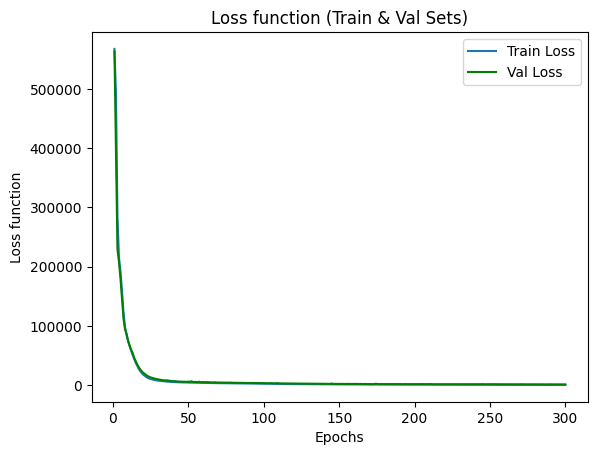

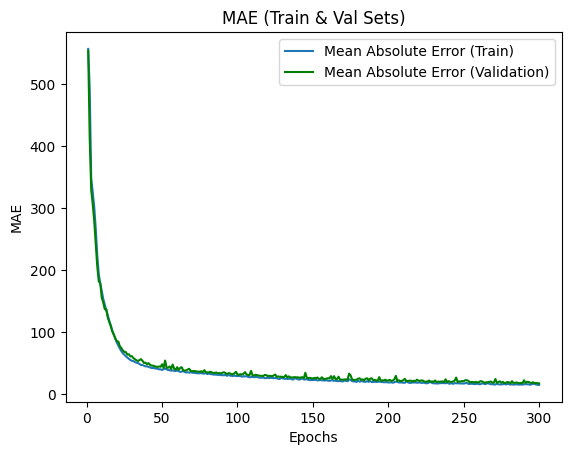

In [ ]:
loss_function = regressor_history_1.history['loss']
val_loss_function = regressor_history_1.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='green',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

mae = regressor_history_1.history['mae']
val_mae = regressor_history_1.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs,mae,label='Mean Absolute Error (Train)')
plt.plot(epochs,val_mae,color='green',label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

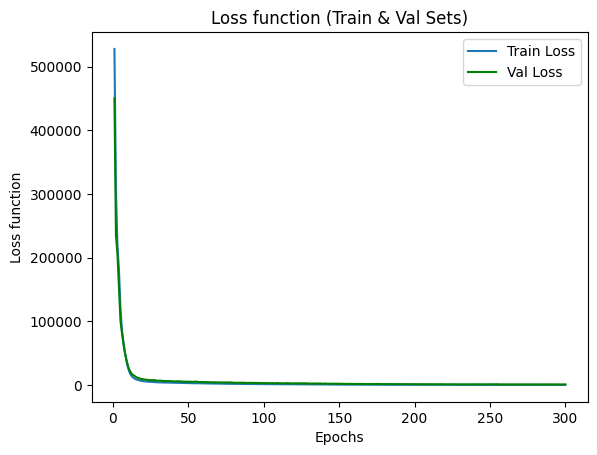

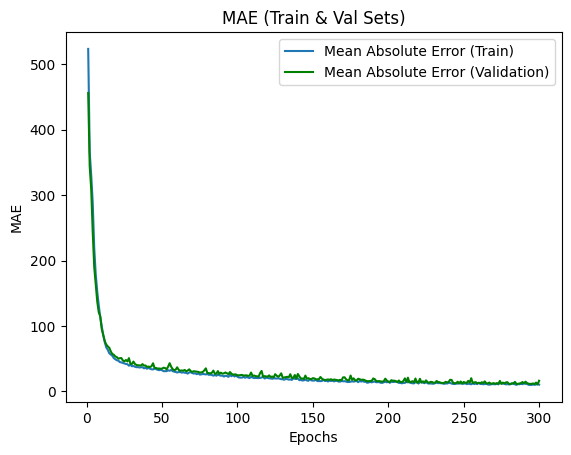

In [ ]:
loss_function = regressor_history_2.history['loss']
val_loss_function = regressor_history_2.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='green',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

mae = regressor_history_2.history['mae']
val_mae = regressor_history_2.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs,mae,label='Mean Absolute Error (Train)')
plt.plot(epochs,val_mae,color='green',label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

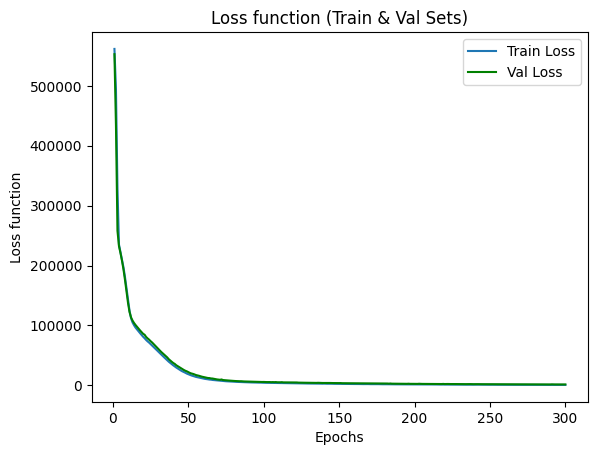

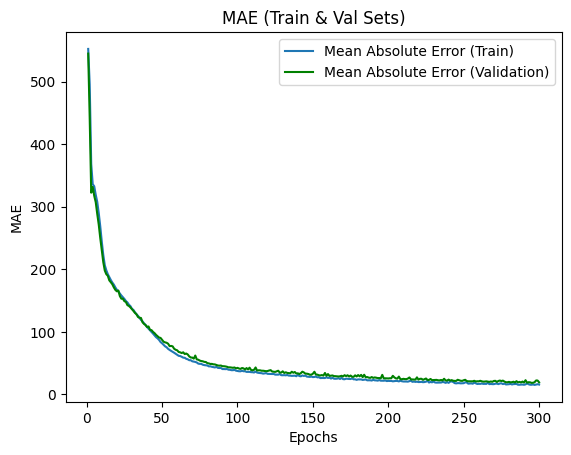

In [ ]:
loss_function = regressor_history_3.history['loss']
val_loss_function = regressor_history_3.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='green',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

mae = regressor_history_3.history['mae']
val_mae = regressor_history_3.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs,mae,label='Mean Absolute Error (Train)')
plt.plot(epochs,val_mae,color='green',label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
results_1 = regressor_1.evaluate(X_test,y_test)
results_2 = regressor_2.evaluate(X_test,y_test)
results_3 = regressor_3.evaluate(X_test,y_test)

85/85 [==============================] - 1s 6ms/step - loss: 1123.4380 - mae: 18.4548


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_1 = regressor_1.predict(X_test)
y_pred_2 = regressor_2.predict(X_test)
y_pred_3 = regressor_3.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)
mse_3 = mean_squared_error(y_test, y_pred_3)

mae_1 = mean_absolute_error(y_test, y_pred_1)
mae_2 = mean_absolute_error(y_test, y_pred_2)
mae_3 = mean_absolute_error(y_test, y_pred_3)

r2_1 = r2_score(y_test, y_pred_1)
r2_2 = r2_score(y_test, y_pred_2)
r2_3 = r2_score(y_test, y_pred_3)

print(f"\nMSE_1: {mse_1}")
print(f"MSE_2: {mse_2}")
print(f"MSE_3: {mse_3}\n")

print(f"MAE_1: {mae_1}")
print(f"MAE_2: {mae_2}")
print(f"MAE_3: {mae_3}\n")

print(f"R^2_1: {r2_1}")
print(f"R^2_2: {r2_2}")
print(f"R^2_3: {r2_3}")

85/85 [==============================] - 0s 2ms/step

MSE_1: 859.5117367823036
MSE_2: 468.4372951394311
MSE_3: 1123.4380548217694

MAE_1: 15.956194301943167
MAE_2: 15.16513225899851
MAE_3: 18.45482103018835

R^2_1: 0.9965638282281607
R^2_2: 0.9981272727973899
R^2_3: 0.9955086987574594


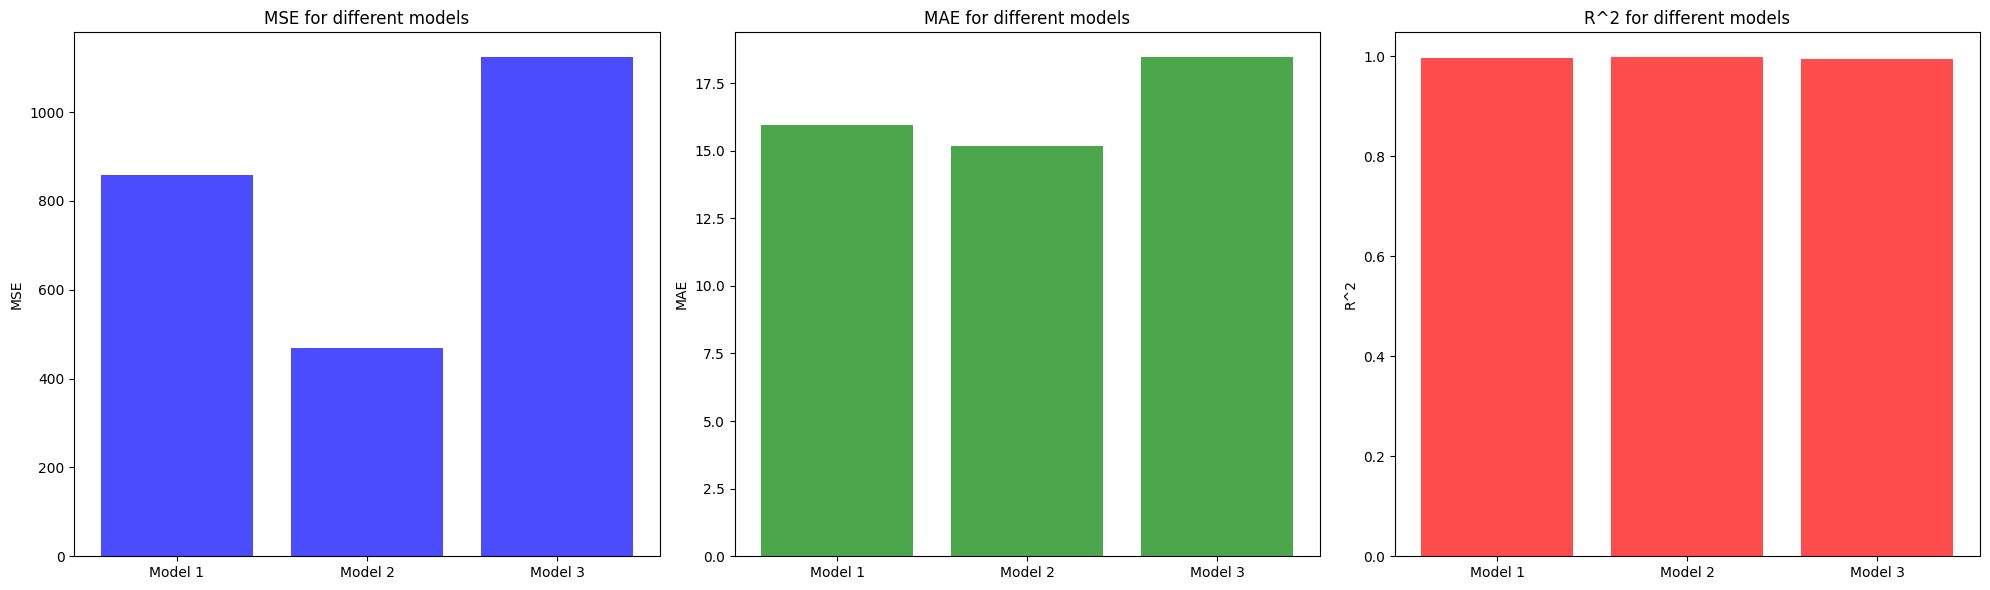

In [ ]:
models = ["Model 1", "Model 2", "Model 3"]

mse_values = [mse_1, mse_2, mse_3]
mae_values = [mae_1, mae_2, mae_3]
r2_values = [r2_1, r2_2, r2_3]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].bar(models, mse_values, color='blue', alpha=0.7)
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE for different models')

axes[1].bar(models, mae_values, color='green', alpha=0.7)
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE for different models')

axes[2].bar(models, r2_values, color='red', alpha=0.7)
axes[2].set_ylabel('R^2')
axes[2].set_title('R^2 for different models')

plt.tight_layout()
plt.show()